from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/ECA/')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-09 00:16:29.506749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 00:16:29.905823: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-09 00:16:29.943554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-09 00:16:29.943618: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 30

In [3]:
df = pd.read_csv("data/LocationC.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
ECC = df["ECC"]

X1, y1 = df_to_X_y(ECC, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-09 00:17:00.976357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-09 00:17:00.986911: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-09 00:17:00.987237: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-09 00:17:00.991567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 1046682.4375 - root_mean_squared_error: 1023.0750

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 7s 538ms/step - loss: 1046682.4375 - root_mean_squared_error: 1023.0750 - val_loss: 914678.6875 - val_root_mean_squared_error: 956.3884
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 921197.1250 - root_mean_squared_error: 959.7902

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 136ms/step - loss: 848859.9375 - root_mean_squared_error: 921.3359 - val_loss: 730668.2500 - val_root_mean_squared_error: 854.7913
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 766978.1250 - root_mean_squared_error: 875.7729

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 99ms/step - loss: 674455.0000 - root_mean_squared_error: 821.2521 - val_loss: 572197.3125 - val_root_mean_squared_error: 756.4373
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 592975.5000 - root_mean_squared_error: 770.0490

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 135ms/step - loss: 526916.6875 - root_mean_squared_error: 725.8903 - val_loss: 439443.8750 - val_root_mean_squared_error: 662.9056
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 471144.3125 - root_mean_squared_error: 686.3995

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 101ms/step - loss: 402538.2188 - root_mean_squared_error: 634.4590 - val_loss: 329832.5625 - val_root_mean_squared_error: 574.3105
Epoch 6/30
1/8 [==>...........................] - ETA: 3s - loss: 313355.5625 - root_mean_squared_error: 559.7817

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 213ms/step - loss: 299552.2188 - root_mean_squared_error: 547.3137 - val_loss: 241779.5938 - val_root_mean_squared_error: 491.7109
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 249608.6250 - root_mean_squared_error: 499.6085

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 302ms/step - loss: 218268.5781 - root_mean_squared_error: 467.1922 - val_loss: 172076.9688 - val_root_mean_squared_error: 414.8216
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 177979.9062 - root_mean_squared_error: 421.8766

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 359ms/step - loss: 155089.8594 - root_mean_squared_error: 393.8145 - val_loss: 118602.8984 - val_root_mean_squared_error: 344.3877
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 114423.3594 - root_mean_squared_error: 338.2652

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 208ms/step - loss: 107157.2969 - root_mean_squared_error: 327.3489 - val_loss: 79822.2578 - val_root_mean_squared_error: 282.5283
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 85417.1875 - root_mean_squared_error: 292.2622

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 214ms/step - loss: 72798.1953 - root_mean_squared_error: 269.8114 - val_loss: 54177.2148 - val_root_mean_squared_error: 232.7600
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 59479.4336 - root_mean_squared_error: 243.8841

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 142ms/step - loss: 51091.3594 - root_mean_squared_error: 226.0340 - val_loss: 37975.4258 - val_root_mean_squared_error: 194.8728
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 43684.5312 - root_mean_squared_error: 209.0085

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 102ms/step - loss: 37326.1914 - root_mean_squared_error: 193.1999 - val_loss: 27065.9082 - val_root_mean_squared_error: 164.5172
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 24785.0117 - root_mean_squared_error: 157.4326

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 89ms/step - loss: 27320.8066 - root_mean_squared_error: 165.2901 - val_loss: 18938.1074 - val_root_mean_squared_error: 137.6158
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 20663.4473 - root_mean_squared_error: 143.7479

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 126ms/step - loss: 19975.6406 - root_mean_squared_error: 141.3352 - val_loss: 13258.5625 - val_root_mean_squared_error: 115.1458
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 14970.1182 - root_mean_squared_error: 122.3524

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 170ms/step - loss: 14955.0811 - root_mean_squared_error: 122.2910 - val_loss: 9252.9131 - val_root_mean_squared_error: 96.1921
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 17303.8164 - root_mean_squared_error: 131.5440

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 155ms/step - loss: 11473.8838 - root_mean_squared_error: 107.1162 - val_loss: 6512.6318 - val_root_mean_squared_error: 80.7009
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 9216.3115 - root_mean_squared_error: 96.0016

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 420ms/step - loss: 9000.6084 - root_mean_squared_error: 94.8715 - val_loss: 4784.1943 - val_root_mean_squared_error: 69.1679
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 7721.0361 - root_mean_squared_error: 87.8694

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 327ms/step - loss: 7519.6338 - root_mean_squared_error: 86.7158 - val_loss: 3634.9973 - val_root_mean_squared_error: 60.2909
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 6254.5630 - root_mean_squared_error: 79.0858

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 433ms/step - loss: 6468.1050 - root_mean_squared_error: 80.4245 - val_loss: 2945.9834 - val_root_mean_squared_error: 54.2769
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 3855.6924 - root_mean_squared_error: 62.0942

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 405ms/step - loss: 5869.2720 - root_mean_squared_error: 76.6112 - val_loss: 2487.0369 - val_root_mean_squared_error: 49.8702
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 7616.6538 - root_mean_squared_error: 87.2734

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 475ms/step - loss: 5417.7729 - root_mean_squared_error: 73.6055 - val_loss: 2218.9795 - val_root_mean_squared_error: 47.1060
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 4861.2285 - root_mean_squared_error: 69.7225

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 316ms/step - loss: 5208.9819 - root_mean_squared_error: 72.1733 - val_loss: 2067.8076 - val_root_mean_squared_error: 45.4732
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 4083.4937 - root_mean_squared_error: 63.9022

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 309ms/step - loss: 5055.4932 - root_mean_squared_error: 71.1020 - val_loss: 1997.1052 - val_root_mean_squared_error: 44.6890
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 3125.9443 - root_mean_squared_error: 55.9101

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 298ms/step - loss: 4969.3198 - root_mean_squared_error: 70.4934 - val_loss: 1963.3857 - val_root_mean_squared_error: 44.3101
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 5580.1108 - root_mean_squared_error: 74.7001

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 673ms/step - loss: 4927.2134 - root_mean_squared_error: 70.1941 - val_loss: 1948.8423 - val_root_mean_squared_error: 44.1457
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 4913.0771 - root_mean_squared_error: 70.0933

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 404ms/step - loss: 4913.0771 - root_mean_squared_error: 70.0933 - val_loss: 1944.6174 - val_root_mean_squared_error: 44.0978
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 4904.8433 - root_mean_squared_error: 70.0346

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 427ms/step - loss: 4904.8433 - root_mean_squared_error: 70.0346 - val_loss: 1943.7787 - val_root_mean_squared_error: 44.0883
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 4557.2363 - root_mean_squared_error: 67.5073

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 346ms/step - loss: 4902.3154 - root_mean_squared_error: 70.0165 - val_loss: 1940.6104 - val_root_mean_squared_error: 44.0524
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2814.3374 - root_mean_squared_error: 53.0503

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 416ms/step - loss: 4898.5347 - root_mean_squared_error: 69.9895 - val_loss: 1940.6017 - val_root_mean_squared_error: 44.0523
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 3098.3652 - root_mean_squared_error: 55.6630

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 3ms/step


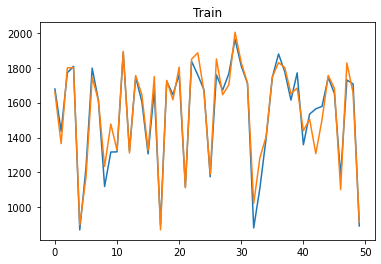

2/2 [==============================] - 0s 13ms/step


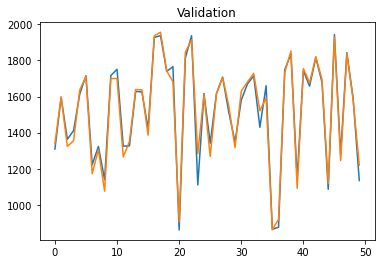

3/3 [==============================] - 0s 3ms/step


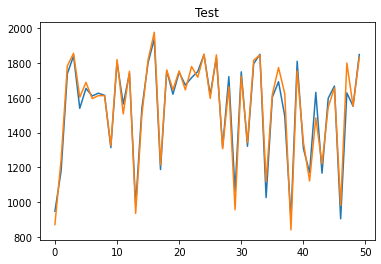

3/3 [==============================] - 0s 5ms/step


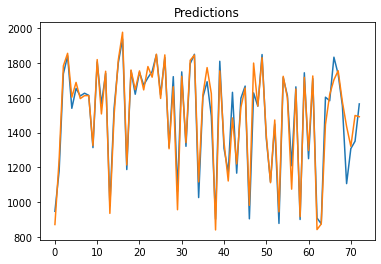

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2415719.0000 - root_mean_squared_error: 1554.2583  

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 33s 3s/step - loss: 2415719.0000 - root_mean_squared_error: 1554.2583 - val_loss: 2402538.5000 - val_root_mean_squared_error: 1550.0125
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2391521.2500 - root_mean_squared_error: 1546.4545

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2415551.2500 - root_mean_squared_error: 1554.2043 - val_loss: 2402428.7500 - val_root_mean_squared_error: 1549.9771
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 2302786.2500 - root_mean_squared_error: 1517.4934

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2415454.7500 - root_mean_squared_error: 1554.1733 - val_loss: 2402343.2500 - val_root_mean_squared_error: 1549.9493
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 2115941.2500 - root_mean_squared_error: 1454.6276

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2415369.5000 - root_mean_squared_error: 1554.1459 - val_loss: 2402257.7500 - val_root_mean_squared_error: 1549.9219
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2439490.2500 - root_mean_squared_error: 1561.8867

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2415281.7500 - root_mean_squared_error: 1554.1177 - val_loss: 2402164.2500 - val_root_mean_squared_error: 1549.8917
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2415175.7500 - root_mean_squared_error: 1554.0836

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2415175.7500 - root_mean_squared_error: 1554.0836 - val_loss: 2402026.7500 - val_root_mean_squared_error: 1549.8473
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2376243.7500 - root_mean_squared_error: 1541.5070

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2414981.0000 - root_mean_squared_error: 1554.0209 - val_loss: 2401679.0000 - val_root_mean_squared_error: 1549.7351
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 2405102.7500 - root_mean_squared_error: 1550.8394

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2414497.7500 - root_mean_squared_error: 1553.8655 - val_loss: 2401086.2500 - val_root_mean_squared_error: 1549.5439
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 2405267.2500 - root_mean_squared_error: 1550.8925

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2414063.5000 - root_mean_squared_error: 1553.7257 - val_loss: 2400890.2500 - val_root_mean_squared_error: 1549.4806
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 2443520.7500 - root_mean_squared_error: 1563.1765

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2413885.5000 - root_mean_squared_error: 1553.6685 - val_loss: 2400744.5000 - val_root_mean_squared_error: 1549.4336
Epoch 11/30
5/8 [=================>............] - ETA: 0s - loss: 2376062.7500 - root_mean_squared_error: 1541.4482

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2413774.7500 - root_mean_squared_error: 1553.6328 - val_loss: 2400659.5000 - val_root_mean_squared_error: 1549.4061
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2413690.2500 - root_mean_squared_error: 1553.6056

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2413690.2500 - root_mean_squared_error: 1553.6056 - val_loss: 2400575.0000 - val_root_mean_squared_error: 1549.3789
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 2576398.5000 - root_mean_squared_error: 1605.1163

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2413606.5000 - root_mean_squared_error: 1553.5786 - val_loss: 2400490.0000 - val_root_mean_squared_error: 1549.3514
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2413522.0000 - root_mean_squared_error: 1553.5514

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2413522.0000 - root_mean_squared_error: 1553.5514 - val_loss: 2400405.7500 - val_root_mean_squared_error: 1549.3243
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2413437.7500 - root_mean_squared_error: 1553.5243

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2413437.7500 - root_mean_squared_error: 1553.5243 - val_loss: 2400322.0000 - val_root_mean_squared_error: 1549.2972
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2413354.0000 - root_mean_squared_error: 1553.4973

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2413354.0000 - root_mean_squared_error: 1553.4973 - val_loss: 2400237.2500 - val_root_mean_squared_error: 1549.2699
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2427189.2500 - root_mean_squared_error: 1557.9440

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2413269.5000 - root_mean_squared_error: 1553.4701 - val_loss: 2400153.5000 - val_root_mean_squared_error: 1549.2429
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 2439507.5000 - root_mean_squared_error: 1561.8923

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2413186.5000 - root_mean_squared_error: 1553.4435 - val_loss: 2400069.7500 - val_root_mean_squared_error: 1549.2158
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2333976.0000 - root_mean_squared_error: 1527.7356

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2413102.5000 - root_mean_squared_error: 1553.4164 - val_loss: 2399986.2500 - val_root_mean_squared_error: 1549.1890
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2413019.2500 - root_mean_squared_error: 1553.3896

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2413019.2500 - root_mean_squared_error: 1553.3896 - val_loss: 2399903.2500 - val_root_mean_squared_error: 1549.1621
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2412936.2500 - root_mean_squared_error: 1553.3629

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2412936.2500 - root_mean_squared_error: 1553.3629 - val_loss: 2399819.5000 - val_root_mean_squared_error: 1549.1351
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2412852.7500 - root_mean_squared_error: 1553.3361

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2412852.7500 - root_mean_squared_error: 1553.3361 - val_loss: 2399736.2500 - val_root_mean_squared_error: 1549.1082
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2126945.0000 - root_mean_squared_error: 1458.4049

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2412769.7500 - root_mean_squared_error: 1553.3093 - val_loss: 2399653.2500 - val_root_mean_squared_error: 1549.0814
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2692018.2500 - root_mean_squared_error: 1640.7371

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2412687.2500 - root_mean_squared_error: 1553.2827 - val_loss: 2399569.5000 - val_root_mean_squared_error: 1549.0544
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2412603.2500 - root_mean_squared_error: 1553.2557

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2412603.2500 - root_mean_squared_error: 1553.2557 - val_loss: 2399485.5000 - val_root_mean_squared_error: 1549.0272
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2419412.0000 - root_mean_squared_error: 1555.4459

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2412519.5000 - root_mean_squared_error: 1553.2288 - val_loss: 2399401.7500 - val_root_mean_squared_error: 1549.0002
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2412436.2500 - root_mean_squared_error: 1553.2019

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2412436.2500 - root_mean_squared_error: 1553.2019 - val_loss: 2399318.5000 - val_root_mean_squared_error: 1548.9734
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 2408429.7500 - root_mean_squared_error: 1551.9116

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2412353.0000 - root_mean_squared_error: 1553.1752 - val_loss: 2399235.2500 - val_root_mean_squared_error: 1548.9465
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2375222.7500 - root_mean_squared_error: 1541.1758

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2412270.0000 - root_mean_squared_error: 1553.1484 - val_loss: 2399152.5000 - val_root_mean_squared_error: 1548.9197
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2412186.7500 - root_mean_squared_error: 1553.1216

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 4ms/step


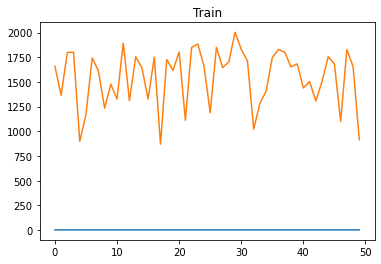

2/2 [==============================] - 2s 21ms/step


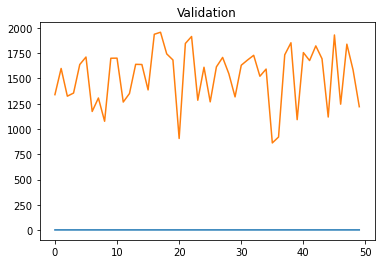

3/3 [==============================] - 0s 20ms/step


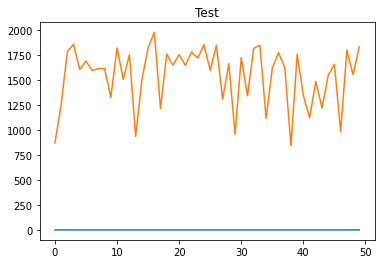

3/3 [==============================] - 0s 3ms/step


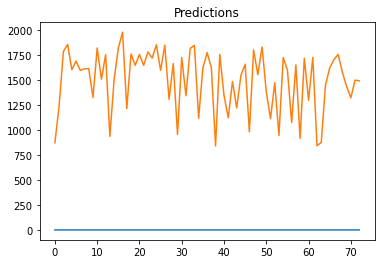

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/30
1/8 [==>...........................] - ETA: 1:02 - loss: 2432847.0000 - root_mean_squared_error: 1559.7587

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 3s/step - loss: 2417881.2500 - root_mean_squared_error: 1554.9537 - val_loss: 2404778.5000 - val_root_mean_squared_error: 1550.7349
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 2270929.2500 - root_mean_squared_error: 1506.9603

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2417802.2500 - root_mean_squared_error: 1554.9283 - val_loss: 2404699.5000 - val_root_mean_squared_error: 1550.7094
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 2405993.5000 - root_mean_squared_error: 1551.1266

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2417723.0000 - root_mean_squared_error: 1554.9028 - val_loss: 2404620.2500 - val_root_mean_squared_error: 1550.6838
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 2434359.5000 - root_mean_squared_error: 1560.2434

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2417643.5000 - root_mean_squared_error: 1554.8773 - val_loss: 2404540.2500 - val_root_mean_squared_error: 1550.6580
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2420114.7500 - root_mean_squared_error: 1555.6718

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2417563.7500 - root_mean_squared_error: 1554.8517 - val_loss: 2404458.5000 - val_root_mean_squared_error: 1550.6316
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2354867.0000 - root_mean_squared_error: 1534.5576

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2417479.7500 - root_mean_squared_error: 1554.8247 - val_loss: 2404367.5000 - val_root_mean_squared_error: 1550.6023
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2410293.2500 - root_mean_squared_error: 1552.5120

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2417374.0000 - root_mean_squared_error: 1554.7906 - val_loss: 2404218.5000 - val_root_mean_squared_error: 1550.5542
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2410877.7500 - root_mean_squared_error: 1552.7002

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2417009.0000 - root_mean_squared_error: 1554.6732 - val_loss: 2403336.5000 - val_root_mean_squared_error: 1550.2698
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2416381.0000 - root_mean_squared_error: 1554.4713

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2416381.0000 - root_mean_squared_error: 1554.4713 - val_loss: 2403286.5000 - val_root_mean_squared_error: 1550.2537
Epoch 10/30
3/8 [==========>...................] - ETA: 0s - loss: 2592921.2500 - root_mean_squared_error: 1610.2550

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2416296.5000 - root_mean_squared_error: 1554.4441 - val_loss: 2403121.0000 - val_root_mean_squared_error: 1550.2003
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2416012.0000 - root_mean_squared_error: 1554.3525

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2416012.0000 - root_mean_squared_error: 1554.3525 - val_loss: 2402638.2500 - val_root_mean_squared_error: 1550.0446
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 2402334.2500 - root_mean_squared_error: 1549.9465

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2415547.2500 - root_mean_squared_error: 1554.2031 - val_loss: 2402305.7500 - val_root_mean_squared_error: 1549.9374
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 2493991.5000 - root_mean_squared_error: 1579.2377

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2415214.7500 - root_mean_squared_error: 1554.0961 - val_loss: 2401846.0000 - val_root_mean_squared_error: 1549.7891
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2648552.0000 - root_mean_squared_error: 1627.4373

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2414666.5000 - root_mean_squared_error: 1553.9197 - val_loss: 2401187.5000 - val_root_mean_squared_error: 1549.5767
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2414038.2500 - root_mean_squared_error: 1553.7175

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2414038.2500 - root_mean_squared_error: 1553.7175 - val_loss: 2400702.2500 - val_root_mean_squared_error: 1549.4199
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2421742.2500 - root_mean_squared_error: 1556.1948

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2413625.0000 - root_mean_squared_error: 1553.5846 - val_loss: 2400435.2500 - val_root_mean_squared_error: 1549.3339
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 2355560.2500 - root_mean_squared_error: 1534.7834

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2413458.5000 - root_mean_squared_error: 1553.5310 - val_loss: 2400334.2500 - val_root_mean_squared_error: 1549.3013
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2410678.5000 - root_mean_squared_error: 1552.6360

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2413363.7500 - root_mean_squared_error: 1553.5005 - val_loss: 2400238.5000 - val_root_mean_squared_error: 1549.2703
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 2373870.5000 - root_mean_squared_error: 1540.7369

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2413245.5000 - root_mean_squared_error: 1553.4624 - val_loss: 2400027.2500 - val_root_mean_squared_error: 1549.2020
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 2430392.7500 - root_mean_squared_error: 1558.9717

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2412827.2500 - root_mean_squared_error: 1553.3278 - val_loss: 2399348.7500 - val_root_mean_squared_error: 1548.9832
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2204881.5000 - root_mean_squared_error: 1484.8844

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2412356.0000 - root_mean_squared_error: 1553.1761 - val_loss: 2399222.5000 - val_root_mean_squared_error: 1548.9424
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2412248.7500 - root_mean_squared_error: 1553.1416

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2412248.7500 - root_mean_squared_error: 1553.1416 - val_loss: 2399097.7500 - val_root_mean_squared_error: 1548.9021
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 2387569.2500 - root_mean_squared_error: 1545.1761

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 2412074.0000 - root_mean_squared_error: 1553.0853 - val_loss: 2398886.5000 - val_root_mean_squared_error: 1548.8339
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2411918.2500 - root_mean_squared_error: 1553.0352

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2411918.2500 - root_mean_squared_error: 1553.0352 - val_loss: 2398796.7500 - val_root_mean_squared_error: 1548.8049
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2411834.5000 - root_mean_squared_error: 1553.0082

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2411834.5000 - root_mean_squared_error: 1553.0082 - val_loss: 2398717.0000 - val_root_mean_squared_error: 1548.7792
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2459925.2500 - root_mean_squared_error: 1568.4149

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2411755.5000 - root_mean_squared_error: 1552.9828 - val_loss: 2398639.0000 - val_root_mean_squared_error: 1548.7540
Epoch 27/30
4/8 [==============>...............] - ETA: 0s - loss: 2395570.0000 - root_mean_squared_error: 1547.7629

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2411678.0000 - root_mean_squared_error: 1552.9578 - val_loss: 2398561.7500 - val_root_mean_squared_error: 1548.7291
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 2373136.0000 - root_mean_squared_error: 1540.4987

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2411600.5000 - root_mean_squared_error: 1552.9329 - val_loss: 2398484.7500 - val_root_mean_squared_error: 1548.7042
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2196278.2500 - root_mean_squared_error: 1481.9846

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 2411523.5000 - root_mean_squared_error: 1552.9081 - val_loss: 2398408.2500 - val_root_mean_squared_error: 1548.6796
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2406268.0000 - root_mean_squared_error: 1551.2150

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 11ms/step


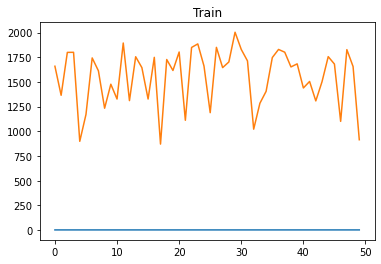

2/2 [==============================] - 2s 7ms/step


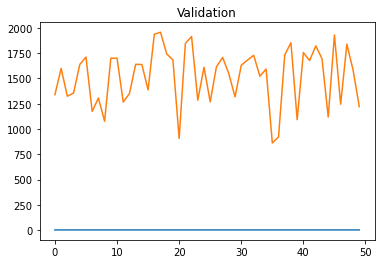

3/3 [==============================] - 0s 36ms/step


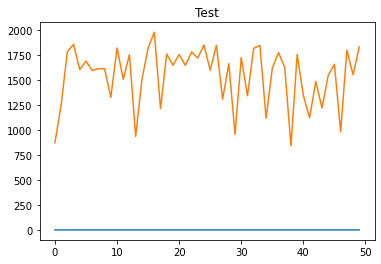

3/3 [==============================] - 0s 4ms/step


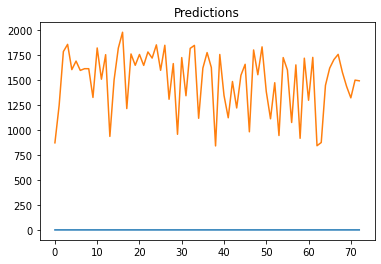

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/30
1/8 [==>...........................] - ETA: 31s - loss: 2097890.5000 - root_mean_squared_error: 1448.4097INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2420952.0000 - root_mean_squared_error: 1555.9409 - val_loss: 2407805.7500 - val_root_mean_squared_error: 1551.7106
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 2450514.5000 - root_mean_squared_error: 1565.4120INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 597ms/step - loss: 2420788.0000 - root_mean_squared_error: 1555.8882 - val_loss: 2407632.5000 - val_root_mean_squared_error: 1551.6548
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2420585.0000 - root_mean_squared_error: 1555.8229INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 697ms/step - loss: 2420585.0000 - root_mean_squared_error: 1555.8229 - val_loss: 2407322.0000 - val_root_mean_squared_error: 1551.5547
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 2277357.5000 - root_mean_squared_error: 1509.0917INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 822ms/step - loss: 2420076.5000 - root_mean_squared_error: 1555.6595 - val_loss: 2406584.2500 - val_root_mean_squared_error: 1551.3169
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 2587835.5000 - root_mean_squared_error: 1608.6750INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2419517.2500 - root_mean_squared_error: 1555.4797 - val_loss: 2406334.0000 - val_root_mean_squared_error: 1551.2363
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2555690.2500 - root_mean_squared_error: 1598.6526INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 573ms/step - loss: 2419320.7500 - root_mean_squared_error: 1555.4166 - val_loss: 2406168.7500 - val_root_mean_squared_error: 1551.1830
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2430034.7500 - root_mean_squared_error: 1558.8569INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 745ms/step - loss: 2419155.7500 - root_mean_squared_error: 1555.3635 - val_loss: 2405999.0000 - val_root_mean_squared_error: 1551.1283
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2418939.7500 - root_mean_squared_error: 1555.2941INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 837ms/step - loss: 2418939.7500 - root_mean_squared_error: 1555.2941 - val_loss: 2405561.0000 - val_root_mean_squared_error: 1550.9871
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2417944.5000 - root_mean_squared_error: 1554.9741INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 784ms/step - loss: 2417944.5000 - root_mean_squared_error: 1554.9741 - val_loss: 2404132.2500 - val_root_mean_squared_error: 1550.5265
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2416288.0000 - root_mean_squared_error: 1554.4414INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2417089.7500 - root_mean_squared_error: 1554.6992 - val_loss: 2403917.0000 - val_root_mean_squared_error: 1550.4570
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 2356641.5000 - root_mean_squared_error: 1535.1356INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 895ms/step - loss: 2416910.7500 - root_mean_squared_error: 1554.6417 - val_loss: 2403756.2500 - val_root_mean_squared_error: 1550.4052
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2416751.5000 - root_mean_squared_error: 1554.5905INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 770ms/step - loss: 2416751.5000 - root_mean_squared_error: 1554.5905 - val_loss: 2403596.5000 - val_root_mean_squared_error: 1550.3536
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2426222.0000 - root_mean_squared_error: 1557.6334INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 874ms/step - loss: 2416592.2500 - root_mean_squared_error: 1554.5392 - val_loss: 2403437.2500 - val_root_mean_squared_error: 1550.3024
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2204980.5000 - root_mean_squared_error: 1484.9177INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 876ms/step - loss: 2416433.0000 - root_mean_squared_error: 1554.4880 - val_loss: 2403279.0000 - val_root_mean_squared_error: 1550.2512
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2363408.5000 - root_mean_squared_error: 1537.3381INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 700ms/step - loss: 2416276.0000 - root_mean_squared_error: 1554.4375 - val_loss: 2403121.0000 - val_root_mean_squared_error: 1550.2003
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2549543.5000 - root_mean_squared_error: 1596.7290INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 776ms/step - loss: 2416118.2500 - root_mean_squared_error: 1554.3867 - val_loss: 2402963.0000 - val_root_mean_squared_error: 1550.1493
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2601916.0000 - root_mean_squared_error: 1613.0455INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 615ms/step - loss: 2415961.2500 - root_mean_squared_error: 1554.3363 - val_loss: 2402805.0000 - val_root_mean_squared_error: 1550.0984
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 2194872.5000 - root_mean_squared_error: 1481.5103INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 740ms/step - loss: 2415802.0000 - root_mean_squared_error: 1554.2850 - val_loss: 2402647.2500 - val_root_mean_squared_error: 1550.0475
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2263266.2500 - root_mean_squared_error: 1504.4155INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 539ms/step - loss: 2415644.5000 - root_mean_squared_error: 1554.2344 - val_loss: 2402488.5000 - val_root_mean_squared_error: 1549.9962
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2415486.0000 - root_mean_squared_error: 1554.1833INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 530ms/step - loss: 2415486.0000 - root_mean_squared_error: 1554.1833 - val_loss: 2402328.7500 - val_root_mean_squared_error: 1549.9447
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2285175.0000 - root_mean_squared_error: 1511.6796INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 3s 468ms/step - loss: 2415327.5000 - root_mean_squared_error: 1554.1324 - val_loss: 2402171.5000 - val_root_mean_squared_error: 1549.8940
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 2174740.7500 - root_mean_squared_error: 1474.7002INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 684ms/step - loss: 2415170.5000 - root_mean_squared_error: 1554.0819 - val_loss: 2402013.7500 - val_root_mean_squared_error: 1549.8431
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2395156.5000 - root_mean_squared_error: 1547.6293INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 599ms/step - loss: 2415012.2500 - root_mean_squared_error: 1554.0310 - val_loss: 2401855.0000 - val_root_mean_squared_error: 1549.7919
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2414854.0000 - root_mean_squared_error: 1553.9800INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 586ms/step - loss: 2414854.0000 - root_mean_squared_error: 1553.9800 - val_loss: 2401695.0000 - val_root_mean_squared_error: 1549.7404
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 2328047.0000 - root_mean_squared_error: 1525.7939INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 569ms/step - loss: 2414694.5000 - root_mean_squared_error: 1553.9287 - val_loss: 2401535.7500 - val_root_mean_squared_error: 1549.6890
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2526972.0000 - root_mean_squared_error: 1589.6453INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 939ms/step - loss: 2414537.2500 - root_mean_squared_error: 1553.8782 - val_loss: 2401376.7500 - val_root_mean_squared_error: 1549.6376
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 2529553.5000 - root_mean_squared_error: 1590.4570INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 562ms/step - loss: 2414378.0000 - root_mean_squared_error: 1553.8269 - val_loss: 2401219.2500 - val_root_mean_squared_error: 1549.5868
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 2316125.5000 - root_mean_squared_error: 1521.8822INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 649ms/step - loss: 2414220.5000 - root_mean_squared_error: 1553.7762 - val_loss: 2401062.0000 - val_root_mean_squared_error: 1549.5360
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2382746.2500 - root_mean_squared_error: 1543.6146INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 557ms/step - loss: 2414063.5000 - root_mean_squared_error: 1553.7257 - val_loss: 2400905.0000 - val_root_mean_squared_error: 1549.4854
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2213158.0000 - root_mean_squared_error: 1487.6687INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 4ms/step


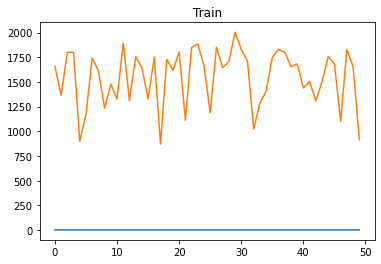

2/2 [==============================] - 1s 5ms/step


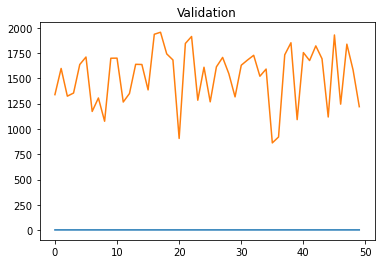

3/3 [==============================] - 0s 4ms/step


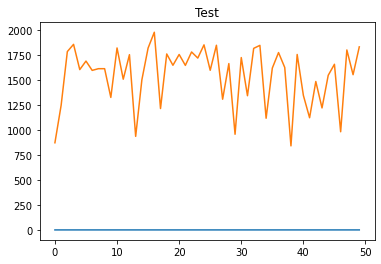

3/3 [==============================] - 0s 4ms/step


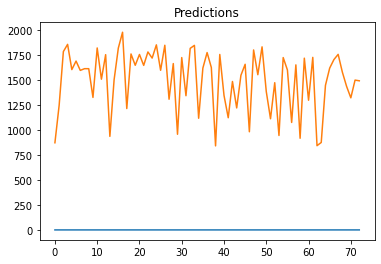

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/30
1/8 [==>...........................] - ETA: 29s - loss: 3668450.5000 - root_mean_squared_error: 1915.3199

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 7s 414ms/step - loss: 3603977.2500 - root_mean_squared_error: 1898.4144 - val_loss: 3477039.0000 - val_root_mean_squared_error: 1864.6820
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 3379245.7500 - root_mean_squared_error: 1838.2725

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 353ms/step - loss: 3379245.7500 - root_mean_squared_error: 1838.2725 - val_loss: 3241321.0000 - val_root_mean_squared_error: 1800.3669
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 3148267.5000 - root_mean_squared_error: 1774.3358

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 493ms/step - loss: 3145121.0000 - root_mean_squared_error: 1773.4489 - val_loss: 3006570.5000 - val_root_mean_squared_error: 1733.9465
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2927197.2500 - root_mean_squared_error: 1710.9054

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 367ms/step - loss: 2920075.2500 - root_mean_squared_error: 1708.8228 - val_loss: 2786501.5000 - val_root_mean_squared_error: 1669.2817
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2726262.7500 - root_mean_squared_error: 1651.1399

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 324ms/step - loss: 2726262.7500 - root_mean_squared_error: 1651.1399 - val_loss: 2618955.2500 - val_root_mean_squared_error: 1618.3186
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2561877.5000 - root_mean_squared_error: 1600.5867

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 794ms/step - loss: 2572080.0000 - root_mean_squared_error: 1603.7705 - val_loss: 2501620.5000 - val_root_mean_squared_error: 1581.6512
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2475764.0000 - root_mean_squared_error: 1573.4561

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 665ms/step - loss: 2475764.0000 - root_mean_squared_error: 1573.4561 - val_loss: 2412527.5000 - val_root_mean_squared_error: 1553.2313
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 2210980.5000 - root_mean_squared_error: 1486.9366

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 345ms/step - loss: 2389207.0000 - root_mean_squared_error: 1545.7059 - val_loss: 2324463.5000 - val_root_mean_squared_error: 1524.6193
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2175264.0000 - root_mean_squared_error: 1474.8776

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 315ms/step - loss: 2304062.2500 - root_mean_squared_error: 1517.9138 - val_loss: 2238610.7500 - val_root_mean_squared_error: 1496.1987
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 2334682.2500 - root_mean_squared_error: 1527.9667

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 388ms/step - loss: 2221364.0000 - root_mean_squared_error: 1490.4241 - val_loss: 2155353.5000 - val_root_mean_squared_error: 1468.1122
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 1953602.2500 - root_mean_squared_error: 1397.7133

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 378ms/step - loss: 2140183.5000 - root_mean_squared_error: 1462.9366 - val_loss: 2074522.7500 - val_root_mean_squared_error: 1440.3203
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 2156918.5000 - root_mean_squared_error: 1468.6451

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 298ms/step - loss: 2062237.7500 - root_mean_squared_error: 1436.0493 - val_loss: 1995736.8750 - val_root_mean_squared_error: 1412.7056
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 1986106.5000 - root_mean_squared_error: 1409.2930

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 473ms/step - loss: 1986106.5000 - root_mean_squared_error: 1409.2930 - val_loss: 1917576.2500 - val_root_mean_squared_error: 1384.7657
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 1910088.5000 - root_mean_squared_error: 1382.0596

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 478ms/step - loss: 1910088.5000 - root_mean_squared_error: 1382.0596 - val_loss: 1841921.1250 - val_root_mean_squared_error: 1357.1740
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 1830331.6250 - root_mean_squared_error: 1352.8975

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 631ms/step - loss: 1836670.5000 - root_mean_squared_error: 1355.2382 - val_loss: 1768486.3750 - val_root_mean_squared_error: 1329.8445
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 1759881.7500 - root_mean_squared_error: 1326.6053

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 355ms/step - loss: 1765999.8750 - root_mean_squared_error: 1328.9093 - val_loss: 1696383.1250 - val_root_mean_squared_error: 1302.4528
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 1559418.5000 - root_mean_squared_error: 1248.7668

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 368ms/step - loss: 1695217.7500 - root_mean_squared_error: 1302.0052 - val_loss: 1625818.5000 - val_root_mean_squared_error: 1275.0759
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 1506387.2500 - root_mean_squared_error: 1227.3497

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 325ms/step - loss: 1627136.3750 - root_mean_squared_error: 1275.5925 - val_loss: 1556664.2500 - val_root_mean_squared_error: 1247.6636
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 1560405.6250 - root_mean_squared_error: 1249.1620

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 345ms/step - loss: 1560405.6250 - root_mean_squared_error: 1249.1620 - val_loss: 1489436.2500 - val_root_mean_squared_error: 1220.4246
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 1657068.2500 - root_mean_squared_error: 1287.2716

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 416ms/step - loss: 1495453.3750 - root_mean_squared_error: 1222.8873 - val_loss: 1423554.3750 - val_root_mean_squared_error: 1193.1279
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 1430986.6250 - root_mean_squared_error: 1196.2385

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 411ms/step - loss: 1430986.6250 - root_mean_squared_error: 1196.2385 - val_loss: 1359660.3750 - val_root_mean_squared_error: 1166.0448
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 1369581.8750 - root_mean_squared_error: 1170.2914

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 410ms/step - loss: 1369581.8750 - root_mean_squared_error: 1170.2914 - val_loss: 1296931.2500 - val_root_mean_squared_error: 1138.8289
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 1306107.2500 - root_mean_squared_error: 1142.8505

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 401ms/step - loss: 1308938.7500 - root_mean_squared_error: 1144.0886 - val_loss: 1237075.2500 - val_root_mean_squared_error: 1112.2389
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 1263600.1250 - root_mean_squared_error: 1124.0997

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 414ms/step - loss: 1250589.7500 - root_mean_squared_error: 1118.2977 - val_loss: 1178257.7500 - val_root_mean_squared_error: 1085.4758
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 1274721.6250 - root_mean_squared_error: 1129.0358

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 369ms/step - loss: 1193975.5000 - root_mean_squared_error: 1092.6919 - val_loss: 1120499.6250 - val_root_mean_squared_error: 1058.5365
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 1137154.2500 - root_mean_squared_error: 1066.3744

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 366ms/step - loss: 1138051.6250 - root_mean_squared_error: 1066.7950 - val_loss: 1064464.7500 - val_root_mean_squared_error: 1031.7290
Epoch 27/30
5/8 [=================>............] - ETA: 0s - loss: 1075295.2500 - root_mean_squared_error: 1036.9645

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 390ms/step - loss: 1083867.8750 - root_mean_squared_error: 1041.0897 - val_loss: 1009487.3125 - val_root_mean_squared_error: 1004.7325
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 1030842.1875 - root_mean_squared_error: 1015.3040

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 380ms/step - loss: 1030842.1875 - root_mean_squared_error: 1015.3040 - val_loss: 956644.6875 - val_root_mean_squared_error: 978.0822
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 1158007.7500 - root_mean_squared_error: 1076.1077

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 427ms/step - loss: 980635.9375 - root_mean_squared_error: 990.2706 - val_loss: 909527.1875 - val_root_mean_squared_error: 953.6913
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 940211.8750 - root_mean_squared_error: 969.6452  

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 3ms/step


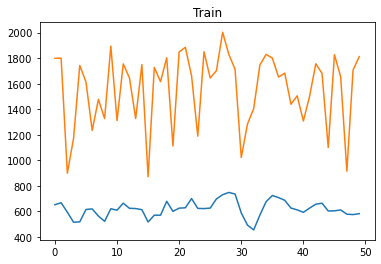

2/2 [==============================] - 0s 4ms/step


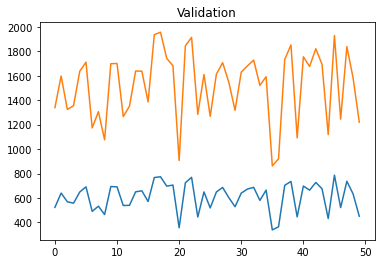

3/3 [==============================] - 0s 3ms/step


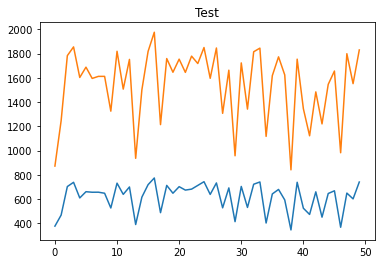

3/3 [==============================] - 0s 3ms/step


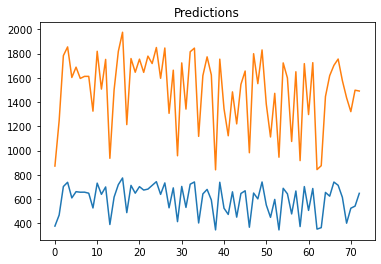

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 2363966.7500 - root_mean_squared_error: 1537.5197 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 30s 3s/step - loss: 2416233.2500 - root_mean_squared_error: 1554.4238 - val_loss: 2402048.5000 - val_root_mean_squared_error: 1549.8544
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2419274.7500 - root_mean_squared_error: 1555.4019

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2415949.2500 - root_mean_squared_error: 1554.3324 - val_loss: 2401722.7500 - val_root_mean_squared_error: 1549.7493
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2415631.2500 - root_mean_squared_error: 1554.2301

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2415631.2500 - root_mean_squared_error: 1554.2301 - val_loss: 2401391.7500 - val_root_mean_squared_error: 1549.6425
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2406610.2500 - root_mean_squared_error: 1551.3253

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2415318.0000 - root_mean_squared_error: 1554.1294 - val_loss: 2401144.2500 - val_root_mean_squared_error: 1549.5626
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2415120.0000 - root_mean_squared_error: 1554.0657

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2415120.0000 - root_mean_squared_error: 1554.0657 - val_loss: 2401004.5000 - val_root_mean_squared_error: 1549.5175
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2414980.5000 - root_mean_squared_error: 1554.0206

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2414980.5000 - root_mean_squared_error: 1554.0206 - val_loss: 2400840.2500 - val_root_mean_squared_error: 1549.4645
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2414757.7500 - root_mean_squared_error: 1553.9491

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2414757.7500 - root_mean_squared_error: 1553.9491 - val_loss: 2400469.7500 - val_root_mean_squared_error: 1549.3450
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2414293.5000 - root_mean_squared_error: 1553.7997

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2414293.5000 - root_mean_squared_error: 1553.7997 - val_loss: 2400043.2500 - val_root_mean_squared_error: 1549.2073
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 2402375.7500 - root_mean_squared_error: 1549.9600

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2414035.5000 - root_mean_squared_error: 1553.7167 - val_loss: 2399948.2500 - val_root_mean_squared_error: 1549.1766
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 2451635.5000 - root_mean_squared_error: 1565.7699

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2413953.7500 - root_mean_squared_error: 1553.6903 - val_loss: 2399872.0000 - val_root_mean_squared_error: 1549.1521
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2423993.2500 - root_mean_squared_error: 1556.9178

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2413878.5000 - root_mean_squared_error: 1553.6661 - val_loss: 2399795.7500 - val_root_mean_squared_error: 1549.1274
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 2443938.2500 - root_mean_squared_error: 1563.3101

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2413798.0000 - root_mean_squared_error: 1553.6403 - val_loss: 2399691.0000 - val_root_mean_squared_error: 1549.0936
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 2400949.2500 - root_mean_squared_error: 1549.4996

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2413641.2500 - root_mean_squared_error: 1553.5898 - val_loss: 2399468.5000 - val_root_mean_squared_error: 1549.0217
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 2428575.7500 - root_mean_squared_error: 1558.3888

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2413449.0000 - root_mean_squared_error: 1553.5280 - val_loss: 2399339.2500 - val_root_mean_squared_error: 1548.9801
Epoch 15/30
3/8 [==========>...................] - ETA: 0s - loss: 2462346.7500 - root_mean_squared_error: 1569.1866

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2413327.2500 - root_mean_squared_error: 1553.4888 - val_loss: 2399205.7500 - val_root_mean_squared_error: 1548.9370
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2410580.7500 - root_mean_squared_error: 1552.6045

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2413146.5000 - root_mean_squared_error: 1553.4305 - val_loss: 2398919.2500 - val_root_mean_squared_error: 1548.8445
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 2436815.2500 - root_mean_squared_error: 1561.0302

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2412830.2500 - root_mean_squared_error: 1553.3287 - val_loss: 2398675.7500 - val_root_mean_squared_error: 1548.7659
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 2452057.5000 - root_mean_squared_error: 1565.9047 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2412679.0000 - root_mean_squared_error: 1553.2800 - val_loss: 2398595.2500 - val_root_mean_squared_error: 1548.7399
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2412602.7500 - root_mean_squared_error: 1553.2555

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2412602.7500 - root_mean_squared_error: 1553.2555 - val_loss: 2398522.0000 - val_root_mean_squared_error: 1548.7162
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2412529.7500 - root_mean_squared_error: 1553.2321

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2412529.7500 - root_mean_squared_error: 1553.2321 - val_loss: 2398448.7500 - val_root_mean_squared_error: 1548.6926
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2412456.5000 - root_mean_squared_error: 1553.2085

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2412456.5000 - root_mean_squared_error: 1553.2085 - val_loss: 2398375.7500 - val_root_mean_squared_error: 1548.6691
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2397957.5000 - root_mean_squared_error: 1548.5339

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 2412383.5000 - root_mean_squared_error: 1553.1849 - val_loss: 2398302.0000 - val_root_mean_squared_error: 1548.6453
Epoch 23/30
4/8 [==============>...............] - ETA: 0s - loss: 2414001.2500 - root_mean_squared_error: 1553.7057

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2412310.0000 - root_mean_squared_error: 1553.1613 - val_loss: 2398229.0000 - val_root_mean_squared_error: 1548.6217
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2405626.2500 - root_mean_squared_error: 1551.0082

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2412237.2500 - root_mean_squared_error: 1553.1378 - val_loss: 2398156.7500 - val_root_mean_squared_error: 1548.5983
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2410371.7500 - root_mean_squared_error: 1552.5372

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2412165.2500 - root_mean_squared_error: 1553.1147 - val_loss: 2398083.7500 - val_root_mean_squared_error: 1548.5747
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2412093.0000 - root_mean_squared_error: 1553.0914

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2412093.0000 - root_mean_squared_error: 1553.0914 - val_loss: 2398011.5000 - val_root_mean_squared_error: 1548.5514
Epoch 27/30
5/8 [=================>............] - ETA: 0s - loss: 2393709.7500 - root_mean_squared_error: 1547.1619

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2412021.0000 - root_mean_squared_error: 1553.0682 - val_loss: 2397939.7500 - val_root_mean_squared_error: 1548.5282
Epoch 28/30
5/8 [=================>............] - ETA: 0s - loss: 2421914.0000 - root_mean_squared_error: 1556.2500

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2411949.2500 - root_mean_squared_error: 1553.0452 - val_loss: 2397867.7500 - val_root_mean_squared_error: 1548.5050
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2406838.2500 - root_mean_squared_error: 1551.3988

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 2411877.7500 - root_mean_squared_error: 1553.0221 - val_loss: 2397796.2500 - val_root_mean_squared_error: 1548.4819
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2411806.0000 - root_mean_squared_error: 1552.9990

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 6ms/step


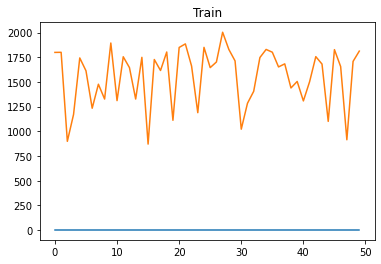

2/2 [==============================] - 2s 10ms/step


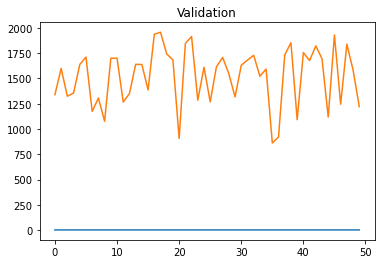

3/3 [==============================] - 1s 472ms/step


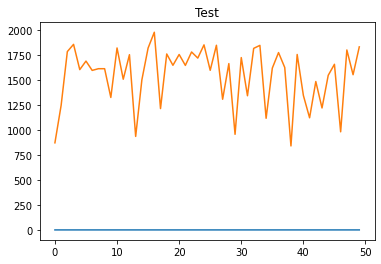

3/3 [==============================] - 0s 14ms/step


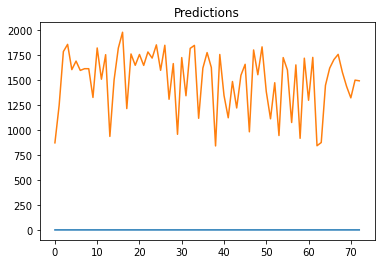

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2415899.7500 - root_mean_squared_error: 1554.3165 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 3s/step - loss: 2418306.7500 - root_mean_squared_error: 1555.0906 - val_loss: 2404196.5000 - val_root_mean_squared_error: 1550.5471
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2418175.7500 - root_mean_squared_error: 1555.0485

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2418175.7500 - root_mean_squared_error: 1555.0485 - val_loss: 2404100.5000 - val_root_mean_squared_error: 1550.5162
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 2473209.2500 - root_mean_squared_error: 1572.6440

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2418102.5000 - root_mean_squared_error: 1555.0249 - val_loss: 2404036.7500 - val_root_mean_squared_error: 1550.4956
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2418013.0000 - root_mean_squared_error: 1554.9961

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2418013.0000 - root_mean_squared_error: 1554.9961 - val_loss: 2403863.5000 - val_root_mean_squared_error: 1550.4398
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2417583.7500 - root_mean_squared_error: 1554.8582

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2417583.7500 - root_mean_squared_error: 1554.8582 - val_loss: 2403026.2500 - val_root_mean_squared_error: 1550.1698
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 2425968.2500 - root_mean_squared_error: 1557.5520

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2416870.5000 - root_mean_squared_error: 1554.6288 - val_loss: 2402678.0000 - val_root_mean_squared_error: 1550.0574
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2430562.7500 - root_mean_squared_error: 1559.0262

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2416651.2500 - root_mean_squared_error: 1554.5581 - val_loss: 2402543.5000 - val_root_mean_squared_error: 1550.0140
Epoch 8/30
4/8 [==============>...............] - ETA: 0s - loss: 2368280.7500 - root_mean_squared_error: 1538.9220

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2416523.7500 - root_mean_squared_error: 1554.5172 - val_loss: 2402419.7500 - val_root_mean_squared_error: 1549.9741
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2416394.5000 - root_mean_squared_error: 1554.4756

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2416394.5000 - root_mean_squared_error: 1554.4756 - val_loss: 2402263.5000 - val_root_mean_squared_error: 1549.9237
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2415885.5000 - root_mean_squared_error: 1554.3119

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2416180.2500 - root_mean_squared_error: 1554.4067 - val_loss: 2401896.7500 - val_root_mean_squared_error: 1549.8054
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 2411648.5000 - root_mean_squared_error: 1552.9484

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2415703.0000 - root_mean_squared_error: 1554.2532 - val_loss: 2401290.5000 - val_root_mean_squared_error: 1549.6097
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2415101.7500 - root_mean_squared_error: 1554.0598

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2415101.7500 - root_mean_squared_error: 1554.0598 - val_loss: 2400804.5000 - val_root_mean_squared_error: 1549.4530
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 2376732.0000 - root_mean_squared_error: 1541.6653

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2414732.7500 - root_mean_squared_error: 1553.9410 - val_loss: 2400513.0000 - val_root_mean_squared_error: 1549.3589
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2414320.2500 - root_mean_squared_error: 1553.8083

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2414320.2500 - root_mean_squared_error: 1553.8083 - val_loss: 2399886.2500 - val_root_mean_squared_error: 1549.1566
Epoch 15/30
5/8 [=================>............] - ETA: 0s - loss: 2397198.7500 - root_mean_squared_error: 1548.2889

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2413770.5000 - root_mean_squared_error: 1553.6313 - val_loss: 2399579.5000 - val_root_mean_squared_error: 1549.0576
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2404591.5000 - root_mean_squared_error: 1550.6746

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2413538.7500 - root_mean_squared_error: 1553.5568 - val_loss: 2399238.5000 - val_root_mean_squared_error: 1548.9475
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2414951.7500 - root_mean_squared_error: 1554.0115

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2413001.5000 - root_mean_squared_error: 1553.3839 - val_loss: 2398808.2500 - val_root_mean_squared_error: 1548.8087
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 2401689.2500 - root_mean_squared_error: 1549.7384

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2412781.5000 - root_mean_squared_error: 1553.3131 - val_loss: 2398648.7500 - val_root_mean_squared_error: 1548.7572
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 2466324.5000 - root_mean_squared_error: 1570.4536

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 2412622.2500 - root_mean_squared_error: 1553.2618 - val_loss: 2398488.2500 - val_root_mean_squared_error: 1548.7053
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2491630.5000 - root_mean_squared_error: 1578.4900

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2412463.2500 - root_mean_squared_error: 1553.2106 - val_loss: 2398331.5000 - val_root_mean_squared_error: 1548.6548
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 2498129.5000 - root_mean_squared_error: 1580.5472

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2412307.5000 - root_mean_squared_error: 1553.1605 - val_loss: 2398175.0000 - val_root_mean_squared_error: 1548.6042
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2412149.7500 - root_mean_squared_error: 1553.1097

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2412149.7500 - root_mean_squared_error: 1553.1097 - val_loss: 2398010.7500 - val_root_mean_squared_error: 1548.5511
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2411960.5000 - root_mean_squared_error: 1553.0488

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2411960.5000 - root_mean_squared_error: 1553.0488 - val_loss: 2397729.5000 - val_root_mean_squared_error: 1548.4604
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 2370547.0000 - root_mean_squared_error: 1539.6581

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2411624.2500 - root_mean_squared_error: 1552.9406 - val_loss: 2397417.7500 - val_root_mean_squared_error: 1548.3597
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 2435217.0000 - root_mean_squared_error: 1560.5182

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 2411386.5000 - root_mean_squared_error: 1552.8640 - val_loss: 2397244.2500 - val_root_mean_squared_error: 1548.3037
Epoch 26/30
4/8 [==============>...............] - ETA: 0s - loss: 2394021.5000 - root_mean_squared_error: 1547.2626

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 12s 2s/step - loss: 2411218.7500 - root_mean_squared_error: 1552.8099 - val_loss: 2397082.0000 - val_root_mean_squared_error: 1548.2512
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 2403050.2500 - root_mean_squared_error: 1550.1775

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 10s 1s/step - loss: 2411058.0000 - root_mean_squared_error: 1552.7582 - val_loss: 2396922.0000 - val_root_mean_squared_error: 1548.1996
Epoch 28/30
5/8 [=================>............] - ETA: 1s - loss: 2443190.5000 - root_mean_squared_error: 1563.0708

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 2410899.0000 - root_mean_squared_error: 1552.7070 - val_loss: 2396762.5000 - val_root_mean_squared_error: 1548.1481
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2413906.0000 - root_mean_squared_error: 1553.6750

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2410740.7500 - root_mean_squared_error: 1552.6560 - val_loss: 2396603.7500 - val_root_mean_squared_error: 1548.0968
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2410788.2500 - root_mean_squared_error: 1552.6714

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 4s 9ms/step


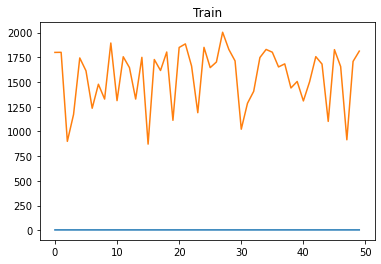

2/2 [==============================] - 1s 6ms/step


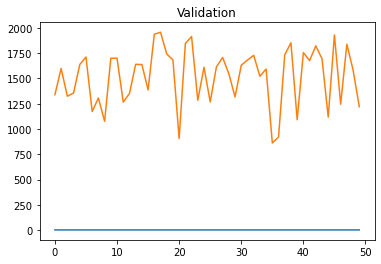

3/3 [==============================] - 0s 4ms/step


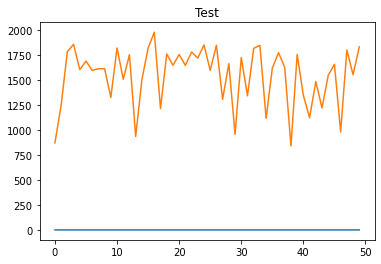

3/3 [==============================] - 0s 5ms/step


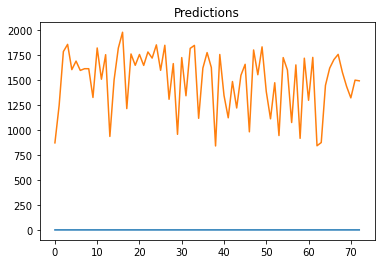

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2420626.2500 - root_mean_squared_error: 1555.8362 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 2420626.2500 - root_mean_squared_error: 1555.8362 - val_loss: 2406510.2500 - val_root_mean_squared_error: 1551.2931
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 2193294.5000 - root_mean_squared_error: 1480.9775INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 696ms/step - loss: 2420467.7500 - root_mean_squared_error: 1555.7853 - val_loss: 2406351.2500 - val_root_mean_squared_error: 1551.2418
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2420309.0000 - root_mean_squared_error: 1555.7343INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 731ms/step - loss: 2420309.0000 - root_mean_squared_error: 1555.7343 - val_loss: 2406192.2500 - val_root_mean_squared_error: 1551.1906
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 2318013.2500 - root_mean_squared_error: 1522.5023INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2420150.7500 - root_mean_squared_error: 1555.6833 - val_loss: 2406034.2500 - val_root_mean_squared_error: 1551.1396
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2419992.7500 - root_mean_squared_error: 1555.6326INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 904ms/step - loss: 2419992.7500 - root_mean_squared_error: 1555.6326 - val_loss: 2405875.7500 - val_root_mean_squared_error: 1551.0886
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2313167.2500 - root_mean_squared_error: 1520.9100INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 668ms/step - loss: 2419835.2500 - root_mean_squared_error: 1555.5819 - val_loss: 2405717.0000 - val_root_mean_squared_error: 1551.0374
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2443135.2500 - root_mean_squared_error: 1563.0532INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 764ms/step - loss: 2419676.7500 - root_mean_squared_error: 1555.5310 - val_loss: 2405558.0000 - val_root_mean_squared_error: 1550.9861
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2406710.2500 - root_mean_squared_error: 1551.3575INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2419518.2500 - root_mean_squared_error: 1555.4801 - val_loss: 2405399.5000 - val_root_mean_squared_error: 1550.9351
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2174278.7500 - root_mean_squared_error: 1474.5436INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 792ms/step - loss: 2419358.7500 - root_mean_squared_error: 1555.4288 - val_loss: 2405240.7500 - val_root_mean_squared_error: 1550.8839
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 2416777.7500 - root_mean_squared_error: 1554.5989INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 743ms/step - loss: 2419201.5000 - root_mean_squared_error: 1555.3783 - val_loss: 2405081.7500 - val_root_mean_squared_error: 1550.8326
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 2178812.0000 - root_mean_squared_error: 1476.0800INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 756ms/step - loss: 2419042.5000 - root_mean_squared_error: 1555.3271 - val_loss: 2404923.7500 - val_root_mean_squared_error: 1550.7816
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 2507594.5000 - root_mean_squared_error: 1583.5386INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 648ms/step - loss: 2418885.7500 - root_mean_squared_error: 1555.2767 - val_loss: 2404766.0000 - val_root_mean_squared_error: 1550.7308
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 2348904.0000 - root_mean_squared_error: 1532.6134INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 817ms/step - loss: 2418728.7500 - root_mean_squared_error: 1555.2263 - val_loss: 2404608.0000 - val_root_mean_squared_error: 1550.6798
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 2433239.0000 - root_mean_squared_error: 1559.8843INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 792ms/step - loss: 2418570.2500 - root_mean_squared_error: 1555.1753 - val_loss: 2404450.2500 - val_root_mean_squared_error: 1550.6290
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 2417013.5000 - root_mean_squared_error: 1554.6747INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 768ms/step - loss: 2418412.7500 - root_mean_squared_error: 1555.1246 - val_loss: 2404290.7500 - val_root_mean_squared_error: 1550.5775
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 2349257.0000 - root_mean_squared_error: 1532.7286INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 749ms/step - loss: 2418253.2500 - root_mean_squared_error: 1555.0734 - val_loss: 2404132.5000 - val_root_mean_squared_error: 1550.5265
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2415737.7500 - root_mean_squared_error: 1554.2644INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 885ms/step - loss: 2418094.7500 - root_mean_squared_error: 1555.0225 - val_loss: 2403972.5000 - val_root_mean_squared_error: 1550.4750
Epoch 18/30
4/8 [==============>...............] - ETA: 0s - loss: 2453408.5000 - root_mean_squared_error: 1566.3361INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 639ms/step - loss: 2417935.2500 - root_mean_squared_error: 1554.9712 - val_loss: 2403813.2500 - val_root_mean_squared_error: 1550.4236
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 2228034.0000 - root_mean_squared_error: 1492.6600INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 735ms/step - loss: 2417776.2500 - root_mean_squared_error: 1554.9200 - val_loss: 2403653.7500 - val_root_mean_squared_error: 1550.3722
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2084392.1250 - root_mean_squared_error: 1443.7424INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 765ms/step - loss: 2417616.0000 - root_mean_squared_error: 1554.8685 - val_loss: 2403493.5000 - val_root_mean_squared_error: 1550.3204
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2417457.2500 - root_mean_squared_error: 1554.8174INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2417457.2500 - root_mean_squared_error: 1554.8174 - val_loss: 2403333.0000 - val_root_mean_squared_error: 1550.2687
Epoch 22/30
1/8 [==>...........................] - ETA: 10s - loss: 2589310.7500 - root_mean_squared_error: 1609.1335INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 703ms/step - loss: 2417298.2500 - root_mean_squared_error: 1554.7664 - val_loss: 2403173.2500 - val_root_mean_squared_error: 1550.2172
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2502975.5000 - root_mean_squared_error: 1582.0795INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 666ms/step - loss: 2417138.2500 - root_mean_squared_error: 1554.7148 - val_loss: 2403015.0000 - val_root_mean_squared_error: 1550.1661
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2410976.0000 - root_mean_squared_error: 1552.7318INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 823ms/step - loss: 2416980.0000 - root_mean_squared_error: 1554.6639 - val_loss: 2402855.7500 - val_root_mean_squared_error: 1550.1146
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 2315959.0000 - root_mean_squared_error: 1521.8275INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2416821.0000 - root_mean_squared_error: 1554.6128 - val_loss: 2402696.2500 - val_root_mean_squared_error: 1550.0634
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 2132532.5000 - root_mean_squared_error: 1460.3193INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 940ms/step - loss: 2416663.0000 - root_mean_squared_error: 1554.5620 - val_loss: 2402538.7500 - val_root_mean_squared_error: 1550.0125
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 2572172.5000 - root_mean_squared_error: 1603.7994INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2416505.5000 - root_mean_squared_error: 1554.5114 - val_loss: 2402381.2500 - val_root_mean_squared_error: 1549.9617
Epoch 28/30
5/8 [=================>............] - ETA: 0s - loss: 2393069.7500 - root_mean_squared_error: 1546.9550INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 823ms/step - loss: 2416348.7500 - root_mean_squared_error: 1554.4609 - val_loss: 2402224.7500 - val_root_mean_squared_error: 1549.9113
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2410197.5000 - root_mean_squared_error: 1552.4811INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 959ms/step - loss: 2416191.7500 - root_mean_squared_error: 1554.4104 - val_loss: 2402068.2500 - val_root_mean_squared_error: 1549.8608
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2400616.0000 - root_mean_squared_error: 1549.3921INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 1s 8ms/step


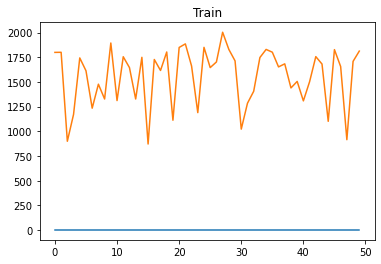

2/2 [==============================] - 1s 9ms/step


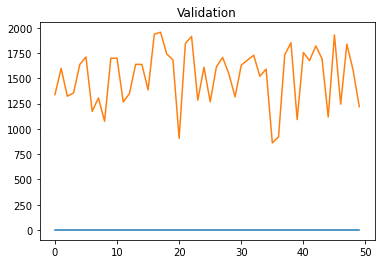

3/3 [==============================] - 0s 5ms/step


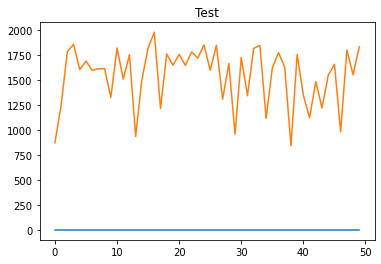

3/3 [==============================] - 0s 68ms/step


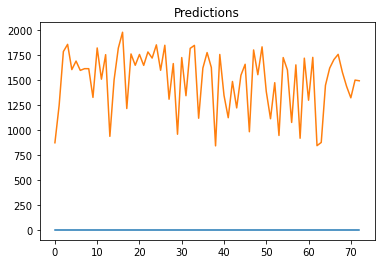

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 3845215.0000 - root_mean_squared_error: 1960.9220 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 12s 696ms/step - loss: 3746842.7500 - root_mean_squared_error: 1935.6763 - val_loss: 2783152.0000 - val_root_mean_squared_error: 1668.2782
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 3372905.7500 - root_mean_squared_error: 1836.5472

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 665ms/step - loss: 3382216.0000 - root_mean_squared_error: 1839.0802 - val_loss: 2571223.2500 - val_root_mean_squared_error: 1603.5034
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 3084741.2500 - root_mean_squared_error: 1756.3431

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 869ms/step - loss: 3025177.7500 - root_mean_squared_error: 1739.3038 - val_loss: 2461732.7500 - val_root_mean_squared_error: 1568.9910
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 2714442.7500 - root_mean_squared_error: 1647.5566

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 534ms/step - loss: 2751362.0000 - root_mean_squared_error: 1658.7230 - val_loss: 2352456.7500 - val_root_mean_squared_error: 1533.7721
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2626452.0000 - root_mean_squared_error: 1620.6332

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 491ms/step - loss: 2619930.5000 - root_mean_squared_error: 1618.6200 - val_loss: 2257268.5000 - val_root_mean_squared_error: 1502.4208
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2653176.2500 - root_mean_squared_error: 1628.8573

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 587ms/step - loss: 2516892.0000 - root_mean_squared_error: 1586.4716 - val_loss: 2226302.2500 - val_root_mean_squared_error: 1492.0798
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 2391089.5000 - root_mean_squared_error: 1546.3148

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 575ms/step - loss: 2388749.7500 - root_mean_squared_error: 1545.5581 - val_loss: 2187884.2500 - val_root_mean_squared_error: 1479.1498
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 2294772.7500 - root_mean_squared_error: 1514.8507

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 860ms/step - loss: 2293638.2500 - root_mean_squared_error: 1514.4762 - val_loss: 2126744.0000 - val_root_mean_squared_error: 1458.3362
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 2077012.1250 - root_mean_squared_error: 1441.1843

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 529ms/step - loss: 2249229.2500 - root_mean_squared_error: 1499.7430 - val_loss: 2057368.0000 - val_root_mean_squared_error: 1434.3528
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2146273.7500 - root_mean_squared_error: 1465.0166

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 572ms/step - loss: 2144785.0000 - root_mean_squared_error: 1464.5084 - val_loss: 1981881.0000 - val_root_mean_squared_error: 1407.7930
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2089951.0000 - root_mean_squared_error: 1445.6663

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 560ms/step - loss: 2089951.0000 - root_mean_squared_error: 1445.6663 - val_loss: 1900599.5000 - val_root_mean_squared_error: 1378.6223
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 1970602.7500 - root_mean_squared_error: 1403.7816

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 527ms/step - loss: 1968692.2500 - root_mean_squared_error: 1403.1010 - val_loss: 1815645.7500 - val_root_mean_squared_error: 1347.4590
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 1902248.0000 - root_mean_squared_error: 1379.2201

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 857ms/step - loss: 1902248.0000 - root_mean_squared_error: 1379.2201 - val_loss: 1726603.6250 - val_root_mean_squared_error: 1314.0029
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 1795683.7500 - root_mean_squared_error: 1340.0312

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 595ms/step - loss: 1798194.0000 - root_mean_squared_error: 1340.9675 - val_loss: 1636759.5000 - val_root_mean_squared_error: 1279.3590
Epoch 15/30
5/8 [=================>............] - ETA: 0s - loss: 1684006.7500 - root_mean_squared_error: 1297.6929

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 559ms/step - loss: 1661628.3750 - root_mean_squared_error: 1289.0416 - val_loss: 1544237.7500 - val_root_mean_squared_error: 1242.6736
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 1558184.7500 - root_mean_squared_error: 1248.2727

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 1558368.8750 - root_mean_squared_error: 1248.3464 - val_loss: 1452196.7500 - val_root_mean_squared_error: 1205.0713
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 1420059.7500 - root_mean_squared_error: 1191.6626

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 538ms/step - loss: 1421268.0000 - root_mean_squared_error: 1192.1694 - val_loss: 1361340.0000 - val_root_mean_squared_error: 1166.7648
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 1463965.5000 - root_mean_squared_error: 1209.9445

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 701ms/step - loss: 1383380.5000 - root_mean_squared_error: 1176.1720 - val_loss: 1270961.8750 - val_root_mean_squared_error: 1127.3695
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 1177092.8750 - root_mean_squared_error: 1084.9391

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 545ms/step - loss: 1213217.3750 - root_mean_squared_error: 1101.4614 - val_loss: 1184998.3750 - val_root_mean_squared_error: 1088.5763
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 1253938.7500 - root_mean_squared_error: 1119.7941

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 718ms/step - loss: 1095584.7500 - root_mean_squared_error: 1046.7019 - val_loss: 1078558.2500 - val_root_mean_squared_error: 1038.5366
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 894009.1875 - root_mean_squared_error: 945.5206

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 529ms/step - loss: 952798.8750 - root_mean_squared_error: 976.1142 - val_loss: 789440.8125 - val_root_mean_squared_error: 888.5048
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 714645.4375 - root_mean_squared_error: 845.3671

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 474ms/step - loss: 713209.8750 - root_mean_squared_error: 844.5175 - val_loss: 511522.0625 - val_root_mean_squared_error: 715.2077
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 577748.4375 - root_mean_squared_error: 760.0977

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 624ms/step - loss: 474743.6875 - root_mean_squared_error: 689.0165 - val_loss: 291435.1250 - val_root_mean_squared_error: 539.8474
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 351414.2812 - root_mean_squared_error: 592.8021

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 667ms/step - loss: 351414.2812 - root_mean_squared_error: 592.8021 - val_loss: 144211.5312 - val_root_mean_squared_error: 379.7519
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 238385.1875 - root_mean_squared_error: 488.2471

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 711ms/step - loss: 219491.9688 - root_mean_squared_error: 468.4997 - val_loss: 59117.2031 - val_root_mean_squared_error: 243.1403
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 143977.6250 - root_mean_squared_error: 379.4438

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 621ms/step - loss: 143977.6250 - root_mean_squared_error: 379.4438 - val_loss: 18669.7070 - val_root_mean_squared_error: 136.6371
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 121663.7344 - root_mean_squared_error: 348.8033

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 591ms/step - loss: 121663.7344 - root_mean_squared_error: 348.8033 - val_loss: 4929.1973 - val_root_mean_squared_error: 70.2082
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 92123.4375 - root_mean_squared_error: 303.5184

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 810ms/step - loss: 112116.0312 - root_mean_squared_error: 334.8373 - val_loss: 2110.1113 - val_root_mean_squared_error: 45.9359
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 116266.5391 - root_mean_squared_error: 340.9788

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 760ms/step - loss: 116266.5391 - root_mean_squared_error: 340.9788 - val_loss: 1777.1476 - val_root_mean_squared_error: 42.1562
Epoch 30/30
8/8 [==============================] - 0s 14ms/step


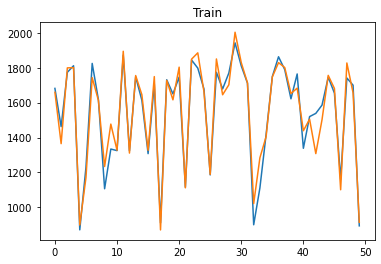

2/2 [==============================] - 1s 4ms/step


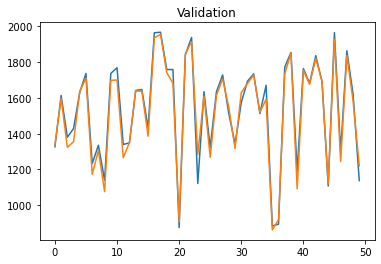

3/3 [==============================] - 0s 4ms/step


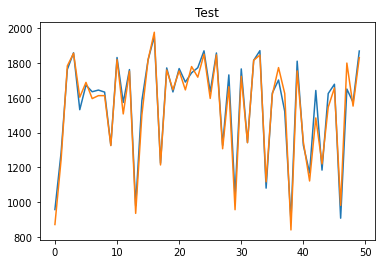

3/3 [==============================] - 0s 12ms/step


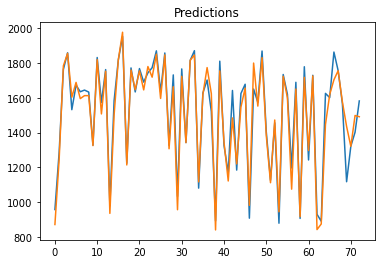

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

4847.754571761528

### GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2411524.7500 - root_mean_squared_error: 1552.9084  

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 3s/step - loss: 2417474.2500 - root_mean_squared_error: 1554.8229 - val_loss: 2404478.2500 - val_root_mean_squared_error: 1550.6381
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 2426600.0000 - root_mean_squared_error: 1557.7548

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2417389.0000 - root_mean_squared_error: 1554.7955 - val_loss: 2404374.5000 - val_root_mean_squared_error: 1550.6046
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 2378107.5000 - root_mean_squared_error: 1542.1113

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2417357.0000 - root_mean_squared_error: 1554.7852 - val_loss: 2404193.7500 - val_root_mean_squared_error: 1550.5463
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2418771.5000 - root_mean_squared_error: 1555.2400

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2417234.5000 - root_mean_squared_error: 1554.7458 - val_loss: 2403799.5000 - val_root_mean_squared_error: 1550.4192
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2461077.7500 - root_mean_squared_error: 1568.7822

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2416574.5000 - root_mean_squared_error: 1554.5336 - val_loss: 2403435.2500 - val_root_mean_squared_error: 1550.3016
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2416429.5000 - root_mean_squared_error: 1554.4869

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2416429.5000 - root_mean_squared_error: 1554.4869 - val_loss: 2403271.7500 - val_root_mean_squared_error: 1550.2489
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 2079799.2500 - root_mean_squared_error: 1442.1509

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2416190.2500 - root_mean_squared_error: 1554.4099 - val_loss: 2403157.5000 - val_root_mean_squared_error: 1550.2120
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 2421102.2500 - root_mean_squared_error: 1555.9891

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2415985.0000 - root_mean_squared_error: 1554.3439 - val_loss: 2403075.5000 - val_root_mean_squared_error: 1550.1857
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2410111.7500 - root_mean_squared_error: 1552.4535

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2416124.5000 - root_mean_squared_error: 1554.3888 - val_loss: 2402994.7500 - val_root_mean_squared_error: 1550.1595
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2416126.2500 - root_mean_squared_error: 1554.3894

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2416126.2500 - root_mean_squared_error: 1554.3894 - val_loss: 2402914.7500 - val_root_mean_squared_error: 1550.1338
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2415981.2500 - root_mean_squared_error: 1554.3427

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2415981.2500 - root_mean_squared_error: 1554.3427 - val_loss: 2402835.2500 - val_root_mean_squared_error: 1550.1082
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2417651.7500 - root_mean_squared_error: 1554.8800

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2415912.7500 - root_mean_squared_error: 1554.3207 - val_loss: 2402755.7500 - val_root_mean_squared_error: 1550.0825
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 2358958.5000 - root_mean_squared_error: 1535.8901

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2415757.2500 - root_mean_squared_error: 1554.2706 - val_loss: 2402674.7500 - val_root_mean_squared_error: 1550.0564
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2440882.0000 - root_mean_squared_error: 1562.3323

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2415751.0000 - root_mean_squared_error: 1554.2687 - val_loss: 2402585.5000 - val_root_mean_squared_error: 1550.0276
Epoch 15/30
4/8 [==============>...............] - ETA: 0s - loss: 2482898.0000 - root_mean_squared_error: 1575.7214

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2415579.7500 - root_mean_squared_error: 1554.2135 - val_loss: 2402412.7500 - val_root_mean_squared_error: 1549.9719
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2404978.0000 - root_mean_squared_error: 1550.7992

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2415295.0000 - root_mean_squared_error: 1554.1219 - val_loss: 2402080.5000 - val_root_mean_squared_error: 1549.8646
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2422036.5000 - root_mean_squared_error: 1556.2893

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2415044.7500 - root_mean_squared_error: 1554.0414 - val_loss: 2401985.0000 - val_root_mean_squared_error: 1549.8339
Epoch 18/30
4/8 [==============>...............] - ETA: 0s - loss: 2442077.2500 - root_mean_squared_error: 1562.7147

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2415012.2500 - root_mean_squared_error: 1554.0310 - val_loss: 2401900.7500 - val_root_mean_squared_error: 1549.8066
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 2438938.5000 - root_mean_squared_error: 1561.7101

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2414817.5000 - root_mean_squared_error: 1553.9683 - val_loss: 2401816.2500 - val_root_mean_squared_error: 1549.7794
Epoch 20/30
5/8 [=================>............] - ETA: 0s - loss: 2333307.2500 - root_mean_squared_error: 1527.5167

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2414760.7500 - root_mean_squared_error: 1553.9501 - val_loss: 2401733.0000 - val_root_mean_squared_error: 1549.7526
Epoch 21/30
5/8 [=================>............] - ETA: 0s - loss: 2452334.0000 - root_mean_squared_error: 1565.9929

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2414682.5000 - root_mean_squared_error: 1553.9249 - val_loss: 2401649.7500 - val_root_mean_squared_error: 1549.7257
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 2432649.5000 - root_mean_squared_error: 1559.6953

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2414350.2500 - root_mean_squared_error: 1553.8180 - val_loss: 2401566.2500 - val_root_mean_squared_error: 1549.6987
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2414666.0000 - root_mean_squared_error: 1553.9196

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2414666.0000 - root_mean_squared_error: 1553.9196 - val_loss: 2401484.2500 - val_root_mean_squared_error: 1549.6724
Epoch 24/30
4/8 [==============>...............] - ETA: 0s - loss: 2403119.7500 - root_mean_squared_error: 1550.2000

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2414553.2500 - root_mean_squared_error: 1553.8833 - val_loss: 2401402.5000 - val_root_mean_squared_error: 1549.6459
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2414422.7500 - root_mean_squared_error: 1553.8413

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2414422.7500 - root_mean_squared_error: 1553.8413 - val_loss: 2401320.2500 - val_root_mean_squared_error: 1549.6194
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2399981.7500 - root_mean_squared_error: 1549.1875

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2414289.7500 - root_mean_squared_error: 1553.7985 - val_loss: 2401238.0000 - val_root_mean_squared_error: 1549.5929
Epoch 27/30
5/8 [=================>............] - ETA: 0s - loss: 2436457.0000 - root_mean_squared_error: 1560.9154

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2414256.7500 - root_mean_squared_error: 1553.7878 - val_loss: 2401155.7500 - val_root_mean_squared_error: 1549.5663
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2394322.0000 - root_mean_squared_error: 1547.3597

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2414086.2500 - root_mean_squared_error: 1553.7330 - val_loss: 2401074.5000 - val_root_mean_squared_error: 1549.5400
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2416344.7500 - root_mean_squared_error: 1554.4596

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2414185.2500 - root_mean_squared_error: 1553.7649 - val_loss: 2400992.7500 - val_root_mean_squared_error: 1549.5138
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2413993.5000 - root_mean_squared_error: 1553.7031

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 2s 5ms/step


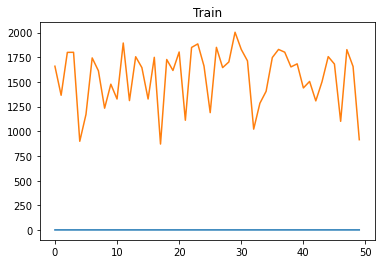

2/2 [==============================] - 2s 9ms/step


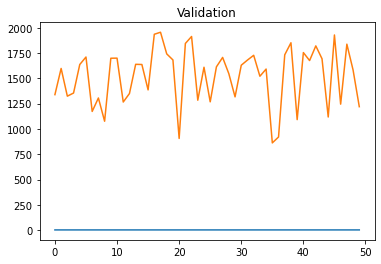

3/3 [==============================] - 0s 5ms/step


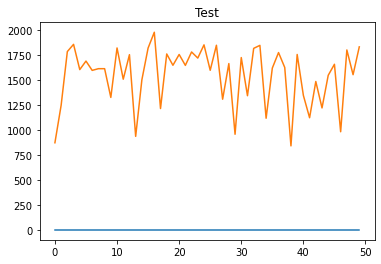

3/3 [==============================] - 0s 5ms/step


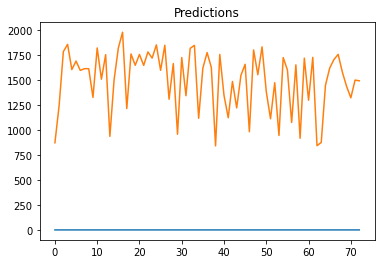

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

2331176.6915029627

### LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2407791.7500 - root_mean_squared_error: 1551.7061  

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 4s/step - loss: 2416962.7500 - root_mean_squared_error: 1554.6584 - val_loss: 2403669.0000 - val_root_mean_squared_error: 1550.3771
Epoch 2/30
6/8 [=====================>........] - ETA: 0s - loss: 2438449.7500 - root_mean_squared_error: 1561.5536

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2416830.0000 - root_mean_squared_error: 1554.6157 - val_loss: 2403482.7500 - val_root_mean_squared_error: 1550.3170
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 2462094.2500 - root_mean_squared_error: 1569.1062

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2416560.0000 - root_mean_squared_error: 1554.5288 - val_loss: 2403316.7500 - val_root_mean_squared_error: 1550.2634
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 2447600.2500 - root_mean_squared_error: 1564.4808

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2416395.0000 - root_mean_squared_error: 1554.4758 - val_loss: 2402974.2500 - val_root_mean_squared_error: 1550.1530
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2475436.0000 - root_mean_squared_error: 1573.3518

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2416163.2500 - root_mean_squared_error: 1554.4012 - val_loss: 2402885.2500 - val_root_mean_squared_error: 1550.1243
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2407296.7500 - root_mean_squared_error: 1551.5465

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2416033.5000 - root_mean_squared_error: 1554.3595 - val_loss: 2402479.0000 - val_root_mean_squared_error: 1549.9933
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2421856.5000 - root_mean_squared_error: 1556.2314

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2415661.2500 - root_mean_squared_error: 1554.2397 - val_loss: 2402258.5000 - val_root_mean_squared_error: 1549.9221
Epoch 8/30
3/8 [==========>...................] - ETA: 0s - loss: 2373587.2500 - root_mean_squared_error: 1540.6450

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2415442.2500 - root_mean_squared_error: 1554.1693 - val_loss: 2402185.7500 - val_root_mean_squared_error: 1549.8987
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2422136.7500 - root_mean_squared_error: 1556.3215

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2415321.7500 - root_mean_squared_error: 1554.1305 - val_loss: 2402043.5000 - val_root_mean_squared_error: 1549.8528
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2403288.5000 - root_mean_squared_error: 1550.2544

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2415209.2500 - root_mean_squared_error: 1554.0944 - val_loss: 2401798.0000 - val_root_mean_squared_error: 1549.7736
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2414994.7500 - root_mean_squared_error: 1554.0254

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2414994.7500 - root_mean_squared_error: 1554.0254 - val_loss: 2401688.7500 - val_root_mean_squared_error: 1549.7383
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2436955.7500 - root_mean_squared_error: 1561.0752

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2414933.5000 - root_mean_squared_error: 1554.0056 - val_loss: 2401628.7500 - val_root_mean_squared_error: 1549.7189
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2403566.5000 - root_mean_squared_error: 1550.3440

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2414804.7500 - root_mean_squared_error: 1553.9642 - val_loss: 2401539.5000 - val_root_mean_squared_error: 1549.6902
Epoch 14/30
5/8 [=================>............] - ETA: 0s - loss: 2451715.5000 - root_mean_squared_error: 1565.7955

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2414729.5000 - root_mean_squared_error: 1553.9399 - val_loss: 2401459.0000 - val_root_mean_squared_error: 1549.6642
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2408662.5000 - root_mean_squared_error: 1551.9866

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2414485.2500 - root_mean_squared_error: 1553.8615 - val_loss: 2401387.5000 - val_root_mean_squared_error: 1549.6411
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 2380358.7500 - root_mean_squared_error: 1542.8412

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2414453.2500 - root_mean_squared_error: 1553.8511 - val_loss: 2401293.0000 - val_root_mean_squared_error: 1549.6106
Epoch 17/30
5/8 [=================>............] - ETA: 0s - loss: 2464318.2500 - root_mean_squared_error: 1569.8147

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2414492.7500 - root_mean_squared_error: 1553.8638 - val_loss: 2401206.0000 - val_root_mean_squared_error: 1549.5825
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 2444308.5000 - root_mean_squared_error: 1563.4285

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2414279.2500 - root_mean_squared_error: 1553.7952 - val_loss: 2401079.0000 - val_root_mean_squared_error: 1549.5415
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2401553.7500 - root_mean_squared_error: 1549.6947

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2414273.5000 - root_mean_squared_error: 1553.7932 - val_loss: 2401024.7500 - val_root_mean_squared_error: 1549.5240
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 2378591.0000 - root_mean_squared_error: 1542.2682

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2414197.5000 - root_mean_squared_error: 1553.7688 - val_loss: 2400974.0000 - val_root_mean_squared_error: 1549.5077
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2414072.7500 - root_mean_squared_error: 1553.7286

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2414072.7500 - root_mean_squared_error: 1553.7286 - val_loss: 2400923.5000 - val_root_mean_squared_error: 1549.4913
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2414013.2500 - root_mean_squared_error: 1553.7095

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2414013.2500 - root_mean_squared_error: 1553.7095 - val_loss: 2400872.7500 - val_root_mean_squared_error: 1549.4750
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 2362023.7500 - root_mean_squared_error: 1536.8877

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2414105.2500 - root_mean_squared_error: 1553.7391 - val_loss: 2400821.7500 - val_root_mean_squared_error: 1549.4585
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2421314.7500 - root_mean_squared_error: 1556.0575

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 2414051.5000 - root_mean_squared_error: 1553.7218 - val_loss: 2400771.2500 - val_root_mean_squared_error: 1549.4423
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2422958.7500 - root_mean_squared_error: 1556.5856

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2413734.2500 - root_mean_squared_error: 1553.6198 - val_loss: 2400719.7500 - val_root_mean_squared_error: 1549.4257
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2413871.0000 - root_mean_squared_error: 1553.6637

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2413871.0000 - root_mean_squared_error: 1553.6637 - val_loss: 2400667.7500 - val_root_mean_squared_error: 1549.4088
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2413642.2500 - root_mean_squared_error: 1553.5901

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 2413642.2500 - root_mean_squared_error: 1553.5901 - val_loss: 2400615.2500 - val_root_mean_squared_error: 1549.3918
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2413552.2500 - root_mean_squared_error: 1553.5612

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2413552.2500 - root_mean_squared_error: 1553.5612 - val_loss: 2400562.0000 - val_root_mean_squared_error: 1549.3748
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2397091.7500 - root_mean_squared_error: 1548.2544

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2413607.5000 - root_mean_squared_error: 1553.5790 - val_loss: 2400508.7500 - val_root_mean_squared_error: 1549.3575
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 2414683.5000 - root_mean_squared_error: 1553.9252

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 4s 9ms/step


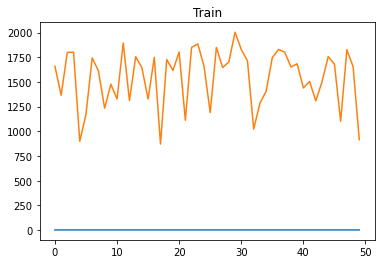

2/2 [==============================] - 2s 6ms/step


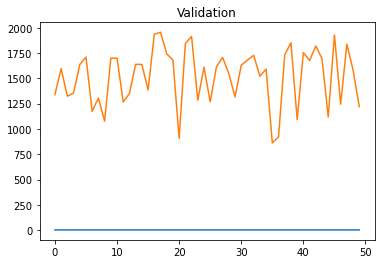

3/3 [==============================] - 0s 5ms/step


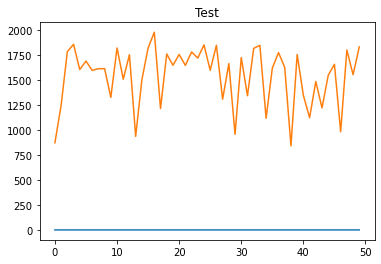

3/3 [==============================] - 0s 3ms/step


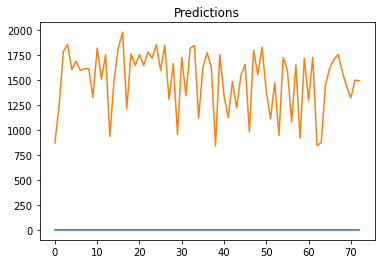

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

2330729.719180168

### RNN

Epoch 1/30
1/8 [==>...........................] - ETA: 1:59 - loss: 2398977.2500 - root_mean_squared_error: 1548.8632INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 26s 1s/step - loss: 2418442.2500 - root_mean_squared_error: 1555.1342 - val_loss: 2405285.0000 - val_root_mean_squared_error: 1550.8981
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 2467908.0000 - root_mean_squared_error: 1570.9576INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2418168.2500 - root_mean_squared_error: 1555.0460 - val_loss: 2405127.7500 - val_root_mean_squared_error: 1550.8474
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 2541544.5000 - root_mean_squared_error: 1594.2222INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 920ms/step - loss: 2418160.0000 - root_mean_squared_error: 1555.0435 - val_loss: 2404971.0000 - val_root_mean_squared_error: 1550.7969
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 2319906.5000 - root_mean_squared_error: 1523.1239INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 867ms/step - loss: 2418262.7500 - root_mean_squared_error: 1555.0764 - val_loss: 2404813.7500 - val_root_mean_squared_error: 1550.7462
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 2416506.2500 - root_mean_squared_error: 1554.5116INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 983ms/step - loss: 2417983.0000 - root_mean_squared_error: 1554.9865 - val_loss: 2404657.0000 - val_root_mean_squared_error: 1550.6957
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 2191859.0000 - root_mean_squared_error: 1480.4928INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2417593.7500 - root_mean_squared_error: 1554.8613 - val_loss: 2404499.2500 - val_root_mean_squared_error: 1550.6448
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 2099345.7500 - root_mean_squared_error: 1448.9119INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2417243.7500 - root_mean_squared_error: 1554.7488 - val_loss: 2404341.5000 - val_root_mean_squared_error: 1550.5939
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 2210222.0000 - root_mean_squared_error: 1486.6815INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 839ms/step - loss: 2417262.2500 - root_mean_squared_error: 1554.7548 - val_loss: 2404182.5000 - val_root_mean_squared_error: 1550.5426
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2406655.2500 - root_mean_squared_error: 1551.3398INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 797ms/step - loss: 2417031.2500 - root_mean_squared_error: 1554.6804 - val_loss: 2404024.7500 - val_root_mean_squared_error: 1550.4918
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 2355811.0000 - root_mean_squared_error: 1534.8651INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 902ms/step - loss: 2416644.2500 - root_mean_squared_error: 1554.5559 - val_loss: 2403867.0000 - val_root_mean_squared_error: 1550.4409
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2426136.5000 - root_mean_squared_error: 1557.6060INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2417035.2500 - root_mean_squared_error: 1554.6818 - val_loss: 2403710.2500 - val_root_mean_squared_error: 1550.3904
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 2462373.0000 - root_mean_squared_error: 1569.1951INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 764ms/step - loss: 2416812.0000 - root_mean_squared_error: 1554.6099 - val_loss: 2403553.5000 - val_root_mean_squared_error: 1550.3398
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2416648.0000 - root_mean_squared_error: 1554.5571INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2416648.0000 - root_mean_squared_error: 1554.5571 - val_loss: 2403398.2500 - val_root_mean_squared_error: 1550.2897
Epoch 14/30
5/8 [=================>............] - ETA: 0s - loss: 2500032.2500 - root_mean_squared_error: 1581.1490INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 873ms/step - loss: 2416168.7500 - root_mean_squared_error: 1554.4031 - val_loss: 2403241.0000 - val_root_mean_squared_error: 1550.2390
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2415865.0000 - root_mean_squared_error: 1554.3053INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 925ms/step - loss: 2415865.0000 - root_mean_squared_error: 1554.3053 - val_loss: 2403085.2500 - val_root_mean_squared_error: 1550.1887
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2415849.0000 - root_mean_squared_error: 1554.3002INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 932ms/step - loss: 2415849.0000 - root_mean_squared_error: 1554.3002 - val_loss: 2402928.7500 - val_root_mean_squared_error: 1550.1383
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2399951.0000 - root_mean_squared_error: 1549.1775INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 695ms/step - loss: 2415938.0000 - root_mean_squared_error: 1554.3287 - val_loss: 2402774.2500 - val_root_mean_squared_error: 1550.0885
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 2629185.5000 - root_mean_squared_error: 1621.4763INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 977ms/step - loss: 2415367.5000 - root_mean_squared_error: 1554.1453 - val_loss: 2402616.7500 - val_root_mean_squared_error: 1550.0377
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2415078.7500 - root_mean_squared_error: 1554.0524INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2415591.5000 - root_mean_squared_error: 1554.2173 - val_loss: 2402459.5000 - val_root_mean_squared_error: 1549.9869
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 2476198.5000 - root_mean_squared_error: 1573.5941INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2415226.2500 - root_mean_squared_error: 1554.0999 - val_loss: 2402303.5000 - val_root_mean_squared_error: 1549.9366
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2415455.5000 - root_mean_squared_error: 1554.1736INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2415455.5000 - root_mean_squared_error: 1554.1736 - val_loss: 2402148.2500 - val_root_mean_squared_error: 1549.8865
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2414912.2500 - root_mean_squared_error: 1553.9988INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2414912.2500 - root_mean_squared_error: 1553.9988 - val_loss: 2401992.2500 - val_root_mean_squared_error: 1549.8362
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 2009995.2500 - root_mean_squared_error: 1417.7430INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 898ms/step - loss: 2415250.2500 - root_mean_squared_error: 1554.1075 - val_loss: 2401838.0000 - val_root_mean_squared_error: 1549.7864
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2407588.5000 - root_mean_squared_error: 1551.6406INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 996ms/step - loss: 2415191.5000 - root_mean_squared_error: 1554.0886 - val_loss: 2401681.0000 - val_root_mean_squared_error: 1549.7358
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 2527380.0000 - root_mean_squared_error: 1589.7736INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2414513.0000 - root_mean_squared_error: 1553.8704 - val_loss: 2401523.7500 - val_root_mean_squared_error: 1549.6851
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 2366534.5000 - root_mean_squared_error: 1538.3545INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 794ms/step - loss: 2414529.5000 - root_mean_squared_error: 1553.8756 - val_loss: 2401366.5000 - val_root_mean_squared_error: 1549.6343
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 2536145.0000 - root_mean_squared_error: 1592.5278INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 802ms/step - loss: 2414281.7500 - root_mean_squared_error: 1553.7959 - val_loss: 2401209.5000 - val_root_mean_squared_error: 1549.5836
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2414200.2500 - root_mean_squared_error: 1553.7697INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 978ms/step - loss: 2414200.2500 - root_mean_squared_error: 1553.7697 - val_loss: 2401053.7500 - val_root_mean_squared_error: 1549.5334
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 2215874.0000 - root_mean_squared_error: 1488.5812INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 951ms/step - loss: 2413623.5000 - root_mean_squared_error: 1553.5841 - val_loss: 2400897.5000 - val_root_mean_squared_error: 1549.4830
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 2250737.5000 - root_mean_squared_error: 1500.2458INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 10ms/step


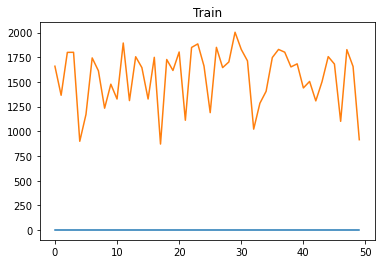

2/2 [==============================] - 1s 6ms/step


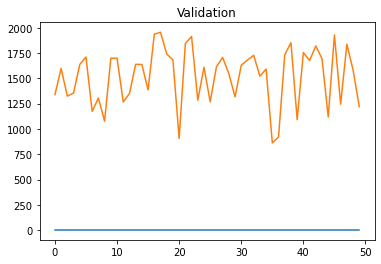

3/3 [==============================] - 0s 5ms/step


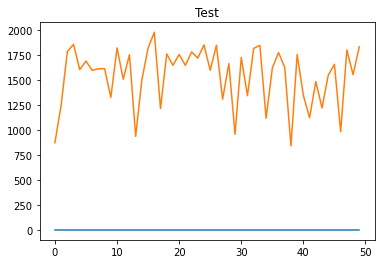

3/3 [==============================] - 0s 5ms/step


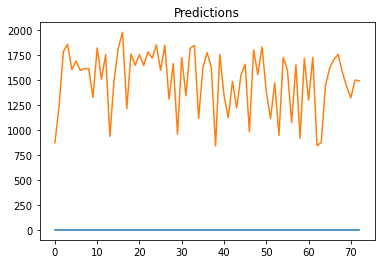

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

2331009.3208438223

# Moving Average with Encoder

### CNN

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 2355706.0000 - root_mean_squared_error: 1534.8309 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 807ms/step - loss: 2348629.0000 - root_mean_squared_error: 1532.5237 - val_loss: 2304498.2500 - val_root_mean_squared_error: 1518.0574
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2068770.0000 - root_mean_squared_error: 1438.3219

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2068182.7500 - root_mean_squared_error: 1438.1178 - val_loss: 2007154.3750 - val_root_mean_squared_error: 1416.7407
Epoch 3/10
1/8 [==>...........................] - ETA: 0s - loss: 1727015.7500 - root_mean_squared_error: 1314.1597

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 660ms/step - loss: 1806494.0000 - root_mean_squared_error: 1344.0588 - val_loss: 1781336.0000 - val_root_mean_squared_error: 1334.6670
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 1603965.6250 - root_mean_squared_error: 1266.4777

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 482ms/step - loss: 1561460.6250 - root_mean_squared_error: 1249.5842 - val_loss: 1554993.0000 - val_root_mean_squared_error: 1246.9935
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 1382791.0000 - root_mean_squared_error: 1175.9214

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 557ms/step - loss: 1382791.0000 - root_mean_squared_error: 1175.9214 - val_loss: 1323181.1250 - val_root_mean_squared_error: 1150.2961
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 1185810.1250 - root_mean_squared_error: 1088.9491

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 516ms/step - loss: 1169525.0000 - root_mean_squared_error: 1081.4458 - val_loss: 1098476.8750 - val_root_mean_squared_error: 1048.0825
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 852097.4375 - root_mean_squared_error: 923.0912

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 715ms/step - loss: 893987.5625 - root_mean_squared_error: 945.5092 - val_loss: 875729.1250 - val_root_mean_squared_error: 935.8040
Epoch 8/10
1/8 [==>...........................] - ETA: 0s - loss: 709982.8125 - root_mean_squared_error: 842.6048

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 831ms/step - loss: 807479.5625 - root_mean_squared_error: 898.5987 - val_loss: 638927.8125 - val_root_mean_squared_error: 799.3296
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 624188.0000 - root_mean_squared_error: 790.0557

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 443ms/step - loss: 624188.0000 - root_mean_squared_error: 790.0557 - val_loss: 445425.6250 - val_root_mean_squared_error: 667.4022
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 540535.3750 - root_mean_squared_error: 735.2111

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 6ms/step


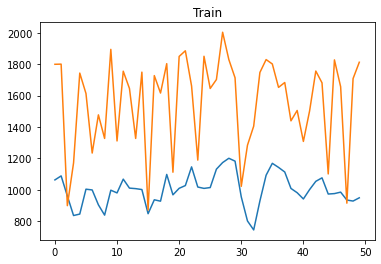

2/2 [==============================] - 0s 7ms/step


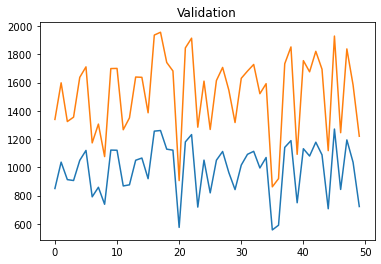

3/3 [==============================] - 0s 4ms/step


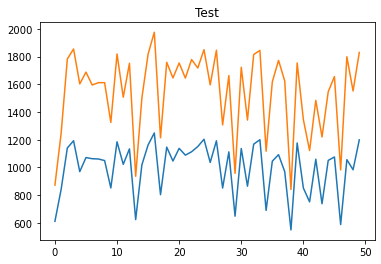

3/3 [==============================] - 0s 4ms/step


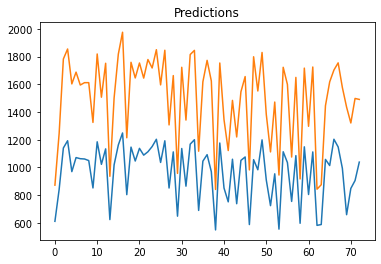

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

293363.65634430054

### RNN

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2420735.5000 - root_mean_squared_error: 1555.8713 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 19s 2s/step - loss: 2420735.5000 - root_mean_squared_error: 1555.8713 - val_loss: 2405959.5000 - val_root_mean_squared_error: 1551.1156
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 2405315.5000 - root_mean_squared_error: 1550.9080INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 834ms/step - loss: 2419691.2500 - root_mean_squared_error: 1555.5356 - val_loss: 2405778.2500 - val_root_mean_squared_error: 1551.0571
Epoch 3/10
1/8 [==>...........................] - ETA: 0s - loss: 2380349.7500 - root_mean_squared_error: 1542.8383INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2419587.7500 - root_mean_squared_error: 1555.5024 - val_loss: 2405445.7500 - val_root_mean_squared_error: 1550.9500
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 2407021.2500 - root_mean_squared_error: 1551.4578INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2418629.7500 - root_mean_squared_error: 1555.1945 - val_loss: 2404506.7500 - val_root_mean_squared_error: 1550.6472
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 2409617.2500 - root_mean_squared_error: 1552.2942INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2418389.0000 - root_mean_squared_error: 1555.1171 - val_loss: 2403493.5000 - val_root_mean_squared_error: 1550.3204
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 2417076.5000 - root_mean_squared_error: 1554.6949INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 961ms/step - loss: 2417076.5000 - root_mean_squared_error: 1554.6949 - val_loss: 2402921.0000 - val_root_mean_squared_error: 1550.1357
Epoch 7/10
6/8 [=====================>........] - ETA: 0s - loss: 2402147.5000 - root_mean_squared_error: 1549.8862INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 888ms/step - loss: 2417187.7500 - root_mean_squared_error: 1554.7307 - val_loss: 2402745.7500 - val_root_mean_squared_error: 1550.0792
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 2416664.7500 - root_mean_squared_error: 1554.5625INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2416664.7500 - root_mean_squared_error: 1554.5625 - val_loss: 2402586.0000 - val_root_mean_squared_error: 1550.0277
Epoch 9/10
5/8 [=================>............] - ETA: 0s - loss: 2470598.5000 - root_mean_squared_error: 1571.8137INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 929ms/step - loss: 2416561.7500 - root_mean_squared_error: 1554.5294 - val_loss: 2402428.5000 - val_root_mean_squared_error: 1549.9769
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 2207780.0000 - root_mean_squared_error: 1485.8600INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 14ms/step


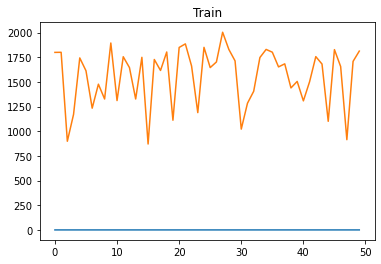

2/2 [==============================] - 1s 22ms/step


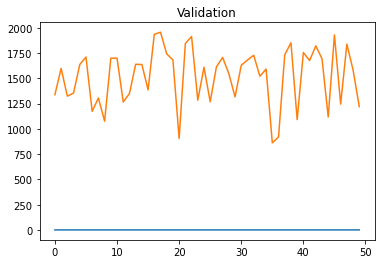

3/3 [==============================] - 0s 24ms/step


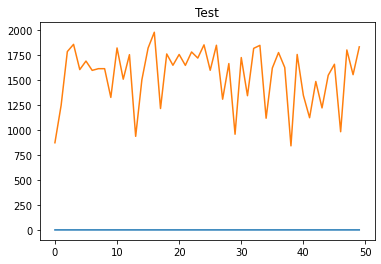

3/3 [==============================] - 1s 27ms/step


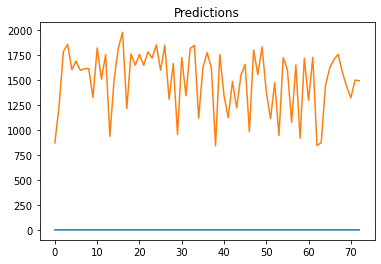

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

2332514.1688923277

### GRU

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 2419482.0000 - root_mean_squared_error: 1555.4684  

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 1s/step - loss: 2419482.0000 - root_mean_squared_error: 1555.4684 - val_loss: 2405362.5000 - val_root_mean_squared_error: 1550.9231
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 2420942.0000 - root_mean_squared_error: 1555.9376

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 2419310.5000 - root_mean_squared_error: 1555.4133 - val_loss: 2405285.5000 - val_root_mean_squared_error: 1550.8983
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 2419159.0000 - root_mean_squared_error: 1555.3646

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2419159.0000 - root_mean_squared_error: 1555.3646 - val_loss: 2405189.5000 - val_root_mean_squared_error: 1550.8673
Epoch 4/10
1/8 [==>...........................] - ETA: 0s - loss: 2492544.0000 - root_mean_squared_error: 1578.7793

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2419257.5000 - root_mean_squared_error: 1555.3962 - val_loss: 2404898.0000 - val_root_mean_squared_error: 1550.7733
Epoch 5/10
6/8 [=====================>........] - ETA: 0s - loss: 2420838.0000 - root_mean_squared_error: 1555.9043

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2418470.0000 - root_mean_squared_error: 1555.1431 - val_loss: 2403867.7500 - val_root_mean_squared_error: 1550.4412
Epoch 6/10
5/8 [=================>............] - ETA: 0s - loss: 2387061.0000 - root_mean_squared_error: 1545.0116

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2417711.5000 - root_mean_squared_error: 1554.8992 - val_loss: 2403318.5000 - val_root_mean_squared_error: 1550.2640
Epoch 7/10
5/8 [=================>............] - ETA: 0s - loss: 2457666.5000 - root_mean_squared_error: 1567.6947

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2417194.5000 - root_mean_squared_error: 1554.7329 - val_loss: 2402989.7500 - val_root_mean_squared_error: 1550.1580
Epoch 8/10
6/8 [=====================>........] - ETA: 0s - loss: 2387552.0000 - root_mean_squared_error: 1545.1705

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2417000.5000 - root_mean_squared_error: 1554.6705 - val_loss: 2402876.7500 - val_root_mean_squared_error: 1550.1216
Epoch 9/10
6/8 [=====================>........] - ETA: 0s - loss: 2450813.2500 - root_mean_squared_error: 1565.5073

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 2416935.5000 - root_mean_squared_error: 1554.6497 - val_loss: 2402795.2500 - val_root_mean_squared_error: 1550.0953
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 2448569.7500 - root_mean_squared_error: 1564.7906

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 5s 6ms/step


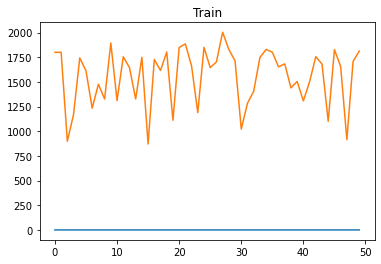

2/2 [==============================] - 2s 7ms/step


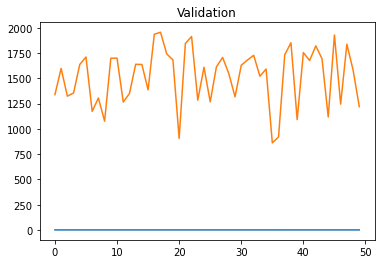

3/3 [==============================] - 0s 8ms/step


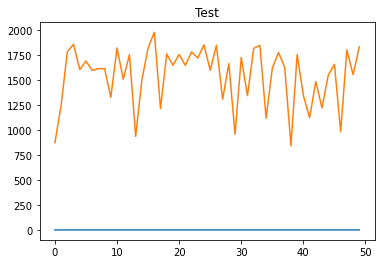

3/3 [==============================] - 0s 13ms/step


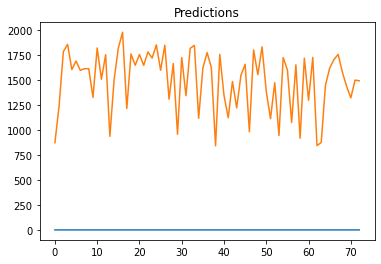

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

2332951.7615373493

### LSTM

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 2408149.2500 - root_mean_squared_error: 1551.8213  

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 3s/step - loss: 2420046.7500 - root_mean_squared_error: 1555.6499 - val_loss: 2405974.0000 - val_root_mean_squared_error: 1551.1202
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2428162.7500 - root_mean_squared_error: 1558.2563

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2419959.0000 - root_mean_squared_error: 1555.6217 - val_loss: 2405872.0000 - val_root_mean_squared_error: 1551.0874
Epoch 3/10
4/8 [==============>...............] - ETA: 0s - loss: 2382531.7500 - root_mean_squared_error: 1543.5452

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2419718.2500 - root_mean_squared_error: 1555.5443 - val_loss: 2405712.5000 - val_root_mean_squared_error: 1551.0359
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 2430125.2500 - root_mean_squared_error: 1558.8859

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2419449.2500 - root_mean_squared_error: 1555.4579 - val_loss: 2405575.0000 - val_root_mean_squared_error: 1550.9916
Epoch 5/10
4/8 [==============>...............] - ETA: 0s - loss: 2353103.5000 - root_mean_squared_error: 1533.9829

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2419376.2500 - root_mean_squared_error: 1555.4344 - val_loss: 2405437.7500 - val_root_mean_squared_error: 1550.9474
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 2433403.2500 - root_mean_squared_error: 1559.9369

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2419308.2500 - root_mean_squared_error: 1555.4126 - val_loss: 2405254.0000 - val_root_mean_squared_error: 1550.8882
Epoch 7/10
5/8 [=================>............] - ETA: 0s - loss: 2393840.5000 - root_mean_squared_error: 1547.2041

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2419126.5000 - root_mean_squared_error: 1555.3541 - val_loss: 2405155.2500 - val_root_mean_squared_error: 1550.8563
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 2419253.7500 - root_mean_squared_error: 1555.3950

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2419253.7500 - root_mean_squared_error: 1555.3950 - val_loss: 2405104.0000 - val_root_mean_squared_error: 1550.8397
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 2417416.2500 - root_mean_squared_error: 1554.8042

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 2419169.0000 - root_mean_squared_error: 1555.3678 - val_loss: 2405062.5000 - val_root_mean_squared_error: 1550.8264
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 2397298.0000 - root_mean_squared_error: 1548.3210

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 3s 10ms/step


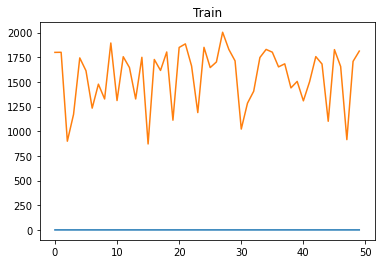

2/2 [==============================] - 1s 6ms/step


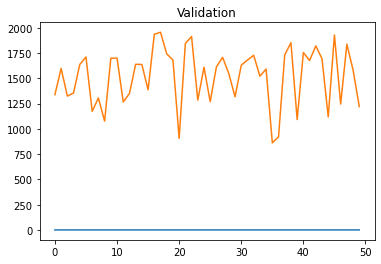

3/3 [==============================] - 0s 5ms/step


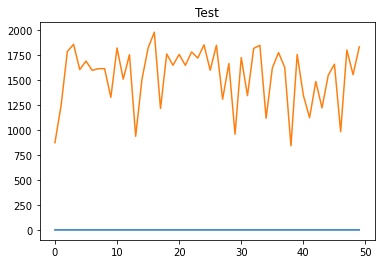

3/3 [==============================] - 0s 4ms/step


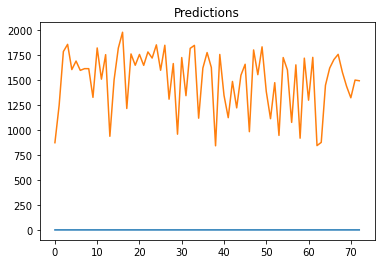

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

2335213.535685018

# Hybrid

## General

### CNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2418478.0000 - root_mean_squared_error: 1555.1456

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 98s 10s/step - loss: 2418478.0000 - root_mean_squared_error: 1555.1456 - val_loss: 2404930.7500 - val_root_mean_squared_error: 1550.7838
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2423701.7500 - root_mean_squared_error: 1556.8242

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 66s 9s/step - loss: 2417784.0000 - root_mean_squared_error: 1554.9225 - val_loss: 2404431.5000 - val_root_mean_squared_error: 1550.6229
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2417315.0000 - root_mean_squared_error: 1554.7717

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 87s 12s/step - loss: 2417315.0000 - root_mean_squared_error: 1554.7717 - val_loss: 2404004.7500 - val_root_mean_squared_error: 1550.4854
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2416846.7500 - root_mean_squared_error: 1554.6211

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 80s 11s/step - loss: 2416846.7500 - root_mean_squared_error: 1554.6211 - val_loss: 2403455.0000 - val_root_mean_squared_error: 1550.3080
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2416329.2500 - root_mean_squared_error: 1554.4546

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 2416329.2500 - root_mean_squared_error: 1554.4546 - val_loss: 2402975.0000 - val_root_mean_squared_error: 1550.1532
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2415801.0000 - root_mean_squared_error: 1554.2847

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 12s/step - loss: 2415801.0000 - root_mean_squared_error: 1554.2847 - val_loss: 2402322.0000 - val_root_mean_squared_error: 1549.9426
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2407188.7500 - root_mean_squared_error: 1551.5117

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 69s 10s/step - loss: 2415205.7500 - root_mean_squared_error: 1554.0933 - val_loss: 2401869.2500 - val_root_mean_squared_error: 1549.7966
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2414751.0000 - root_mean_squared_error: 1553.9469

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 2414751.0000 - root_mean_squared_error: 1553.9469 - val_loss: 2401403.5000 - val_root_mean_squared_error: 1549.6462
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2414128.2500 - root_mean_squared_error: 1553.7465

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 2414128.2500 - root_mean_squared_error: 1553.7465 - val_loss: 2400422.5000 - val_root_mean_squared_error: 1549.3297
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2413096.2500 - root_mean_squared_error: 1553.4144

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 2413096.2500 - root_mean_squared_error: 1553.4144 - val_loss: 2399573.0000 - val_root_mean_squared_error: 1549.0555
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2412386.7500 - root_mean_squared_error: 1553.1860

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 76s 9s/step - loss: 2412386.7500 - root_mean_squared_error: 1553.1860 - val_loss: 2398874.0000 - val_root_mean_squared_error: 1548.8298
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2411691.5000 - root_mean_squared_error: 1552.9622

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 13s/step - loss: 2411691.5000 - root_mean_squared_error: 1552.9622 - val_loss: 2398236.7500 - val_root_mean_squared_error: 1548.6241
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2411032.0000 - root_mean_squared_error: 1552.7499

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 2411032.0000 - root_mean_squared_error: 1552.7499 - val_loss: 2397475.5000 - val_root_mean_squared_error: 1548.3783
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2410303.5000 - root_mean_squared_error: 1552.5153

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 12s/step - loss: 2410303.5000 - root_mean_squared_error: 1552.5153 - val_loss: 2396844.7500 - val_root_mean_squared_error: 1548.1747
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2409661.2500 - root_mean_squared_error: 1552.3083

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 79s 11s/step - loss: 2409661.2500 - root_mean_squared_error: 1552.3083 - val_loss: 2396209.7500 - val_root_mean_squared_error: 1547.9696
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2409033.7500 - root_mean_squared_error: 1552.1062

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 12s/step - loss: 2409033.7500 - root_mean_squared_error: 1552.1062 - val_loss: 2395575.0000 - val_root_mean_squared_error: 1547.7645
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2401997.7500 - root_mean_squared_error: 1549.8380

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 79s 11s/step - loss: 2408355.2500 - root_mean_squared_error: 1551.8877 - val_loss: 2394847.5000 - val_root_mean_squared_error: 1547.5295
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2405822.2500 - root_mean_squared_error: 1551.0713

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 79s 11s/step - loss: 2407683.5000 - root_mean_squared_error: 1551.6711 - val_loss: 2394225.0000 - val_root_mean_squared_error: 1547.3284
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2407069.7500 - root_mean_squared_error: 1551.4734

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 68s 9s/step - loss: 2407069.7500 - root_mean_squared_error: 1551.4734 - val_loss: 2393623.0000 - val_root_mean_squared_error: 1547.1339
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2406454.0000 - root_mean_squared_error: 1551.2749

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 2406454.0000 - root_mean_squared_error: 1551.2749 - val_loss: 2392945.0000 - val_root_mean_squared_error: 1546.9147
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2405813.2500 - root_mean_squared_error: 1551.0685

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 2405813.2500 - root_mean_squared_error: 1551.0685 - val_loss: 2392357.2500 - val_root_mean_squared_error: 1546.7247
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2405145.5000 - root_mean_squared_error: 1550.8531

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 2405145.5000 - root_mean_squared_error: 1550.8531 - val_loss: 2391674.5000 - val_root_mean_squared_error: 1546.5039
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2400867.2500 - root_mean_squared_error: 1549.4733

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 76s 11s/step - loss: 2404519.0000 - root_mean_squared_error: 1550.6511 - val_loss: 2391078.2500 - val_root_mean_squared_error: 1546.3112
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2406616.2500 - root_mean_squared_error: 1551.3273

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 82s 11s/step - loss: 2403957.5000 - root_mean_squared_error: 1550.4701 - val_loss: 2390541.2500 - val_root_mean_squared_error: 1546.1376
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2403427.0000 - root_mean_squared_error: 1550.2990

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 11s/step - loss: 2403427.0000 - root_mean_squared_error: 1550.2990 - val_loss: 2390025.5000 - val_root_mean_squared_error: 1545.9707
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2402920.0000 - root_mean_squared_error: 1550.1355

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 82s 12s/step - loss: 2402920.0000 - root_mean_squared_error: 1550.1355 - val_loss: 2389527.7500 - val_root_mean_squared_error: 1545.8097
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2402430.0000 - root_mean_squared_error: 1549.9774

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 2402430.0000 - root_mean_squared_error: 1549.9774 - val_loss: 2389041.5000 - val_root_mean_squared_error: 1545.6525
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2401893.5000 - root_mean_squared_error: 1549.8043

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 2401893.5000 - root_mean_squared_error: 1549.8043 - val_loss: 2388432.2500 - val_root_mean_squared_error: 1545.4553
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2401338.7500 - root_mean_squared_error: 1549.6254

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 2401338.7500 - root_mean_squared_error: 1549.6254 - val_loss: 2387959.2500 - val_root_mean_squared_error: 1545.3024
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2400871.2500 - root_mean_squared_error: 1549.4745

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 15s 23ms/step


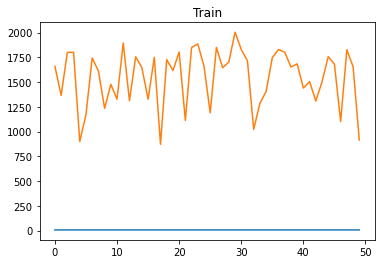

2/2 [==============================] - 8s 37ms/step


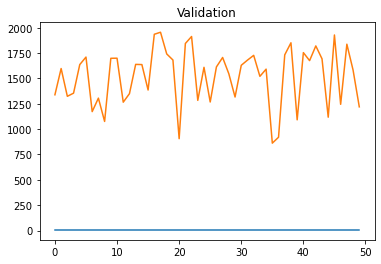

3/3 [==============================] - 0s 190ms/step


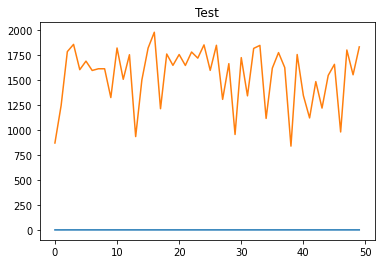

3/3 [==============================] - 0s 7ms/step


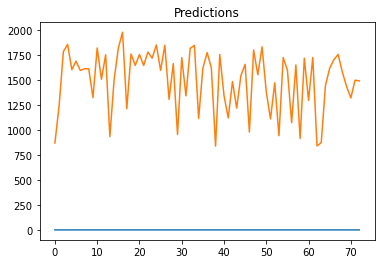

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

2318020.2980034994

### RNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2414073.7500 - root_mean_squared_error: 1553.7290

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 108s 12s/step - loss: 2414073.7500 - root_mean_squared_error: 1553.7290 - val_loss: 2400572.5000 - val_root_mean_squared_error: 1549.3781
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2413376.7500 - root_mean_squared_error: 1553.5046

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 2413376.7500 - root_mean_squared_error: 1553.5046 - val_loss: 2399913.7500 - val_root_mean_squared_error: 1549.1655
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2412725.2500 - root_mean_squared_error: 1553.2949

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 2412725.2500 - root_mean_squared_error: 1553.2949 - val_loss: 2399256.7500 - val_root_mean_squared_error: 1548.9535
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2412069.2500 - root_mean_squared_error: 1553.0837

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 56s 8s/step - loss: 2412069.2500 - root_mean_squared_error: 1553.0837 - val_loss: 2398602.7500 - val_root_mean_squared_error: 1548.7423
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2415618.2500 - root_mean_squared_error: 1554.2260

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2411415.5000 - root_mean_squared_error: 1552.8733 - val_loss: 2397941.0000 - val_root_mean_squared_error: 1548.5287
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2410753.5000 - root_mean_squared_error: 1552.6602

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2410753.5000 - root_mean_squared_error: 1552.6602 - val_loss: 2397269.0000 - val_root_mean_squared_error: 1548.3116
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2411782.5000 - root_mean_squared_error: 1552.9915

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2410076.7500 - root_mean_squared_error: 1552.4421 - val_loss: 2396581.0000 - val_root_mean_squared_error: 1548.0895
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2409383.2500 - root_mean_squared_error: 1552.2189

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2409383.2500 - root_mean_squared_error: 1552.2189 - val_loss: 2395878.0000 - val_root_mean_squared_error: 1547.8624
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2408638.0000 - root_mean_squared_error: 1551.9788

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 2408638.0000 - root_mean_squared_error: 1551.9788 - val_loss: 2395059.2500 - val_root_mean_squared_error: 1547.5979
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2400552.5000 - root_mean_squared_error: 1549.3717

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 2407857.7500 - root_mean_squared_error: 1551.7273 - val_loss: 2394334.0000 - val_root_mean_squared_error: 1547.3635
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2399465.7500 - root_mean_squared_error: 1549.0209

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 2407119.7500 - root_mean_squared_error: 1551.4895 - val_loss: 2393589.5000 - val_root_mean_squared_error: 1547.1229
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2406378.7500 - root_mean_squared_error: 1551.2507

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 53s 7s/step - loss: 2406378.7500 - root_mean_squared_error: 1551.2507 - val_loss: 2392843.2500 - val_root_mean_squared_error: 1546.8818
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2405638.7500 - root_mean_squared_error: 1551.0122

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2405638.7500 - root_mean_squared_error: 1551.0122 - val_loss: 2392108.2500 - val_root_mean_squared_error: 1546.6442
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2404916.0000 - root_mean_squared_error: 1550.7792

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 2404916.0000 - root_mean_squared_error: 1550.7792 - val_loss: 2391394.5000 - val_root_mean_squared_error: 1546.4135
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2404209.2500 - root_mean_squared_error: 1550.5513

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 6s/step - loss: 2404209.2500 - root_mean_squared_error: 1550.5513 - val_loss: 2390701.2500 - val_root_mean_squared_error: 1546.1892
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2403520.2500 - root_mean_squared_error: 1550.3291

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 2403520.2500 - root_mean_squared_error: 1550.3291 - val_loss: 2390029.7500 - val_root_mean_squared_error: 1545.9720
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2435819.2500 - root_mean_squared_error: 1560.7112

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2402865.7500 - root_mean_squared_error: 1550.1179 - val_loss: 2389377.7500 - val_root_mean_squared_error: 1545.7612
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2395501.2500 - root_mean_squared_error: 1547.7407

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 2402223.0000 - root_mean_squared_error: 1549.9106 - val_loss: 2388755.2500 - val_root_mean_squared_error: 1545.5598
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2401611.7500 - root_mean_squared_error: 1549.7135

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 2401611.7500 - root_mean_squared_error: 1549.7135 - val_loss: 2388156.5000 - val_root_mean_squared_error: 1545.3661
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2401023.7500 - root_mean_squared_error: 1549.5237

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2401023.7500 - root_mean_squared_error: 1549.5237 - val_loss: 2387589.5000 - val_root_mean_squared_error: 1545.1826
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2400469.0000 - root_mean_squared_error: 1549.3447

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 2400469.0000 - root_mean_squared_error: 1549.3447 - val_loss: 2387050.0000 - val_root_mean_squared_error: 1545.0081
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 2433993.7500 - root_mean_squared_error: 1560.1262

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2399944.2500 - root_mean_squared_error: 1549.1753 - val_loss: 2386540.7500 - val_root_mean_squared_error: 1544.8433
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2399448.0000 - root_mean_squared_error: 1549.0151

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 2399448.0000 - root_mean_squared_error: 1549.0151 - val_loss: 2386059.2500 - val_root_mean_squared_error: 1544.6874
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2398980.5000 - root_mean_squared_error: 1548.8643

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2398980.5000 - root_mean_squared_error: 1548.8643 - val_loss: 2385612.2500 - val_root_mean_squared_error: 1544.5427
Epoch 25/30
5/8 [=================>............] - ETA: 0s - loss: 2393213.5000 - root_mean_squared_error: 1547.0015

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2398545.7500 - root_mean_squared_error: 1548.7239 - val_loss: 2385194.5000 - val_root_mean_squared_error: 1544.4075
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2398139.0000 - root_mean_squared_error: 1548.5925

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2398139.0000 - root_mean_squared_error: 1548.5925 - val_loss: 2384803.2500 - val_root_mean_squared_error: 1544.2808
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2397757.0000 - root_mean_squared_error: 1548.4692

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 2397757.0000 - root_mean_squared_error: 1548.4692 - val_loss: 2384434.2500 - val_root_mean_squared_error: 1544.1614
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2401896.7500 - root_mean_squared_error: 1549.8054

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 2397397.5000 - root_mean_squared_error: 1548.3531 - val_loss: 2384088.5000 - val_root_mean_squared_error: 1544.0493
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2391368.2500 - root_mean_squared_error: 1546.4049

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2397062.0000 - root_mean_squared_error: 1548.2449 - val_loss: 2383762.5000 - val_root_mean_squared_error: 1543.9438
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2396744.5000 - root_mean_squared_error: 1548.1423

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 2s 10ms/step


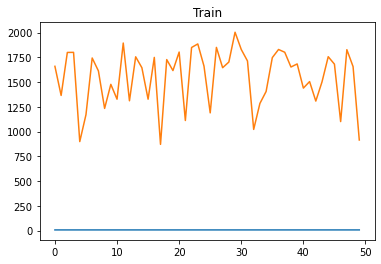

2/2 [==============================] - 3s 19ms/step


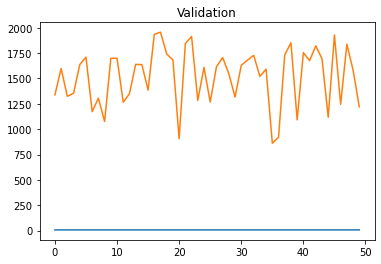

3/3 [==============================] - 0s 28ms/step


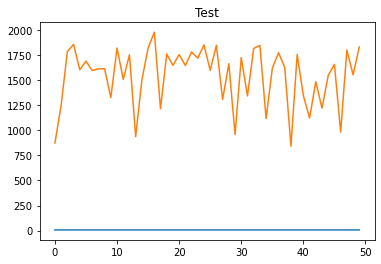

3/3 [==============================] - 0s 8ms/step


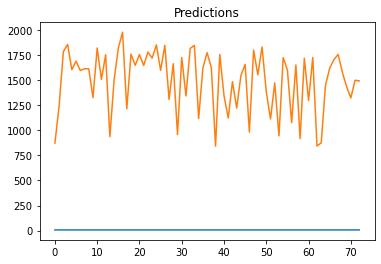

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

2314043.452198581

### RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2420728.5000 - root_mean_squared_error: 1555.8690

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 88s 9s/step - loss: 2420728.5000 - root_mean_squared_error: 1555.8690 - val_loss: 2407097.5000 - val_root_mean_squared_error: 1551.4823
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2419822.0000 - root_mean_squared_error: 1555.5778

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2419822.0000 - root_mean_squared_error: 1555.5778 - val_loss: 2406270.2500 - val_root_mean_squared_error: 1551.2157
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 2463487.2500 - root_mean_squared_error: 1569.5500

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 2419012.2500 - root_mean_squared_error: 1555.3174 - val_loss: 2405461.5000 - val_root_mean_squared_error: 1550.9551
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2407520.7500 - root_mean_squared_error: 1551.6188

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2418202.2500 - root_mean_squared_error: 1555.0570 - val_loss: 2404653.2500 - val_root_mean_squared_error: 1550.6945
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2392850.0000 - root_mean_squared_error: 1546.8839

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2417390.7500 - root_mean_squared_error: 1554.7960 - val_loss: 2403837.7500 - val_root_mean_squared_error: 1550.4315
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2408676.0000 - root_mean_squared_error: 1551.9910

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2416575.5000 - root_mean_squared_error: 1554.5338 - val_loss: 2403016.0000 - val_root_mean_squared_error: 1550.1664
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 2405626.0000 - root_mean_squared_error: 1551.0081

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 2415752.5000 - root_mean_squared_error: 1554.2692 - val_loss: 2402190.2500 - val_root_mean_squared_error: 1549.9000
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 2425724.2500 - root_mean_squared_error: 1557.4736

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2414926.2500 - root_mean_squared_error: 1554.0033 - val_loss: 2401342.2500 - val_root_mean_squared_error: 1549.6265
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2414060.5000 - root_mean_squared_error: 1553.7247

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2414060.5000 - root_mean_squared_error: 1553.7247 - val_loss: 2400514.0000 - val_root_mean_squared_error: 1549.3593
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2413280.5000 - root_mean_squared_error: 1553.4736

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2413280.5000 - root_mean_squared_error: 1553.4736 - val_loss: 2399739.5000 - val_root_mean_squared_error: 1549.1093
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2414428.7500 - root_mean_squared_error: 1553.8433

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2412503.5000 - root_mean_squared_error: 1553.2236 - val_loss: 2398963.7500 - val_root_mean_squared_error: 1548.8589
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2414217.7500 - root_mean_squared_error: 1553.7753

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2411746.0000 - root_mean_squared_error: 1552.9797 - val_loss: 2398220.7500 - val_root_mean_squared_error: 1548.6190
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2411005.5000 - root_mean_squared_error: 1552.7413

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2411005.5000 - root_mean_squared_error: 1552.7413 - val_loss: 2397500.7500 - val_root_mean_squared_error: 1548.3865
Epoch 14/30
6/8 [=====================>........] - ETA: 0s - loss: 2393054.5000 - root_mean_squared_error: 1546.9501

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2410296.2500 - root_mean_squared_error: 1552.5129 - val_loss: 2396801.5000 - val_root_mean_squared_error: 1548.1606
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2409607.7500 - root_mean_squared_error: 1552.2911

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2409607.7500 - root_mean_squared_error: 1552.2911 - val_loss: 2396129.0000 - val_root_mean_squared_error: 1547.9435
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2408951.5000 - root_mean_squared_error: 1552.0797

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2408951.5000 - root_mean_squared_error: 1552.0797 - val_loss: 2395485.2500 - val_root_mean_squared_error: 1547.7355
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2408318.2500 - root_mean_squared_error: 1551.8757

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 2408318.2500 - root_mean_squared_error: 1551.8757 - val_loss: 2394872.2500 - val_root_mean_squared_error: 1547.5375
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2407720.2500 - root_mean_squared_error: 1551.6830

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2407720.2500 - root_mean_squared_error: 1551.6830 - val_loss: 2394286.2500 - val_root_mean_squared_error: 1547.3481
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2412083.5000 - root_mean_squared_error: 1553.0884

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2407145.5000 - root_mean_squared_error: 1551.4978 - val_loss: 2393730.5000 - val_root_mean_squared_error: 1547.1686
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2401677.5000 - root_mean_squared_error: 1549.7346

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2406602.0000 - root_mean_squared_error: 1551.3226 - val_loss: 2393201.7500 - val_root_mean_squared_error: 1546.9977
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2397453.7500 - root_mean_squared_error: 1548.3713

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2406083.0000 - root_mean_squared_error: 1551.1554 - val_loss: 2392695.2500 - val_root_mean_squared_error: 1546.8340
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2424112.7500 - root_mean_squared_error: 1556.9563

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2405589.0000 - root_mean_squared_error: 1550.9961 - val_loss: 2392208.0000 - val_root_mean_squared_error: 1546.6764
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2405111.2500 - root_mean_squared_error: 1550.8422

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2405111.2500 - root_mean_squared_error: 1550.8422 - val_loss: 2391745.0000 - val_root_mean_squared_error: 1546.5267
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2404655.7500 - root_mean_squared_error: 1550.6952

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2404655.7500 - root_mean_squared_error: 1550.6952 - val_loss: 2391301.0000 - val_root_mean_squared_error: 1546.3832
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2394278.5000 - root_mean_squared_error: 1547.3456

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2404218.5000 - root_mean_squared_error: 1550.5542 - val_loss: 2390872.0000 - val_root_mean_squared_error: 1546.2445
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2403796.0000 - root_mean_squared_error: 1550.4180

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2403796.0000 - root_mean_squared_error: 1550.4180 - val_loss: 2390461.7500 - val_root_mean_squared_error: 1546.1118
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2403397.5000 - root_mean_squared_error: 1550.2894

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 2403397.5000 - root_mean_squared_error: 1550.2894 - val_loss: 2390074.0000 - val_root_mean_squared_error: 1545.9865
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 2399449.7500 - root_mean_squared_error: 1549.0157

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2403019.0000 - root_mean_squared_error: 1550.1674 - val_loss: 2389711.0000 - val_root_mean_squared_error: 1545.8690
Epoch 29/30
5/8 [=================>............] - ETA: 0s - loss: 2410565.2500 - root_mean_squared_error: 1552.5995

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2402664.7500 - root_mean_squared_error: 1550.0531 - val_loss: 2389368.2500 - val_root_mean_squared_error: 1545.7582
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2406505.2500 - root_mean_squared_error: 1551.2915

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 4s 15ms/step


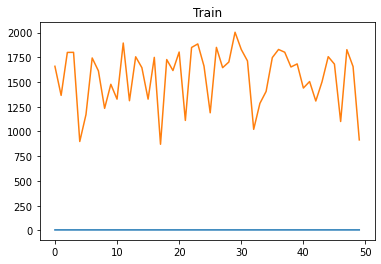

2/2 [==============================] - 2s 29ms/step


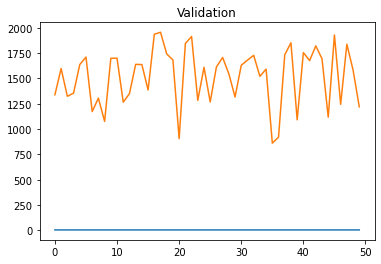

3/3 [==============================] - 1s 324ms/step


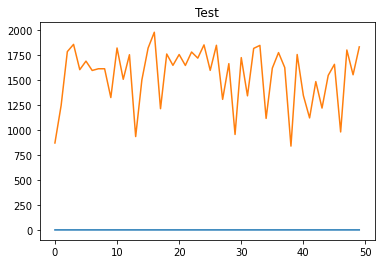

3/3 [==============================] - 0s 6ms/step


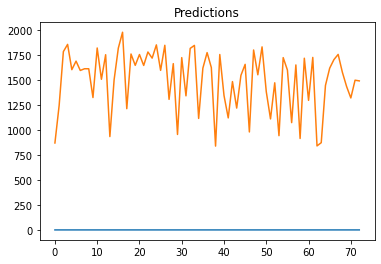

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

2319532.9830368827

### CNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2424650.2500 - root_mean_squared_error: 1557.1289

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 134s 10s/step - loss: 2418764.0000 - root_mean_squared_error: 1555.2375 - val_loss: 2404824.2500 - val_root_mean_squared_error: 1550.7496
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2417634.0000 - root_mean_squared_error: 1554.8743

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 2417634.0000 - root_mean_squared_error: 1554.8743 - val_loss: 2404269.5000 - val_root_mean_squared_error: 1550.5707
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2417049.2500 - root_mean_squared_error: 1554.6863

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 2417049.2500 - root_mean_squared_error: 1554.6863 - val_loss: 2403532.2500 - val_root_mean_squared_error: 1550.3330
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2415967.7500 - root_mean_squared_error: 1554.3384

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 2415967.7500 - root_mean_squared_error: 1554.3384 - val_loss: 2402026.5000 - val_root_mean_squared_error: 1549.8473
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2414604.5000 - root_mean_squared_error: 1553.8998

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 2414604.5000 - root_mean_squared_error: 1553.8998 - val_loss: 2400812.7500 - val_root_mean_squared_error: 1549.4557
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 2421562.7500 - root_mean_squared_error: 1556.1371

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 2413527.0000 - root_mean_squared_error: 1553.5530 - val_loss: 2399738.0000 - val_root_mean_squared_error: 1549.1088
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2412308.0000 - root_mean_squared_error: 1553.1606

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 78s 11s/step - loss: 2412308.0000 - root_mean_squared_error: 1553.1606 - val_loss: 2398551.7500 - val_root_mean_squared_error: 1548.7258
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2411451.7500 - root_mean_squared_error: 1552.8850

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 2411451.7500 - root_mean_squared_error: 1552.8850 - val_loss: 2398003.2500 - val_root_mean_squared_error: 1548.5487
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2410885.0000 - root_mean_squared_error: 1552.7025

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2410885.0000 - root_mean_squared_error: 1552.7025 - val_loss: 2397471.0000 - val_root_mean_squared_error: 1548.3770
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2410353.2500 - root_mean_squared_error: 1552.5312

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 2410353.2500 - root_mean_squared_error: 1552.5312 - val_loss: 2396940.2500 - val_root_mean_squared_error: 1548.2054
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2409830.7500 - root_mean_squared_error: 1552.3629

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 2409830.7500 - root_mean_squared_error: 1552.3629 - val_loss: 2396411.2500 - val_root_mean_squared_error: 1548.0347
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2415067.5000 - root_mean_squared_error: 1554.0487

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 2409308.2500 - root_mean_squared_error: 1552.1947 - val_loss: 2395886.2500 - val_root_mean_squared_error: 1547.8651
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2408786.0000 - root_mean_squared_error: 1552.0264

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 2408786.0000 - root_mean_squared_error: 1552.0264 - val_loss: 2395365.5000 - val_root_mean_squared_error: 1547.6968
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2408266.7500 - root_mean_squared_error: 1551.8591

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 2408266.7500 - root_mean_squared_error: 1551.8591 - val_loss: 2394848.0000 - val_root_mean_squared_error: 1547.5297
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2407753.7500 - root_mean_squared_error: 1551.6938

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2407753.7500 - root_mean_squared_error: 1551.6938 - val_loss: 2394329.5000 - val_root_mean_squared_error: 1547.3621
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2407237.7500 - root_mean_squared_error: 1551.5276

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 2407237.7500 - root_mean_squared_error: 1551.5276 - val_loss: 2393816.0000 - val_root_mean_squared_error: 1547.1962
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2406728.0000 - root_mean_squared_error: 1551.3633

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 2406728.0000 - root_mean_squared_error: 1551.3633 - val_loss: 2393309.2500 - val_root_mean_squared_error: 1547.0323
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2414687.5000 - root_mean_squared_error: 1553.9265

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 2406223.0000 - root_mean_squared_error: 1551.2006 - val_loss: 2392810.5000 - val_root_mean_squared_error: 1546.8711
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2405728.5000 - root_mean_squared_error: 1551.0411

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 2405728.5000 - root_mean_squared_error: 1551.0411 - val_loss: 2392317.7500 - val_root_mean_squared_error: 1546.7119
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2405235.7500 - root_mean_squared_error: 1550.8822

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 67s 9s/step - loss: 2405235.7500 - root_mean_squared_error: 1550.8822 - val_loss: 2391835.5000 - val_root_mean_squared_error: 1546.5560
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2404759.0000 - root_mean_squared_error: 1550.7285

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 2404759.0000 - root_mean_squared_error: 1550.7285 - val_loss: 2391365.2500 - val_root_mean_squared_error: 1546.4039
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2404291.0000 - root_mean_squared_error: 1550.5776

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2404291.0000 - root_mean_squared_error: 1550.5776 - val_loss: 2390915.7500 - val_root_mean_squared_error: 1546.2587
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2403014.7500 - root_mean_squared_error: 1550.1660

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 2403846.0000 - root_mean_squared_error: 1550.4341 - val_loss: 2390482.7500 - val_root_mean_squared_error: 1546.1187
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2403419.5000 - root_mean_squared_error: 1550.2966

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 2403419.5000 - root_mean_squared_error: 1550.2966 - val_loss: 2390067.7500 - val_root_mean_squared_error: 1545.9844
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2403011.0000 - root_mean_squared_error: 1550.1648

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 2403011.0000 - root_mean_squared_error: 1550.1648 - val_loss: 2389672.5000 - val_root_mean_squared_error: 1545.8566
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2402620.0000 - root_mean_squared_error: 1550.0387

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 2402620.0000 - root_mean_squared_error: 1550.0387 - val_loss: 2389299.7500 - val_root_mean_squared_error: 1545.7360
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2402257.0000 - root_mean_squared_error: 1549.9216

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 75s 10s/step - loss: 2402257.0000 - root_mean_squared_error: 1549.9216 - val_loss: 2388949.0000 - val_root_mean_squared_error: 1545.6226
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2401912.7500 - root_mean_squared_error: 1549.8105

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 2401912.7500 - root_mean_squared_error: 1549.8105 - val_loss: 2388619.5000 - val_root_mean_squared_error: 1545.5160
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2401592.0000 - root_mean_squared_error: 1549.7070

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 2401592.0000 - root_mean_squared_error: 1549.7070 - val_loss: 2388309.2500 - val_root_mean_squared_error: 1545.4155
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2401289.5000 - root_mean_squared_error: 1549.6095

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 5s 34ms/step


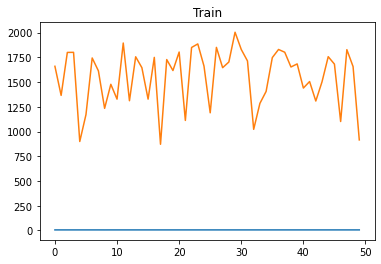

2/2 [==============================] - 4s 26ms/step


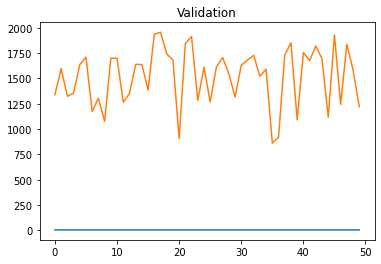

3/3 [==============================] - 0s 16ms/step


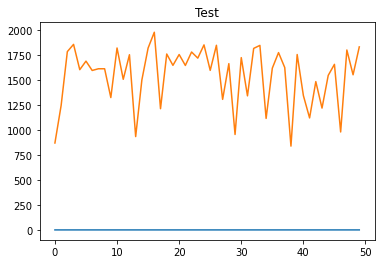

3/3 [==============================] - 0s 13ms/step


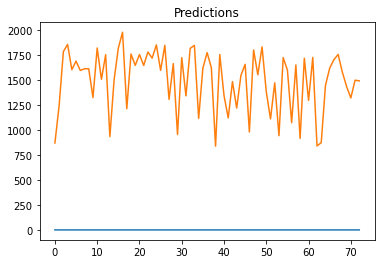

In [35]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [36]:
hybrid_cnn_gru_mse

2318523.953540436

### CNN RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2409282.0000 - root_mean_squared_error: 1552.1862

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 85s 9s/step - loss: 2418371.0000 - root_mean_squared_error: 1555.1112 - val_loss: 2404861.2500 - val_root_mean_squared_error: 1550.7615
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2417595.7500 - root_mean_squared_error: 1554.8619

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2417595.7500 - root_mean_squared_error: 1554.8619 - val_loss: 2404086.5000 - val_root_mean_squared_error: 1550.5117
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2416850.2500 - root_mean_squared_error: 1554.6222

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 2416850.2500 - root_mean_squared_error: 1554.6222 - val_loss: 2403269.0000 - val_root_mean_squared_error: 1550.2480
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2416024.0000 - root_mean_squared_error: 1554.3564

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 2416024.0000 - root_mean_squared_error: 1554.3564 - val_loss: 2402491.0000 - val_root_mean_squared_error: 1549.9971
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2415237.5000 - root_mean_squared_error: 1554.1034

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2415237.5000 - root_mean_squared_error: 1554.1034 - val_loss: 2401693.7500 - val_root_mean_squared_error: 1549.7399
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2414442.5000 - root_mean_squared_error: 1553.8477

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2414442.5000 - root_mean_squared_error: 1553.8477 - val_loss: 2400894.2500 - val_root_mean_squared_error: 1549.4818
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2413644.7500 - root_mean_squared_error: 1553.5909

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 2413644.7500 - root_mean_squared_error: 1553.5909 - val_loss: 2400095.2500 - val_root_mean_squared_error: 1549.2241
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2412851.0000 - root_mean_squared_error: 1553.3354

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2412851.0000 - root_mean_squared_error: 1553.3354 - val_loss: 2399304.5000 - val_root_mean_squared_error: 1548.9689
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2406285.2500 - root_mean_squared_error: 1551.2206

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2412058.2500 - root_mean_squared_error: 1553.0802 - val_loss: 2398515.2500 - val_root_mean_squared_error: 1548.7141
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2411274.0000 - root_mean_squared_error: 1552.8278

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2411274.0000 - root_mean_squared_error: 1552.8278 - val_loss: 2397733.0000 - val_root_mean_squared_error: 1548.4615
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2410496.5000 - root_mean_squared_error: 1552.5774

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2410496.5000 - root_mean_squared_error: 1552.5774 - val_loss: 2396961.7500 - val_root_mean_squared_error: 1548.2124
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2409734.7500 - root_mean_squared_error: 1552.3320

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 6s/step - loss: 2409734.7500 - root_mean_squared_error: 1552.3320 - val_loss: 2396205.2500 - val_root_mean_squared_error: 1547.9681
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2408983.5000 - root_mean_squared_error: 1552.0901

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 40s 5s/step - loss: 2408983.5000 - root_mean_squared_error: 1552.0901 - val_loss: 2395466.5000 - val_root_mean_squared_error: 1547.7295
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2408252.5000 - root_mean_squared_error: 1551.8545

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2408252.5000 - root_mean_squared_error: 1551.8545 - val_loss: 2394740.5000 - val_root_mean_squared_error: 1547.4949
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2407536.5000 - root_mean_squared_error: 1551.6238

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2407536.5000 - root_mean_squared_error: 1551.6238 - val_loss: 2394027.5000 - val_root_mean_squared_error: 1547.2645
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2406830.5000 - root_mean_squared_error: 1551.3964

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 5s/step - loss: 2406830.5000 - root_mean_squared_error: 1551.3964 - val_loss: 2393331.0000 - val_root_mean_squared_error: 1547.0394
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2406141.0000 - root_mean_squared_error: 1551.1741

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2406141.0000 - root_mean_squared_error: 1551.1741 - val_loss: 2392645.0000 - val_root_mean_squared_error: 1546.8177
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2405462.5000 - root_mean_squared_error: 1550.9553

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2405462.5000 - root_mean_squared_error: 1550.9553 - val_loss: 2391978.0000 - val_root_mean_squared_error: 1546.6021
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2404802.0000 - root_mean_squared_error: 1550.7424

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 33s 4s/step - loss: 2404802.0000 - root_mean_squared_error: 1550.7424 - val_loss: 2391323.5000 - val_root_mean_squared_error: 1546.3905
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2404157.2500 - root_mean_squared_error: 1550.5345

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2404157.2500 - root_mean_squared_error: 1550.5345 - val_loss: 2390690.7500 - val_root_mean_squared_error: 1546.1859
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2403538.7500 - root_mean_squared_error: 1550.3351

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2403538.7500 - root_mean_squared_error: 1550.3351 - val_loss: 2390076.2500 - val_root_mean_squared_error: 1545.9872
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2398215.5000 - root_mean_squared_error: 1548.6173

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2402933.7500 - root_mean_squared_error: 1550.1399 - val_loss: 2389480.2500 - val_root_mean_squared_error: 1545.7944
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2402340.0000 - root_mean_squared_error: 1549.9484

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2402340.0000 - root_mean_squared_error: 1549.9484 - val_loss: 2388902.0000 - val_root_mean_squared_error: 1545.6073
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2413408.0000 - root_mean_squared_error: 1553.5148

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2401768.5000 - root_mean_squared_error: 1549.7640 - val_loss: 2388336.5000 - val_root_mean_squared_error: 1545.4243
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2401215.2500 - root_mean_squared_error: 1549.5854

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 2401215.2500 - root_mean_squared_error: 1549.5854 - val_loss: 2387784.2500 - val_root_mean_squared_error: 1545.2457
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2400668.5000 - root_mean_squared_error: 1549.4091

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2400668.5000 - root_mean_squared_error: 1549.4091 - val_loss: 2387244.2500 - val_root_mean_squared_error: 1545.0709
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2400130.2500 - root_mean_squared_error: 1549.2354

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 60s 9s/step - loss: 2400130.2500 - root_mean_squared_error: 1549.2354 - val_loss: 2386715.7500 - val_root_mean_squared_error: 1544.8999
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2399604.7500 - root_mean_squared_error: 1549.0658

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 2399604.7500 - root_mean_squared_error: 1549.0658 - val_loss: 2386190.2500 - val_root_mean_squared_error: 1544.7299
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2399083.5000 - root_mean_squared_error: 1548.8975

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2399083.5000 - root_mean_squared_error: 1548.8975 - val_loss: 2385669.7500 - val_root_mean_squared_error: 1544.5614
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2402555.7500 - root_mean_squared_error: 1550.0179

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 5s 41ms/step


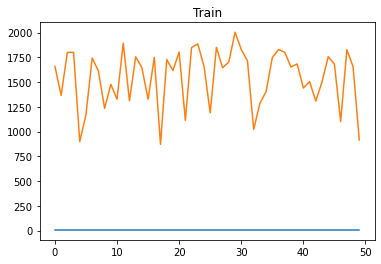

2/2 [==============================] - 6s 42ms/step


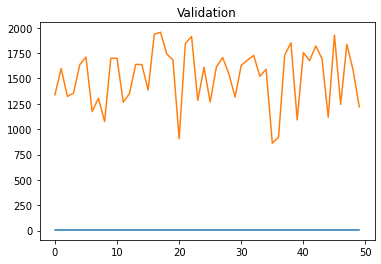

3/3 [==============================] - 1s 54ms/step


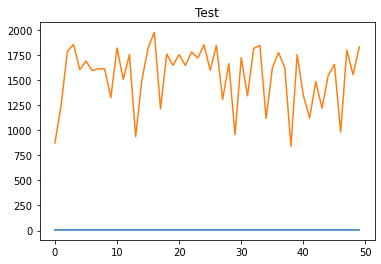

3/3 [==============================] - 0s 8ms/step


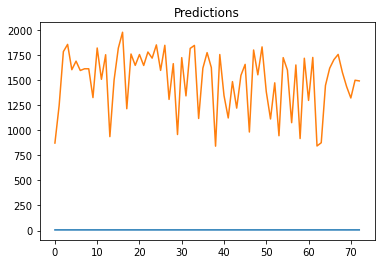

In [37]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_cnn_rnn_gru_mse

2315713.2398927193

### LSTM RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 2417704.7500 - root_mean_squared_error: 1554.8970

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 130s 15s/step - loss: 2417441.0000 - root_mean_squared_error: 1554.8123 - val_loss: 2403515.7500 - val_root_mean_squared_error: 1550.3276
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2416003.0000 - root_mean_squared_error: 1554.3497

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 2416003.0000 - root_mean_squared_error: 1554.3497 - val_loss: 2402044.7500 - val_root_mean_squared_error: 1549.8531
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2414489.5000 - root_mean_squared_error: 1553.8628

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 2414489.5000 - root_mean_squared_error: 1553.8628 - val_loss: 2400451.7500 - val_root_mean_squared_error: 1549.3391
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2412853.0000 - root_mean_squared_error: 1553.3361

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 2412853.0000 - root_mean_squared_error: 1553.3361 - val_loss: 2398683.5000 - val_root_mean_squared_error: 1548.7684
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2411013.0000 - root_mean_squared_error: 1552.7437

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 2411013.0000 - root_mean_squared_error: 1552.7437 - val_loss: 2396734.0000 - val_root_mean_squared_error: 1548.1389
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2408982.7500 - root_mean_squared_error: 1552.0898

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 2408982.7500 - root_mean_squared_error: 1552.0898 - val_loss: 2394584.2500 - val_root_mean_squared_error: 1547.4445
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2406772.0000 - root_mean_squared_error: 1551.3774

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 116s 17s/step - loss: 2406772.0000 - root_mean_squared_error: 1551.3774 - val_loss: 2392277.5000 - val_root_mean_squared_error: 1546.6989
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2404438.2500 - root_mean_squared_error: 1550.6251

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 102s 15s/step - loss: 2404438.2500 - root_mean_squared_error: 1550.6251 - val_loss: 2389895.2500 - val_root_mean_squared_error: 1545.9286
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2399549.2500 - root_mean_squared_error: 1549.0479

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 101s 14s/step - loss: 2402040.5000 - root_mean_squared_error: 1549.8518 - val_loss: 2387525.5000 - val_root_mean_squared_error: 1545.1620
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 2412218.2500 - root_mean_squared_error: 1553.1317

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 2399724.2500 - root_mean_squared_error: 1549.1044 - val_loss: 2385251.7500 - val_root_mean_squared_error: 1544.4260
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2396549.7500 - root_mean_squared_error: 1548.0793

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 2397522.7500 - root_mean_squared_error: 1548.3936 - val_loss: 2383171.7500 - val_root_mean_squared_error: 1543.7524
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2395537.7500 - root_mean_squared_error: 1547.7524

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 2395537.7500 - root_mean_squared_error: 1547.7524 - val_loss: 2381313.0000 - val_root_mean_squared_error: 1543.1504
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 2397288.5000 - root_mean_squared_error: 1548.3180

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 87s 12s/step - loss: 2393772.2500 - root_mean_squared_error: 1547.1820 - val_loss: 2379705.5000 - val_root_mean_squared_error: 1542.6294
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2392269.5000 - root_mean_squared_error: 1546.6963

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 98s 14s/step - loss: 2392269.5000 - root_mean_squared_error: 1546.6963 - val_loss: 2378339.7500 - val_root_mean_squared_error: 1542.1866
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2390995.0000 - root_mean_squared_error: 1546.2843

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 100s 14s/step - loss: 2390995.0000 - root_mean_squared_error: 1546.2843 - val_loss: 2377199.7500 - val_root_mean_squared_error: 1541.8170
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2382729.5000 - root_mean_squared_error: 1543.6093

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 88s 13s/step - loss: 2389936.2500 - root_mean_squared_error: 1545.9419 - val_loss: 2376259.5000 - val_root_mean_squared_error: 1541.5121
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2389064.7500 - root_mean_squared_error: 1545.6599

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 91s 13s/step - loss: 2389064.7500 - root_mean_squared_error: 1545.6599 - val_loss: 2375480.5000 - val_root_mean_squared_error: 1541.2594
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2388341.7500 - root_mean_squared_error: 1545.4260

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 2388341.7500 - root_mean_squared_error: 1545.4260 - val_loss: 2374835.0000 - val_root_mean_squared_error: 1541.0500
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2377568.5000 - root_mean_squared_error: 1541.9366

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 100s 14s/step - loss: 2387739.2500 - root_mean_squared_error: 1545.2311 - val_loss: 2374295.0000 - val_root_mean_squared_error: 1540.8748
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2387232.7500 - root_mean_squared_error: 1545.0673

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 97s 14s/step - loss: 2387232.7500 - root_mean_squared_error: 1545.0673 - val_loss: 2373831.7500 - val_root_mean_squared_error: 1540.7244
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2386796.5000 - root_mean_squared_error: 1544.9260

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 2386796.5000 - root_mean_squared_error: 1544.9260 - val_loss: 2373431.0000 - val_root_mean_squared_error: 1540.5944
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2386414.7500 - root_mean_squared_error: 1544.8025

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 101s 14s/step - loss: 2386414.7500 - root_mean_squared_error: 1544.8025 - val_loss: 2373074.7500 - val_root_mean_squared_error: 1540.4788
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2389457.5000 - root_mean_squared_error: 1545.7870

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 2386073.2500 - root_mean_squared_error: 1544.6920 - val_loss: 2372752.2500 - val_root_mean_squared_error: 1540.3740
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2368467.7500 - root_mean_squared_error: 1538.9827

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 2385763.2500 - root_mean_squared_error: 1544.5916 - val_loss: 2372455.5000 - val_root_mean_squared_error: 1540.2777
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2385475.2500 - root_mean_squared_error: 1544.4984

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 102s 14s/step - loss: 2385475.2500 - root_mean_squared_error: 1544.4984 - val_loss: 2372177.7500 - val_root_mean_squared_error: 1540.1876
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2385203.0000 - root_mean_squared_error: 1544.4103

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 2385203.0000 - root_mean_squared_error: 1544.4103 - val_loss: 2371918.0000 - val_root_mean_squared_error: 1540.1033
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2384948.0000 - root_mean_squared_error: 1544.3276

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 2384948.0000 - root_mean_squared_error: 1544.3276 - val_loss: 2371670.0000 - val_root_mean_squared_error: 1540.0227
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2384706.0000 - root_mean_squared_error: 1544.2494

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 89s 13s/step - loss: 2384706.0000 - root_mean_squared_error: 1544.2494 - val_loss: 2371429.0000 - val_root_mean_squared_error: 1539.9445
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2384468.5000 - root_mean_squared_error: 1544.1725

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 109s 16s/step - loss: 2384468.5000 - root_mean_squared_error: 1544.1725 - val_loss: 2371198.2500 - val_root_mean_squared_error: 1539.8695
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2377254.2500 - root_mean_squared_error: 1541.8347

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 15s 18ms/step


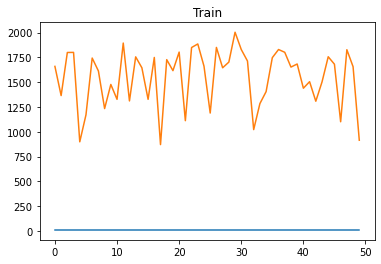

2/2 [==============================] - 6s 13ms/step


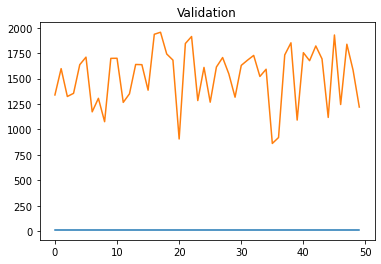

3/3 [==============================] - 2s 633ms/step


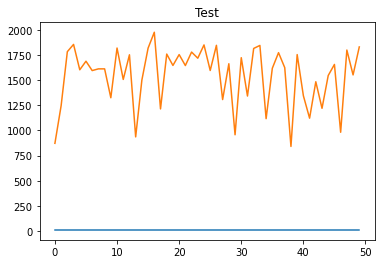

3/3 [==============================] - 0s 19ms/step


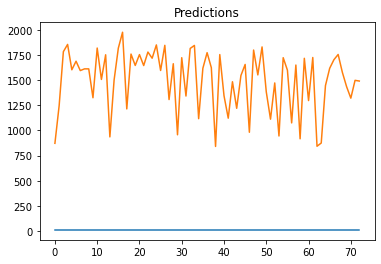

In [39]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_lstm_rnn_gru_mse

2301794.360180873

## Moving Average

### CNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2420624.7500 - root_mean_squared_error: 1555.8357

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 160s 15s/step - loss: 2420624.7500 - root_mean_squared_error: 1555.8357 - val_loss: 2406312.0000 - val_root_mean_squared_error: 1551.2292
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2426344.2500 - root_mean_squared_error: 1557.6727

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 88s 12s/step - loss: 2420150.5000 - root_mean_squared_error: 1555.6833 - val_loss: 2405805.5000 - val_root_mean_squared_error: 1551.0659
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2419642.5000 - root_mean_squared_error: 1555.5200

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 2419642.5000 - root_mean_squared_error: 1555.5200 - val_loss: 2405295.0000 - val_root_mean_squared_error: 1550.9014
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2419032.5000 - root_mean_squared_error: 1555.3240

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 92s 13s/step - loss: 2419032.5000 - root_mean_squared_error: 1555.3240 - val_loss: 2404595.5000 - val_root_mean_squared_error: 1550.6758
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2418399.2500 - root_mean_squared_error: 1555.1204

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 88s 12s/step - loss: 2418399.2500 - root_mean_squared_error: 1555.1204 - val_loss: 2404032.7500 - val_root_mean_squared_error: 1550.4944
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2417810.7500 - root_mean_squared_error: 1554.9312

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 14s/step - loss: 2417810.7500 - root_mean_squared_error: 1554.9312 - val_loss: 2403391.0000 - val_root_mean_squared_error: 1550.2874
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2417017.5000 - root_mean_squared_error: 1554.6760

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 89s 13s/step - loss: 2417017.5000 - root_mean_squared_error: 1554.6760 - val_loss: 2402452.7500 - val_root_mean_squared_error: 1549.9846
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2416278.0000 - root_mean_squared_error: 1554.4381

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 2416278.0000 - root_mean_squared_error: 1554.4381 - val_loss: 2401938.2500 - val_root_mean_squared_error: 1549.8187
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2415767.5000 - root_mean_squared_error: 1554.2739

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 2415767.5000 - root_mean_squared_error: 1554.2739 - val_loss: 2401435.7500 - val_root_mean_squared_error: 1549.6566
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2415253.7500 - root_mean_squared_error: 1554.1086

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 76s 11s/step - loss: 2415253.7500 - root_mean_squared_error: 1554.1086 - val_loss: 2400898.2500 - val_root_mean_squared_error: 1549.4833
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2414650.5000 - root_mean_squared_error: 1553.9146

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 114s 16s/step - loss: 2414650.5000 - root_mean_squared_error: 1553.9146 - val_loss: 2400260.7500 - val_root_mean_squared_error: 1549.2775
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 2411873.2500 - root_mean_squared_error: 1553.0206

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 68s 10s/step - loss: 2414079.7500 - root_mean_squared_error: 1553.7310 - val_loss: 2399752.2500 - val_root_mean_squared_error: 1549.1134
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2413577.0000 - root_mean_squared_error: 1553.5691

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 101s 13s/step - loss: 2413577.0000 - root_mean_squared_error: 1553.5691 - val_loss: 2399250.0000 - val_root_mean_squared_error: 1548.9513
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2413078.7500 - root_mean_squared_error: 1553.4087

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 76s 11s/step - loss: 2413078.7500 - root_mean_squared_error: 1553.4087 - val_loss: 2398751.0000 - val_root_mean_squared_error: 1548.7902
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2412579.0000 - root_mean_squared_error: 1553.2479

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 103s 14s/step - loss: 2412579.0000 - root_mean_squared_error: 1553.2479 - val_loss: 2398231.7500 - val_root_mean_squared_error: 1548.6226
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2412058.2500 - root_mean_squared_error: 1553.0802

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 71s 10s/step - loss: 2412058.2500 - root_mean_squared_error: 1553.0802 - val_loss: 2397735.2500 - val_root_mean_squared_error: 1548.4623
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2411567.0000 - root_mean_squared_error: 1552.9221

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 2411567.0000 - root_mean_squared_error: 1552.9221 - val_loss: 2397245.0000 - val_root_mean_squared_error: 1548.3040
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2411084.0000 - root_mean_squared_error: 1552.7666

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 77s 11s/step - loss: 2411084.0000 - root_mean_squared_error: 1552.7666 - val_loss: 2396759.0000 - val_root_mean_squared_error: 1548.1470
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2410601.7500 - root_mean_squared_error: 1552.6113

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 99s 14s/step - loss: 2410601.7500 - root_mean_squared_error: 1552.6113 - val_loss: 2396285.0000 - val_root_mean_squared_error: 1547.9939
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2410129.5000 - root_mean_squared_error: 1552.4592

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 2410129.5000 - root_mean_squared_error: 1552.4592 - val_loss: 2395810.2500 - val_root_mean_squared_error: 1547.8405
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2421239.7500 - root_mean_squared_error: 1556.0333

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 2409658.2500 - root_mean_squared_error: 1552.3074 - val_loss: 2395346.2500 - val_root_mean_squared_error: 1547.6907
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2409197.2500 - root_mean_squared_error: 1552.1589

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 93s 13s/step - loss: 2409197.2500 - root_mean_squared_error: 1552.1589 - val_loss: 2394885.0000 - val_root_mean_squared_error: 1547.5416
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2408734.7500 - root_mean_squared_error: 1552.0099

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 2408734.7500 - root_mean_squared_error: 1552.0099 - val_loss: 2394419.7500 - val_root_mean_squared_error: 1547.3912
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2408271.2500 - root_mean_squared_error: 1551.8606

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 2408271.2500 - root_mean_squared_error: 1551.8606 - val_loss: 2393951.5000 - val_root_mean_squared_error: 1547.2400
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2407803.5000 - root_mean_squared_error: 1551.7098

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 11s/step - loss: 2407803.5000 - root_mean_squared_error: 1551.7098 - val_loss: 2393484.7500 - val_root_mean_squared_error: 1547.0891
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2407338.7500 - root_mean_squared_error: 1551.5601

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 66s 9s/step - loss: 2407338.7500 - root_mean_squared_error: 1551.5601 - val_loss: 2393022.5000 - val_root_mean_squared_error: 1546.9397
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2406882.0000 - root_mean_squared_error: 1551.4130

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 94s 13s/step - loss: 2406882.0000 - root_mean_squared_error: 1551.4130 - val_loss: 2392573.0000 - val_root_mean_squared_error: 1546.7944
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2406441.2500 - root_mean_squared_error: 1551.2709

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 2406441.2500 - root_mean_squared_error: 1551.2709 - val_loss: 2392138.0000 - val_root_mean_squared_error: 1546.6538
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2406000.2500 - root_mean_squared_error: 1551.1287

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 2406000.2500 - root_mean_squared_error: 1551.1287 - val_loss: 2391693.2500 - val_root_mean_squared_error: 1546.5100
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2405568.7500 - root_mean_squared_error: 1550.9896

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 6s 53ms/step


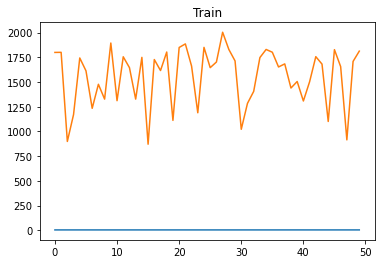

2/2 [==============================] - 5s 72ms/step


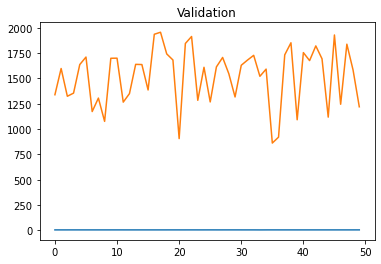

3/3 [==============================] - 1s 298ms/step


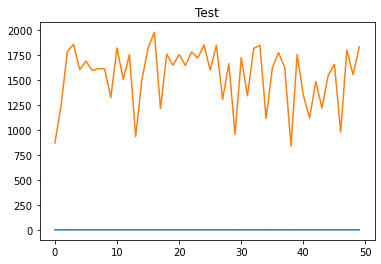

3/3 [==============================] - 0s 29ms/step


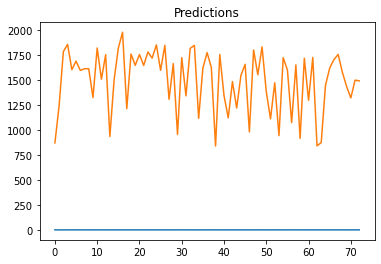

In [41]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [42]:
mavg_hybrid_cnn_lstm_mse

2321737.422590249

### RNN LSTM

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 2436069.7500 - root_mean_squared_error: 1560.7914

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 86s 9s/step - loss: 2420765.2500 - root_mean_squared_error: 1555.8809 - val_loss: 2406405.0000 - val_root_mean_squared_error: 1551.2592
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2420212.5000 - root_mean_squared_error: 1555.7032

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 63s 9s/step - loss: 2420212.5000 - root_mean_squared_error: 1555.7032 - val_loss: 2405852.2500 - val_root_mean_squared_error: 1551.0811
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 2406438.7500 - root_mean_squared_error: 1551.2700

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 2419656.7500 - root_mean_squared_error: 1555.5245 - val_loss: 2405295.7500 - val_root_mean_squared_error: 1550.9016
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2419103.7500 - root_mean_squared_error: 1555.3468

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 2419103.7500 - root_mean_squared_error: 1555.3468 - val_loss: 2404736.2500 - val_root_mean_squared_error: 1550.7212
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2418544.2500 - root_mean_squared_error: 1555.1670

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2418544.2500 - root_mean_squared_error: 1555.1670 - val_loss: 2404176.5000 - val_root_mean_squared_error: 1550.5408
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2417983.2500 - root_mean_squared_error: 1554.9866

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2417983.2500 - root_mean_squared_error: 1554.9866 - val_loss: 2403611.7500 - val_root_mean_squared_error: 1550.3586
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2417418.5000 - root_mean_squared_error: 1554.8049

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 61s 9s/step - loss: 2417418.5000 - root_mean_squared_error: 1554.8049 - val_loss: 2403043.7500 - val_root_mean_squared_error: 1550.1754
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2416850.7500 - root_mean_squared_error: 1554.6224

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2416850.7500 - root_mean_squared_error: 1554.6224 - val_loss: 2402468.7500 - val_root_mean_squared_error: 1549.9899
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2416276.0000 - root_mean_squared_error: 1554.4375

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2416276.0000 - root_mean_squared_error: 1554.4375 - val_loss: 2401889.0000 - val_root_mean_squared_error: 1549.8029
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2415696.0000 - root_mean_squared_error: 1554.2510

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 66s 9s/step - loss: 2415696.0000 - root_mean_squared_error: 1554.2510 - val_loss: 2401303.2500 - val_root_mean_squared_error: 1549.6139
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2415108.7500 - root_mean_squared_error: 1554.0620

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 2415108.7500 - root_mean_squared_error: 1554.0620 - val_loss: 2400710.0000 - val_root_mean_squared_error: 1549.4225
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2414515.5000 - root_mean_squared_error: 1553.8711

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 2414515.5000 - root_mean_squared_error: 1553.8711 - val_loss: 2400107.7500 - val_root_mean_squared_error: 1549.2281
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 2387368.7500 - root_mean_squared_error: 1545.1112

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 60s 8s/step - loss: 2413905.2500 - root_mean_squared_error: 1553.6748 - val_loss: 2399496.7500 - val_root_mean_squared_error: 1549.0309
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2413291.2500 - root_mean_squared_error: 1553.4772

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 2413291.2500 - root_mean_squared_error: 1553.4772 - val_loss: 2398877.2500 - val_root_mean_squared_error: 1548.8311
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2412671.0000 - root_mean_squared_error: 1553.2775

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 57s 8s/step - loss: 2412671.0000 - root_mean_squared_error: 1553.2775 - val_loss: 2398256.0000 - val_root_mean_squared_error: 1548.6302
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 2421377.0000 - root_mean_squared_error: 1556.0774

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2412050.0000 - root_mean_squared_error: 1553.0776 - val_loss: 2397624.2500 - val_root_mean_squared_error: 1548.4264
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2411420.2500 - root_mean_squared_error: 1552.8749

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 61s 9s/step - loss: 2411420.2500 - root_mean_squared_error: 1552.8749 - val_loss: 2396991.7500 - val_root_mean_squared_error: 1548.2222
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 2384933.7500 - root_mean_squared_error: 1544.3231

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2410786.0000 - root_mean_squared_error: 1552.6707 - val_loss: 2396361.0000 - val_root_mean_squared_error: 1548.0184
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 2357482.7500 - root_mean_squared_error: 1535.4097

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 61s 9s/step - loss: 2410158.0000 - root_mean_squared_error: 1552.4684 - val_loss: 2395734.5000 - val_root_mean_squared_error: 1547.8160
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 2432231.7500 - root_mean_squared_error: 1559.5614

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 2409541.0000 - root_mean_squared_error: 1552.2697 - val_loss: 2395120.2500 - val_root_mean_squared_error: 1547.6176
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 2406994.2500 - root_mean_squared_error: 1551.4491

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 2408933.2500 - root_mean_squared_error: 1552.0739 - val_loss: 2394524.2500 - val_root_mean_squared_error: 1547.4250
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2408345.5000 - root_mean_squared_error: 1551.8845

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 2408345.5000 - root_mean_squared_error: 1551.8845 - val_loss: 2393945.0000 - val_root_mean_squared_error: 1547.2380
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 2367096.7500 - root_mean_squared_error: 1538.5372

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2407771.5000 - root_mean_squared_error: 1551.6996 - val_loss: 2393385.0000 - val_root_mean_squared_error: 1547.0569
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 2405946.2500 - root_mean_squared_error: 1551.1113

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2407222.2500 - root_mean_squared_error: 1551.5226 - val_loss: 2392835.2500 - val_root_mean_squared_error: 1546.8792
Epoch 25/30
5/8 [=================>............] - ETA: 0s - loss: 2437043.5000 - root_mean_squared_error: 1561.1033

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 57s 8s/step - loss: 2406679.2500 - root_mean_squared_error: 1551.3475 - val_loss: 2392301.7500 - val_root_mean_squared_error: 1546.7067
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2393212.2500 - root_mean_squared_error: 1547.0011

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 2406150.2500 - root_mean_squared_error: 1551.1770 - val_loss: 2391780.2500 - val_root_mean_squared_error: 1546.5382
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2404756.2500 - root_mean_squared_error: 1550.7277

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2405633.7500 - root_mean_squared_error: 1551.0105 - val_loss: 2391264.5000 - val_root_mean_squared_error: 1546.3713
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2405123.2500 - root_mean_squared_error: 1550.8459

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 65s 9s/step - loss: 2405123.2500 - root_mean_squared_error: 1550.8459 - val_loss: 2390755.7500 - val_root_mean_squared_error: 1546.2069
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 2362974.7500 - root_mean_squared_error: 1537.1970

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2404613.0000 - root_mean_squared_error: 1550.6815 - val_loss: 2390250.5000 - val_root_mean_squared_error: 1546.0435
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 2358367.7500 - root_mean_squared_error: 1535.6978

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 3s 13ms/step


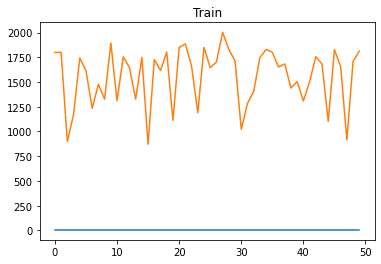

2/2 [==============================] - 2s 20ms/step


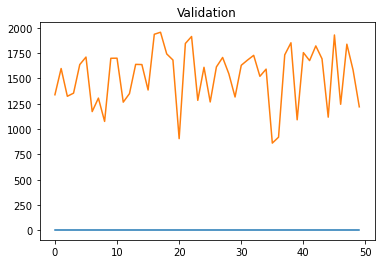

3/3 [==============================] - 0s 66ms/step


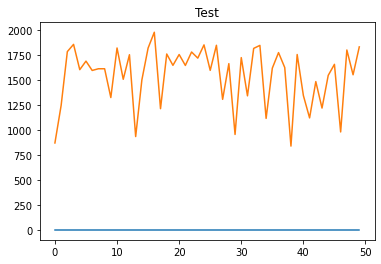

3/3 [==============================] - 0s 8ms/step


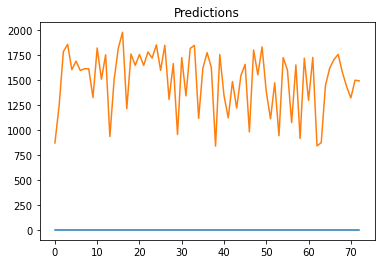

In [43]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [44]:
mavg_hybrid_rnn_lstm_mse

2320218.0789392698

### RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2418184.7500 - root_mean_squared_error: 1555.0514

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 82s 9s/step - loss: 2418184.7500 - root_mean_squared_error: 1555.0514 - val_loss: 2403599.7500 - val_root_mean_squared_error: 1550.3547
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 2340236.5000 - root_mean_squared_error: 1529.7832

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2417269.5000 - root_mean_squared_error: 1554.7571 - val_loss: 2402682.0000 - val_root_mean_squared_error: 1550.0587
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2416357.5000 - root_mean_squared_error: 1554.4637

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2416357.5000 - root_mean_squared_error: 1554.4637 - val_loss: 2401742.5000 - val_root_mean_squared_error: 1549.7556
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 2402642.2500 - root_mean_squared_error: 1550.0459

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2415375.0000 - root_mean_squared_error: 1554.1477 - val_loss: 2400655.7500 - val_root_mean_squared_error: 1549.4049
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2435569.2500 - root_mean_squared_error: 1560.6310

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 2414162.7500 - root_mean_squared_error: 1553.7576 - val_loss: 2399322.5000 - val_root_mean_squared_error: 1548.9746
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2412955.5000 - root_mean_squared_error: 1553.3691

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2412955.5000 - root_mean_squared_error: 1553.3691 - val_loss: 2398318.0000 - val_root_mean_squared_error: 1548.6504
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2411537.2500 - root_mean_squared_error: 1552.9125

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 61s 9s/step - loss: 2412002.0000 - root_mean_squared_error: 1553.0621 - val_loss: 2397395.5000 - val_root_mean_squared_error: 1548.3525
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 2418179.7500 - root_mean_squared_error: 1555.0498

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2411085.2500 - root_mean_squared_error: 1552.7670 - val_loss: 2396490.5000 - val_root_mean_squared_error: 1548.0602
Epoch 9/30
5/8 [=================>............] - ETA: 0s - loss: 2428191.0000 - root_mean_squared_error: 1558.2654

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 2410187.7500 - root_mean_squared_error: 1552.4779 - val_loss: 2395599.5000 - val_root_mean_squared_error: 1547.7725
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 2398886.2500 - root_mean_squared_error: 1548.8339

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2409302.7500 - root_mean_squared_error: 1552.1929 - val_loss: 2394722.0000 - val_root_mean_squared_error: 1547.4889
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2408432.2500 - root_mean_squared_error: 1551.9125

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2408432.2500 - root_mean_squared_error: 1551.9125 - val_loss: 2393858.2500 - val_root_mean_squared_error: 1547.2098
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 2377038.0000 - root_mean_squared_error: 1541.7645

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2407576.0000 - root_mean_squared_error: 1551.6366 - val_loss: 2393007.5000 - val_root_mean_squared_error: 1546.9348
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2406736.0000 - root_mean_squared_error: 1551.3658

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2406736.0000 - root_mean_squared_error: 1551.3658 - val_loss: 2392175.0000 - val_root_mean_squared_error: 1546.6658
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 2387111.5000 - root_mean_squared_error: 1545.0280

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2405907.0000 - root_mean_squared_error: 1551.0986 - val_loss: 2391362.2500 - val_root_mean_squared_error: 1546.4030
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 2404276.5000 - root_mean_squared_error: 1550.5730

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 2405102.7500 - root_mean_squared_error: 1550.8394 - val_loss: 2390561.0000 - val_root_mean_squared_error: 1546.1439
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2404313.5000 - root_mean_squared_error: 1550.5848

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 2404313.5000 - root_mean_squared_error: 1550.5848 - val_loss: 2389791.5000 - val_root_mean_squared_error: 1545.8950
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 2403084.2500 - root_mean_squared_error: 1550.1885

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2403562.7500 - root_mean_squared_error: 1550.3428 - val_loss: 2389054.2500 - val_root_mean_squared_error: 1545.6566
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2402837.0000 - root_mean_squared_error: 1550.1088

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 2402837.0000 - root_mean_squared_error: 1550.1088 - val_loss: 2388345.5000 - val_root_mean_squared_error: 1545.4272
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2402141.0000 - root_mean_squared_error: 1549.8842

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2402141.0000 - root_mean_squared_error: 1549.8842 - val_loss: 2387668.7500 - val_root_mean_squared_error: 1545.2084
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2401481.0000 - root_mean_squared_error: 1549.6713

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2401481.0000 - root_mean_squared_error: 1549.6713 - val_loss: 2387026.0000 - val_root_mean_squared_error: 1545.0004
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 2438255.7500 - root_mean_squared_error: 1561.4915

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2400854.2500 - root_mean_squared_error: 1549.4690 - val_loss: 2386417.0000 - val_root_mean_squared_error: 1544.8032
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2400262.7500 - root_mean_squared_error: 1549.2782

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2400262.7500 - root_mean_squared_error: 1549.2782 - val_loss: 2385850.2500 - val_root_mean_squared_error: 1544.6198
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2415097.5000 - root_mean_squared_error: 1554.0583

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 2399708.0000 - root_mean_squared_error: 1549.0991 - val_loss: 2385315.7500 - val_root_mean_squared_error: 1544.4468
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2387159.2500 - root_mean_squared_error: 1545.0435

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2399184.2500 - root_mean_squared_error: 1548.9301 - val_loss: 2384812.2500 - val_root_mean_squared_error: 1544.2837
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 2401014.5000 - root_mean_squared_error: 1549.5208

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2398689.7500 - root_mean_squared_error: 1548.7704 - val_loss: 2384330.7500 - val_root_mean_squared_error: 1544.1278
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2402137.2500 - root_mean_squared_error: 1549.8829

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2398222.7500 - root_mean_squared_error: 1548.6196 - val_loss: 2383875.7500 - val_root_mean_squared_error: 1543.9805
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2397779.7500 - root_mean_squared_error: 1548.4766

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2397779.7500 - root_mean_squared_error: 1548.4766 - val_loss: 2383448.5000 - val_root_mean_squared_error: 1543.8422
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2397361.7500 - root_mean_squared_error: 1548.3416

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2397361.7500 - root_mean_squared_error: 1548.3416 - val_loss: 2383045.5000 - val_root_mean_squared_error: 1543.7115
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 2382512.2500 - root_mean_squared_error: 1543.5388

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2396967.7500 - root_mean_squared_error: 1548.2144 - val_loss: 2382664.2500 - val_root_mean_squared_error: 1543.5881
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2396595.7500 - root_mean_squared_error: 1548.0942

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 4s 26ms/step


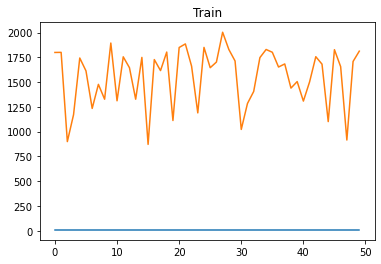

2/2 [==============================] - 2s 11ms/step


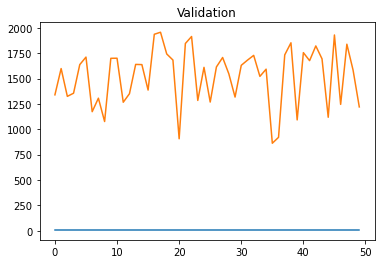

3/3 [==============================] - 0s 12ms/step


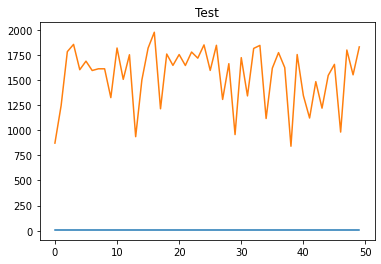

3/3 [==============================] - 0s 21ms/step


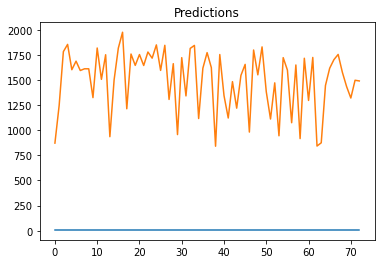

In [45]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [46]:
mavg_hybrid_rnn_gru_mse

2312912.559145361

### CNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2419477.0000 - root_mean_squared_error: 1555.4668

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 136s 13s/step - loss: 2419477.0000 - root_mean_squared_error: 1555.4668 - val_loss: 2404680.7500 - val_root_mean_squared_error: 1550.7034
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 2424196.0000 - root_mean_squared_error: 1556.9830

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 2418330.2500 - root_mean_squared_error: 1555.0981 - val_loss: 2403760.5000 - val_root_mean_squared_error: 1550.4066
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2417519.0000 - root_mean_squared_error: 1554.8373

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 2417519.0000 - root_mean_squared_error: 1554.8373 - val_loss: 2403114.0000 - val_root_mean_squared_error: 1550.1980
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2416894.0000 - root_mean_squared_error: 1554.6364

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 2416894.0000 - root_mean_squared_error: 1554.6364 - val_loss: 2402504.7500 - val_root_mean_squared_error: 1550.0016
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2416289.0000 - root_mean_squared_error: 1554.4417

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 97s 14s/step - loss: 2416289.0000 - root_mean_squared_error: 1554.4417 - val_loss: 2401901.5000 - val_root_mean_squared_error: 1549.8069
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2415688.5000 - root_mean_squared_error: 1554.2485

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 74s 11s/step - loss: 2415688.5000 - root_mean_squared_error: 1554.2485 - val_loss: 2401296.5000 - val_root_mean_squared_error: 1549.6117
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2415082.5000 - root_mean_squared_error: 1554.0536

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 2415082.5000 - root_mean_squared_error: 1554.0536 - val_loss: 2400693.5000 - val_root_mean_squared_error: 1549.4171
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2414484.5000 - root_mean_squared_error: 1553.8612

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 2414484.5000 - root_mean_squared_error: 1553.8612 - val_loss: 2400088.7500 - val_root_mean_squared_error: 1549.2219
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2413879.2500 - root_mean_squared_error: 1553.6664

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2413879.2500 - root_mean_squared_error: 1553.6664 - val_loss: 2399487.5000 - val_root_mean_squared_error: 1549.0280
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2413275.0000 - root_mean_squared_error: 1553.4719

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 2413275.0000 - root_mean_squared_error: 1553.4719 - val_loss: 2398880.2500 - val_root_mean_squared_error: 1548.8319
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 2412673.5000 - root_mean_squared_error: 1553.2783

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 2412673.5000 - root_mean_squared_error: 1553.2783 - val_loss: 2398268.2500 - val_root_mean_squared_error: 1548.6343
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2412060.0000 - root_mean_squared_error: 1553.0808

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 2412060.0000 - root_mean_squared_error: 1553.0808 - val_loss: 2397658.0000 - val_root_mean_squared_error: 1548.4373
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2411446.7500 - root_mean_squared_error: 1552.8834

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 61s 9s/step - loss: 2411446.7500 - root_mean_squared_error: 1552.8834 - val_loss: 2397047.0000 - val_root_mean_squared_error: 1548.2400
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2410836.7500 - root_mean_squared_error: 1552.6869

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 2410836.7500 - root_mean_squared_error: 1552.6869 - val_loss: 2396426.2500 - val_root_mean_squared_error: 1548.0394
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2410211.7500 - root_mean_squared_error: 1552.4857

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 92s 13s/step - loss: 2410211.7500 - root_mean_squared_error: 1552.4857 - val_loss: 2395774.2500 - val_root_mean_squared_error: 1547.8289
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2409534.0000 - root_mean_squared_error: 1552.2673

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 2409534.0000 - root_mean_squared_error: 1552.2673 - val_loss: 2395109.0000 - val_root_mean_squared_error: 1547.6140
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2408882.2500 - root_mean_squared_error: 1552.0574

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 2408882.2500 - root_mean_squared_error: 1552.0574 - val_loss: 2394450.7500 - val_root_mean_squared_error: 1547.4012
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 2423808.5000 - root_mean_squared_error: 1556.8585

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 95s 13s/step - loss: 2408229.7500 - root_mean_squared_error: 1551.8472 - val_loss: 2393797.0000 - val_root_mean_squared_error: 1547.1901
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2407579.0000 - root_mean_squared_error: 1551.6376

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 2407579.0000 - root_mean_squared_error: 1551.6376 - val_loss: 2393144.0000 - val_root_mean_squared_error: 1546.9790
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 2406825.2500 - root_mean_squared_error: 1551.3947

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 60s 8s/step - loss: 2406825.2500 - root_mean_squared_error: 1551.3947 - val_loss: 2392267.5000 - val_root_mean_squared_error: 1546.6957
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2406059.5000 - root_mean_squared_error: 1551.1478

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 99s 14s/step - loss: 2406059.5000 - root_mean_squared_error: 1551.1478 - val_loss: 2391648.0000 - val_root_mean_squared_error: 1546.4954
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 2405448.7500 - root_mean_squared_error: 1550.9509

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 2405448.7500 - root_mean_squared_error: 1550.9509 - val_loss: 2391045.7500 - val_root_mean_squared_error: 1546.3007
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2404856.0000 - root_mean_squared_error: 1550.7598

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 2404856.0000 - root_mean_squared_error: 1550.7598 - val_loss: 2390468.5000 - val_root_mean_squared_error: 1546.1140
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 2394538.2500 - root_mean_squared_error: 1547.4296

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 74s 10s/step - loss: 2404288.5000 - root_mean_squared_error: 1550.5768 - val_loss: 2389907.7500 - val_root_mean_squared_error: 1545.9326
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2403735.5000 - root_mean_squared_error: 1550.3984

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 95s 13s/step - loss: 2403735.5000 - root_mean_squared_error: 1550.3984 - val_loss: 2389366.0000 - val_root_mean_squared_error: 1545.7574
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2403205.0000 - root_mean_squared_error: 1550.2274

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 2403205.0000 - root_mean_squared_error: 1550.2274 - val_loss: 2388845.2500 - val_root_mean_squared_error: 1545.5890
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2402695.0000 - root_mean_squared_error: 1550.0629

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 2402695.0000 - root_mean_squared_error: 1550.0629 - val_loss: 2388345.7500 - val_root_mean_squared_error: 1545.4274
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2402203.7500 - root_mean_squared_error: 1549.9044

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 2402203.7500 - root_mean_squared_error: 1549.9044 - val_loss: 2387870.2500 - val_root_mean_squared_error: 1545.2736
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2401737.5000 - root_mean_squared_error: 1549.7540

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 2401737.5000 - root_mean_squared_error: 1549.7540 - val_loss: 2387409.7500 - val_root_mean_squared_error: 1545.1245
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 2401286.2500 - root_mean_squared_error: 1549.6084

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 6s 53ms/step


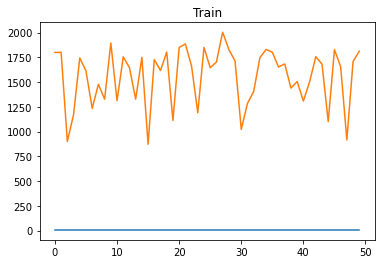

2/2 [==============================] - 8s 177ms/step


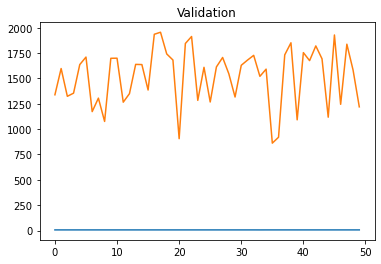

3/3 [==============================] - 0s 46ms/step


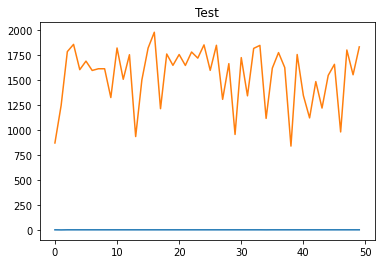

3/3 [==============================] - 0s 14ms/step


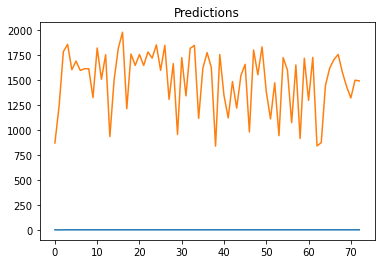

In [47]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [48]:
mavg_hybrid_cnn_gru_mse

2317526.638976572

### CNN RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2418676.2500 - root_mean_squared_error: 1555.2094

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 118s 9s/step - loss: 2418676.2500 - root_mean_squared_error: 1555.2094 - val_loss: 2403622.2500 - val_root_mean_squared_error: 1550.3619
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2416882.0000 - root_mean_squared_error: 1554.6324

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2416882.0000 - root_mean_squared_error: 1554.6324 - val_loss: 2401938.5000 - val_root_mean_squared_error: 1549.8188
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2415252.7500 - root_mean_squared_error: 1554.1084

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2415252.7500 - root_mean_squared_error: 1554.1084 - val_loss: 2400311.7500 - val_root_mean_squared_error: 1549.2939
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2413632.2500 - root_mean_squared_error: 1553.5869

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 2413632.2500 - root_mean_squared_error: 1553.5869 - val_loss: 2398698.0000 - val_root_mean_squared_error: 1548.7731
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 2412023.0000 - root_mean_squared_error: 1553.0688

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 6s/step - loss: 2412023.0000 - root_mean_squared_error: 1553.0688 - val_loss: 2397090.2500 - val_root_mean_squared_error: 1548.2539
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2410422.0000 - root_mean_squared_error: 1552.5533

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 2410422.0000 - root_mean_squared_error: 1552.5533 - val_loss: 2395485.2500 - val_root_mean_squared_error: 1547.7355
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 2408814.5000 - root_mean_squared_error: 1552.0356

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 67s 9s/step - loss: 2408814.5000 - root_mean_squared_error: 1552.0356 - val_loss: 2393866.5000 - val_root_mean_squared_error: 1547.2125
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2407199.2500 - root_mean_squared_error: 1551.5151

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2407199.2500 - root_mean_squared_error: 1551.5151 - val_loss: 2392240.0000 - val_root_mean_squared_error: 1546.6868
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 2402602.7500 - root_mean_squared_error: 1550.0332

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 2405586.2500 - root_mean_squared_error: 1550.9952 - val_loss: 2390637.7500 - val_root_mean_squared_error: 1546.1687
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 2403985.0000 - root_mean_squared_error: 1550.4790

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 2403985.0000 - root_mean_squared_error: 1550.4790 - val_loss: 2389052.2500 - val_root_mean_squared_error: 1545.6559
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2390812.2500 - root_mean_squared_error: 1546.2252

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2402413.5000 - root_mean_squared_error: 1549.9720 - val_loss: 2387489.7500 - val_root_mean_squared_error: 1545.1504
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2400874.2500 - root_mean_squared_error: 1549.4755

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2400874.2500 - root_mean_squared_error: 1549.4755 - val_loss: 2385952.0000 - val_root_mean_squared_error: 1544.6527
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 2399354.2500 - root_mean_squared_error: 1548.9849

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 2399354.2500 - root_mean_squared_error: 1548.9849 - val_loss: 2384464.0000 - val_root_mean_squared_error: 1544.1710
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2397897.2500 - root_mean_squared_error: 1548.5145

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 67s 9s/step - loss: 2397897.2500 - root_mean_squared_error: 1548.5145 - val_loss: 2383029.7500 - val_root_mean_squared_error: 1543.7065
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2396491.0000 - root_mean_squared_error: 1548.0604

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2396491.0000 - root_mean_squared_error: 1548.0604 - val_loss: 2381669.5000 - val_root_mean_squared_error: 1543.2659
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 2390287.0000 - root_mean_squared_error: 1546.0553

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2395168.7500 - root_mean_squared_error: 1547.6333 - val_loss: 2380381.5000 - val_root_mean_squared_error: 1542.8485
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 2395272.0000 - root_mean_squared_error: 1547.6666

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2393903.5000 - root_mean_squared_error: 1547.2245 - val_loss: 2379154.0000 - val_root_mean_squared_error: 1542.4507
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2392705.7500 - root_mean_squared_error: 1546.8373

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 2392705.7500 - root_mean_squared_error: 1546.8373 - val_loss: 2377987.7500 - val_root_mean_squared_error: 1542.0725
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 2401195.5000 - root_mean_squared_error: 1549.5791

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2391572.0000 - root_mean_squared_error: 1546.4708 - val_loss: 2376878.2500 - val_root_mean_squared_error: 1541.7128
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 2392228.2500 - root_mean_squared_error: 1546.6830

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2390492.0000 - root_mean_squared_error: 1546.1216 - val_loss: 2375830.0000 - val_root_mean_squared_error: 1541.3728
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 2389466.5000 - root_mean_squared_error: 1545.7899

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 2389466.5000 - root_mean_squared_error: 1545.7899 - val_loss: 2374829.7500 - val_root_mean_squared_error: 1541.0483
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2368300.0000 - root_mean_squared_error: 1538.9282

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2388486.5000 - root_mean_squared_error: 1545.4729 - val_loss: 2373871.0000 - val_root_mean_squared_error: 1540.7372
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 2381502.2500 - root_mean_squared_error: 1543.2117

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2387541.0000 - root_mean_squared_error: 1545.1670 - val_loss: 2372946.2500 - val_root_mean_squared_error: 1540.4370
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2386635.2500 - root_mean_squared_error: 1544.8739

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 61s 9s/step - loss: 2386635.2500 - root_mean_squared_error: 1544.8739 - val_loss: 2372060.7500 - val_root_mean_squared_error: 1540.1495
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2385775.5000 - root_mean_squared_error: 1544.5956

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2385775.5000 - root_mean_squared_error: 1544.5956 - val_loss: 2371211.0000 - val_root_mean_squared_error: 1539.8737
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 2384939.2500 - root_mean_squared_error: 1544.3248

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 2384939.2500 - root_mean_squared_error: 1544.3248 - val_loss: 2370393.5000 - val_root_mean_squared_error: 1539.6083
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 2384133.0000 - root_mean_squared_error: 1544.0638

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2384133.0000 - root_mean_squared_error: 1544.0638 - val_loss: 2369599.0000 - val_root_mean_squared_error: 1539.3502
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 2383347.2500 - root_mean_squared_error: 1543.8093

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 60s 9s/step - loss: 2383347.2500 - root_mean_squared_error: 1543.8093 - val_loss: 2368829.0000 - val_root_mean_squared_error: 1539.1001
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2382592.0000 - root_mean_squared_error: 1543.5647

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2382592.0000 - root_mean_squared_error: 1543.5647 - val_loss: 2368076.2500 - val_root_mean_squared_error: 1538.8555
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 2377154.0000 - root_mean_squared_error: 1541.8022

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 7s 23ms/step


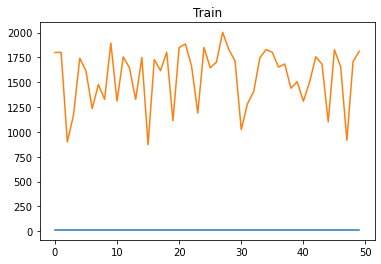

2/2 [==============================] - 3s 15ms/step


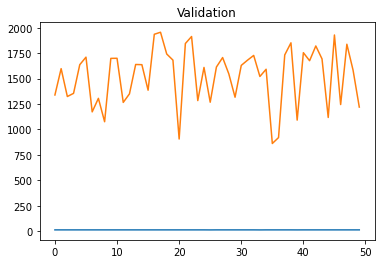

3/3 [==============================] - 1s 285ms/step


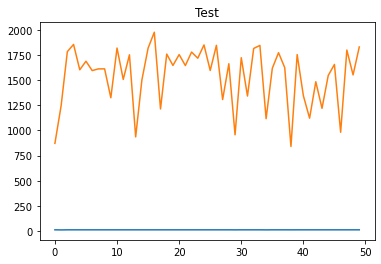

3/3 [==============================] - 0s 20ms/step


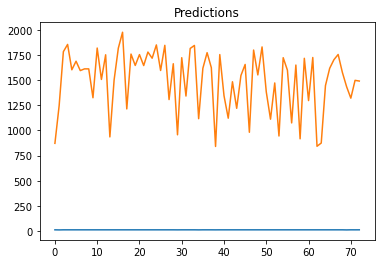

In [49]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [50]:
mavg_hybrid_cnn_rnn_gru_mse

2298284.7142460225

### RNN LSTM GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 2419146.0000 - root_mean_squared_error: 1555.3604

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 105s 10s/step - loss: 2419146.0000 - root_mean_squared_error: 1555.3604 - val_loss: 2404304.0000 - val_root_mean_squared_error: 1550.5818
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2417808.2500 - root_mean_squared_error: 1554.9303

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 2417808.2500 - root_mean_squared_error: 1554.9303 - val_loss: 2402938.7500 - val_root_mean_squared_error: 1550.1415
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 2416398.2500 - root_mean_squared_error: 1554.4768

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 2416398.2500 - root_mean_squared_error: 1554.4768 - val_loss: 2401455.0000 - val_root_mean_squared_error: 1549.6628
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2414872.0000 - root_mean_squared_error: 1553.9858

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2414872.0000 - root_mean_squared_error: 1553.9858 - val_loss: 2399795.2500 - val_root_mean_squared_error: 1549.1272
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 2424665.2500 - root_mean_squared_error: 1557.1337

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 2413127.7500 - root_mean_squared_error: 1553.4246 - val_loss: 2397931.7500 - val_root_mean_squared_error: 1548.5256
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 2411189.5000 - root_mean_squared_error: 1552.8005

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2411189.5000 - root_mean_squared_error: 1552.8005 - val_loss: 2395843.7500 - val_root_mean_squared_error: 1547.8513
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 2409173.5000 - root_mean_squared_error: 1552.1512

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 2409019.2500 - root_mean_squared_error: 1552.1016 - val_loss: 2393589.5000 - val_root_mean_squared_error: 1547.1229
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 2406746.7500 - root_mean_squared_error: 1551.3693

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 2406746.7500 - root_mean_squared_error: 1551.3693 - val_loss: 2391214.2500 - val_root_mean_squared_error: 1546.3551
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 2404358.7500 - root_mean_squared_error: 1550.5995

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2404358.7500 - root_mean_squared_error: 1550.5995 - val_loss: 2388855.2500 - val_root_mean_squared_error: 1545.5922
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 2392292.0000 - root_mean_squared_error: 1546.7036

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 2402040.5000 - root_mean_squared_error: 1549.8518 - val_loss: 2386605.7500 - val_root_mean_squared_error: 1544.8643
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 2403682.5000 - root_mean_squared_error: 1550.3813

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2399860.0000 - root_mean_squared_error: 1549.1482 - val_loss: 2384554.0000 - val_root_mean_squared_error: 1544.2001
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 2397913.5000 - root_mean_squared_error: 1548.5198

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 2397913.5000 - root_mean_squared_error: 1548.5198 - val_loss: 2382779.0000 - val_root_mean_squared_error: 1543.6252
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 2424918.0000 - root_mean_squared_error: 1557.2148

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2396255.2500 - root_mean_squared_error: 1547.9843 - val_loss: 2381283.2500 - val_root_mean_squared_error: 1543.1407
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 2394867.7500 - root_mean_squared_error: 1547.5360

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 53s 7s/step - loss: 2394867.7500 - root_mean_squared_error: 1547.5360 - val_loss: 2380051.7500 - val_root_mean_squared_error: 1542.7416
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 2393729.7500 - root_mean_squared_error: 1547.1683

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2393729.7500 - root_mean_squared_error: 1547.1683 - val_loss: 2379046.5000 - val_root_mean_squared_error: 1542.4158
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 2392792.2500 - root_mean_squared_error: 1546.8654

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2392792.2500 - root_mean_squared_error: 1546.8654 - val_loss: 2378208.2500 - val_root_mean_squared_error: 1542.1440
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 2392010.0000 - root_mean_squared_error: 1546.6124

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2392010.0000 - root_mean_squared_error: 1546.6124 - val_loss: 2377493.0000 - val_root_mean_squared_error: 1541.9121
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 2391332.2500 - root_mean_squared_error: 1546.3933

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2391332.2500 - root_mean_squared_error: 1546.3933 - val_loss: 2376879.7500 - val_root_mean_squared_error: 1541.7133
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 2390752.5000 - root_mean_squared_error: 1546.2058

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2390752.5000 - root_mean_squared_error: 1546.2058 - val_loss: 2376344.2500 - val_root_mean_squared_error: 1541.5396
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 2382914.2500 - root_mean_squared_error: 1543.6691

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2390246.0000 - root_mean_squared_error: 1546.0420 - val_loss: 2375875.5000 - val_root_mean_squared_error: 1541.3876
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 2384450.0000 - root_mean_squared_error: 1544.1664

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2389794.7500 - root_mean_squared_error: 1545.8961 - val_loss: 2375452.7500 - val_root_mean_squared_error: 1541.2504
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 2399862.2500 - root_mean_squared_error: 1549.1489

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2389389.2500 - root_mean_squared_error: 1545.7649 - val_loss: 2375067.0000 - val_root_mean_squared_error: 1541.1252
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 2389017.7500 - root_mean_squared_error: 1545.6448

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2389017.7500 - root_mean_squared_error: 1545.6448 - val_loss: 2374714.0000 - val_root_mean_squared_error: 1541.0107
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 2388673.7500 - root_mean_squared_error: 1545.5334

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2388673.7500 - root_mean_squared_error: 1545.5334 - val_loss: 2374384.0000 - val_root_mean_squared_error: 1540.9037
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 2388354.0000 - root_mean_squared_error: 1545.4301

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 2388354.0000 - root_mean_squared_error: 1545.4301 - val_loss: 2374073.0000 - val_root_mean_squared_error: 1540.8027
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 2382446.2500 - root_mean_squared_error: 1543.5175

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 2388049.5000 - root_mean_squared_error: 1545.3315 - val_loss: 2373779.7500 - val_root_mean_squared_error: 1540.7075
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 2397254.2500 - root_mean_squared_error: 1548.3069

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 2387762.7500 - root_mean_squared_error: 1545.2388 - val_loss: 2373499.5000 - val_root_mean_squared_error: 1540.6166
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 2382870.2500 - root_mean_squared_error: 1543.6548

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 2387487.5000 - root_mean_squared_error: 1545.1497 - val_loss: 2373235.0000 - val_root_mean_squared_error: 1540.5306
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 2387229.5000 - root_mean_squared_error: 1545.0662

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2387229.5000 - root_mean_squared_error: 1545.0662 - val_loss: 2372981.2500 - val_root_mean_squared_error: 1540.4484
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 2400686.2500 - root_mean_squared_error: 1549.4148

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 2s 4ms/step


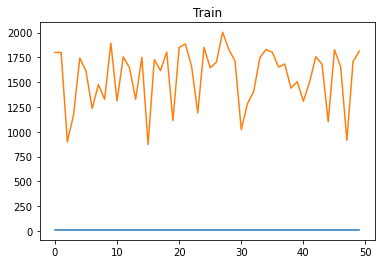

2/2 [==============================] - 1s 6ms/step


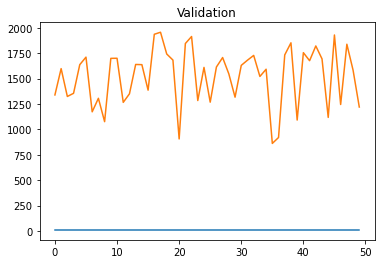

3/3 [==============================] - 0s 9ms/step


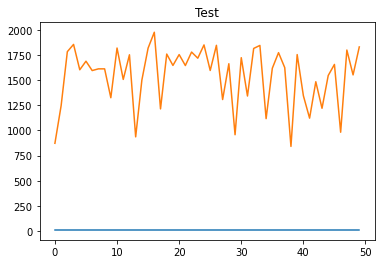

3/3 [==============================] - 0s 9ms/step


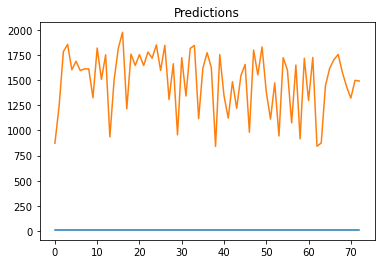

In [51]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [52]:
mavg_hybrid_lstm_rnn_gru_mse

2303524.215758581

# MSE

In [53]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [54]:
msedf

,Model,MSE,RMSE
0,cnn,5.011358e+03,70.790944
1,rnn,2.331015e+06,1526.766258
2,gru,2.329369e+06,1526.226934
3,lstm,2.328646e+06,1525.990059
4,mvg_cnn,8.436955e+05,918.528993
5,mvg_rnn,2.332157e+06,1527.140126
6,mvg_gru,2.328049e+06,1525.794507
7,mvg_lstm,2.326796e+06,1525.383900
8,auto_cnn,4.847755e+03,69.625818
9,auto_rnn,2.331009e+06,1526.764330


In [55]:
msedf.to_csv("msedfECC.csv", index= False)

<AxesSubplot:xlabel='Model'>

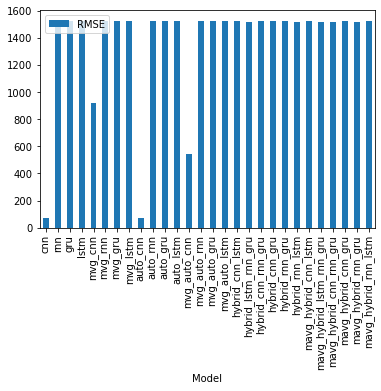

In [56]:
msedf.plot("Model", "RMSE", kind= "bar")

In [57]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)